In [307]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [308]:
df_origin = pd.read_csv('train.csv')
df = df_origin.copy()
df.head()

id  log_price property_type        room_type   
0  6901257   5.010635   Apartment     Entire home/apt  \
1  6304928   5.129899   Apartment     Entire home/apt   
2  7919400   4.976734   Apartment     Entire home/apt   
3  13418779  6.620073   House         Entire home/apt   
4  3808709   4.744932   Apartment     Entire home/apt   

                                                                                                                                                                                                                                                                                                                 amenities   
0  {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                                                                                 \
1  {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                
2  {TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}   
3  {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}                                                                                                        
4  {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}                                                                                                                                            

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  ...   
0  3             1.0        Real Bed  strict              True          ...  \
1  7             1.0        Real Bed  strict              True          ...   
2  5             1.0        Real Bed  moderate            True          ...   
3  4             1.0        Real Bed  flexible            True          ...   
4  2             1.0        Real Bed  moderate            True          ...   

    latitude   longitude                                      name   
0  40.696524 -73.991617   Beautiful brownstone 1-bedroom            \
1  40.766115 -73.989040   Superb 3BR Apt Located Near Times Square   
2  40.808110 -73.943756   The Garden Oasis                           
3  37.772004 -122.431619  Beautiful Flat in the Heart of SF!         
4  38.925627 -77.034596   Great studio in midtown DC                 

      neighbourhood number_of_reviews review_scores_rating   
0  Brooklyn Heights  2                 100.0                \
1  Hell's Kitchen    6                 93.0                  
2  Harlem            10                92.0                  
3  Lower Haight      0                NaN                    
4  Columbia Heights  4                 40.0                  

                                                                                   thumbnail_url   
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small  \
1  https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small   
2  https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small   
3  https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_poli

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [310]:
df.shape

(74111, 29)

In [311]:
df.describe().T

count          mean           std         min   
id                    74111.0  1.126662e+07  6.081735e+06  344.000000  \
log_price             74111.0  4.782069e+00  7.173938e-01  0.000000     
accommodates          74111.0  3.155146e+00  2.153589e+00  1.000000     
bathrooms             73911.0  1.235263e+00  5.820441e-01  0.000000     
latitude              74111.0  3.844596e+01  3.080167e+00  33.338905    
longitude             74111.0 -9.239753e+01  2.170532e+01 -122.511500   
number_of_reviews     74111.0  2.090057e+01  3.782864e+01  0.000000     
review_scores_rating  57389.0  9.406736e+01  7.836556e+00  20.000000    
bedrooms              74020.0  1.265793e+00  8.521435e-01  0.000000     
beds                  73980.0  1.710868e+00  1.254142e+00  0.000000     

                               25%           50%           75%           max  
id                    6.261964e+06  1.225415e+07  1.640226e+07  2.123090e+07  
log_price             4.317488e+00  4.709530e+00  5.220356e+00  7.600402e+00  
accommodates          2.000000e+00  2.000000e+00  4.000000e+00  1.600000e+01  
bathrooms             1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
latitude              3.412791e+01  4.066214e+01  4.074610e+01  4.239044e+01  
longitude            -1.183424e+02 -7.699696e+01 -7.395466e+01 -7.098505e+01  
number_of_reviews     1.000000e+00  6.000000e+00  2.300000e+01  6.050000e+02  
review_scores_rating  9.200000e+01  9.600000e+01  1.000000e+02  1.000000e+02  
bedrooms              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+01  
beds                  1.000000e+00  1.000000e+00  2.000000e+00  1.800000e+01

In [312]:
df.nunique()

id                        74111
log_price                 767  
property_type             35   
room_type                 3    
amenities                 67122
accommodates              16   
bathrooms                 17   
bed_type                  5    
cancellation_policy       5    
cleaning_fee              2    
city                      6    
description               73479
first_review              2554 
host_has_profile_pic      2    
host_identity_verified    2    
host_response_rate        80   
host_since                3087 
instant_bookable          2    
last_review               1371 
latitude                  74111
longitude                 74111
name                      73359
neighbourhood             619  
number_of_reviews         371  
review_scores_rating      54   
thumbnail_url             65883
zipcode                   769  
bedrooms                  11   
beds                      18   
dtype: int64

In [313]:
df.dtypes

id                        int64  
log_price                 float64
property_type             object 
room_type                 object 
amenities                 object 
accommodates              int64  
bathrooms                 float64
bed_type                  object 
cancellation_policy       object 
cleaning_fee              bool   
city                      object 
description               object 
first_review              object 
host_has_profile_pic      object 
host_identity_verified    object 
host_response_rate        object 
host_since                object 
instant_bookable          object 
last_review               object 
latitude                  float64
longitude                 float64
name                      object 
neighbourhood             object 
number_of_reviews         int64  
review_scores_rating      float64
thumbnail_url             object 
zipcode                   object 
bedrooms                  float64
beds                      float64
dtype: object

In [314]:
df.isnull().sum()

id                        0    
log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

In [315]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [316]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

unique
property_type           [Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
room_type               [Entire home/apt, Private room, Shared room]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
bed_type                [Real Bed, Futon, Pull-out Sofa, Couch, Airbed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [317]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


In [318]:
#dropping duplicated colunms
df=df.drop_duplicates()

In [319]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
# import seaborn as sns
# sns.pairplot(df, kind  ="reg");

In [320]:
df['id']

0        6901257 
1        6304928 
2        7919400 
3        13418779
4        3808709 
          ...    
74106    14549287
74107    13281809
74108    18688039
74109    17045948
74110    3534845 
Name: id, Length: 74111, dtype: int64

In [321]:
# Id is dropped since it has no affect.
df.drop("id" , axis=1 , inplace=True)

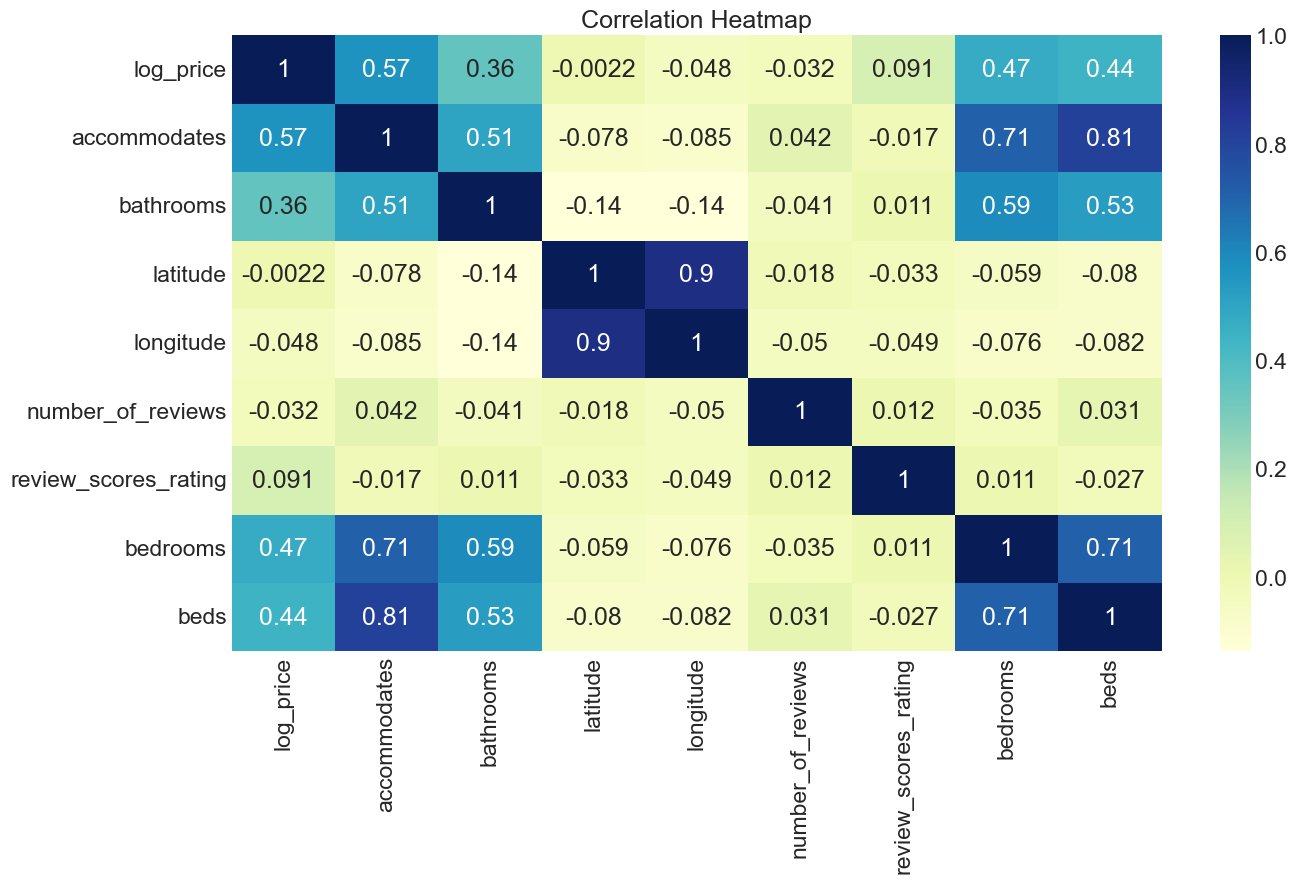

In [322]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

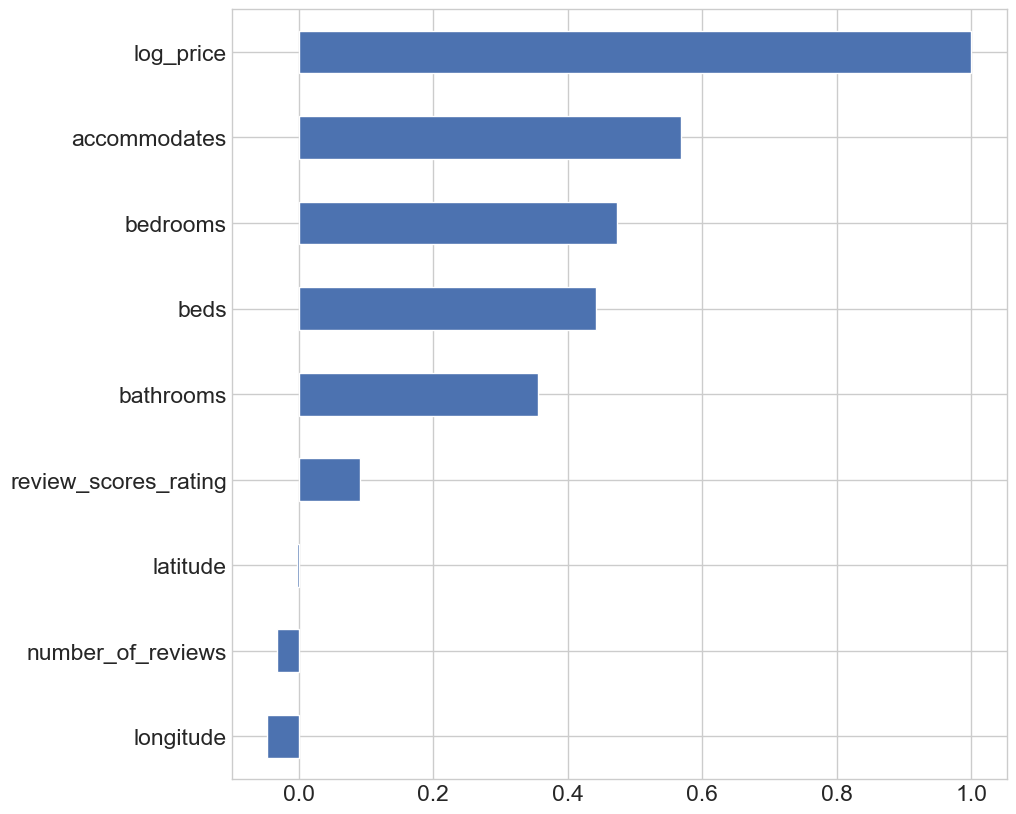

In [323]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,10))
df[numeric_columns].corr()["log_price"].sort_values().plot(kind="barh")

In [324]:
#we check the correlation between our target variable and other columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
longitude               0.047529
number_of_reviews       0.032470
latitude                0.002193
Name: log_price, dtype: float64

##### Most related numeric columns with target are:accommodates ,bedrooms ,bathrooms

# Handling Missing Values

In [325]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

#### id, log_price ,property_type ,room_type,amenities,accommodates, bed_type, cancellation_policy ,cleaning_fee  

In [326]:
#They have no missing value

#### property_type -Feature enginerering kismina gidecek

In [327]:
"""# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim"""

"# Replacing categories that are types of houses or apartments\ndf.property_type.replace({\n    'Townhouse': 'House',\n    'Serviced apartment': 'Apartment',\n    'Loft': 'Apartment',\n    'Bungalow': 'House',\n    'Cottage': 'House',\n    'Villa': 'House',\n    'Tiny house': 'House',\n    'Earth house': 'House',\n    'Chalet': 'House'  \n    }, inplace=True)\n\n# Replacing other categories with 'other'\ndf.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim"

### bathrooms

In [328]:
df["bathrooms"].isnull().sum()

200

In [329]:
# There only 200 missing values. It makes no difference
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

In [330]:
df["bathrooms"].isnull().sum()

0

#### city

In [331]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [332]:
df['city'].isnull().sum()

0

### description

In [333]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [334]:
df['description'].isnull().sum()

0

### first_review-last_review

In [335]:
df['first_review'].isnull().sum()

15864

In [336]:
df['first_review']

0        2016-06-18
1        2017-08-05
2        2017-04-30
3        NaN       
4        2015-05-12
            ...    
74106    NaN       
74107    2016-08-15
74108    2015-01-03
74109    NaN       
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [337]:
df['last_review'].isnull().sum()

15827

In [338]:
df['last_review']

0        2016-07-18
1        2017-09-23
2        2017-09-14
3        NaN       
4        2017-01-22
            ...    
74106    NaN       
74107    2017-04-15
74108    2017-09-10
74109    NaN       
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [339]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [340]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [341]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

### host_has_profile_pic - host_identity_verified - host_since

In [342]:
df['host_has_profile_pic'].isnull().sum()


188

In [343]:
df['host_identity_verified'].isnull().sum()

188

In [344]:
df['host_since'].isnull().sum()

188

In [345]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [346]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [347]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [348]:
#We filled the nan values
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [349]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0
Null values in 'host_since': 0


### host_response_rate

In [350]:
df['host_response_rate']

0        NaN 
1        100%
2        100%
3        NaN 
4        100%
         ... 
74106    NaN 
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [351]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0       NaN   
1        100.0
2        100.0
3       NaN   
4        100.0
         ...  
74106   NaN   
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [352]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [353]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


### instant_bookable

In [354]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [355]:
df['instant_bookable'].isnull().sum()

0

### 24-Number_of_reviews

In [356]:
df_origin['number_of_reviews'].isnull().sum()

0

### 25-review_scores_rating

In [357]:
df['review_scores_rating'].isnull().sum()

16722

In [358]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

df['review_scores_rating'].isnull().sum()

0

### 26-Thumbnail_url

In [359]:
# this column has nothing interesting and inclde the photos of room. We are going to 
# take this column account if there is photo of not. So ether 0 or 1.
df['thumbnail_url'] = df['thumbnail_url'].fillna(0).apply(lambda x: 1 if x else 0)
df['thumbnail_url'].isnull().sum()

0

In [360]:
df['thumbnail_url'].value_counts()

thumbnail_url
1    65895
0    8216 
Name: count, dtype: int64

### 27-zipcode

In [361]:
df['zipcode'] = df['zipcode'].astype(str).str.rstrip('.0')

In [362]:
import re

pattern = r'[^0-9]'  # Regular expression pattern to match unwanted characters
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)]
# There are unwanted characters in the zipcode column. Since we can fill the missing values with coordinates. ITs better to set them None to save time

26       nan
96       nan
189      nan
340         
401      nan
        ... 
73642    nan
73763    nan
73925    nan
74060    nan
74083    nan
Name: zipcode, Length: 987, dtype: object

In [363]:
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)] = None

In [364]:
# TO fill 981 zipcode missing value
# There are coordinates of the given airbnb property. With these coordinates we find the zipcodes.
# This process takes sometime
# from uszipcode import SearchEngine
# from geopy.geocoders import Nominatim

# def get_zipcode(latitude, longitude):
 
#     geolocator = Nominatim(user_agent='my_app')
#     location = geolocator.reverse(f"{latitude}, {longitude}")
#     address = location.raw['address']
#     zipcode = address.get('postcode')
#     return zipcode

# for index, row in df.iterrows():
#     if pd.isnull(row['zipcode']):
#         zipcode = get_zipcode(row['latitude'], row['longitude'])
#         df.loc[index, 'zipcode'] = zipcode

In [518]:
df['zipcode'] = pd.read_csv('median_zipcode.csv')['zipcode'] # To save time. 

In [516]:
df['zipcode'].isnull().sum()

0

### 23-Neighbourhood

In [366]:
df['neighbourhood'].isnull().sum()
# Going to be filled with the help of coordinates

6872

In [367]:
def get_neighborhood(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    if zipcode_data:
        neighborhood = zipcode_data.major_city
        if neighborhood:
            return neighborhood
        else:
            return "Neighborhood information not found."
    else:
        return "Zip code information not found."

# Iterate over your DataFrame and get neighborhood information for each zip code
for index, row in df.iterrows():
    if pd.isnull(df.loc[index, 'neighbourhood']) :
        zipcode = row['zipcode']
        neighborhood = get_neighborhood(zipcode)
        df.loc[index, 'neighbourhood'] = neighborhood

In [368]:
df['neighbourhood'].isnull().sum()

0

### 28-29-bed and bedrooms

In [369]:
df['beds'].isnull().sum()

131

In [370]:
# Since the missing value ratio to all data is relatively too small  we fill these parts wth the KNNImputer

from sklearn.impute import KNNImputer
# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the data and transform it
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['beds']= np.ceil(imputer.fit_transform(df[['beds']]))
df['bedrooms']= np.ceil(imputer.fit_transform(df[['bedrooms']]))

In [371]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [372]:
def get_value_counts(df):
    """
    Returns the value counts of all categorical columns in the given df.
    
    Args:
        df (pandas.df): The df.
    
    Returns:
        dict: Dictionary containing value counts of each categorical column.
    """
    columns_values=['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'accommodates',
 'bathrooms',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'bedrooms',
 'beds',
 'first_review',
 'neighbourhood'

 ]
    value_counts = {}
    for column in columns_values:
        value_counts[column] = df[column].value_counts()
        
    return value_counts

## Example usage
value_counts = get_value_counts(df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print(50*'--')

Column: property_type
property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island      

In [373]:
# 10 Most expensve air bnb
top_reviewed_hosts= df.nlargest(10,'log_price').head(10)
top_reviewed_hosts

log_price property_type        room_type   
19210  7.600402   House         Entire home/apt  \
42672  7.600402   Apartment     Entire home/apt   
55453  7.600402   Townhouse     Entire home/apt   
60071  7.600402   Apartment     Entire home/apt   
72609  7.600402   House         Entire home/apt   
3063   7.598399   Villa         Entire home/apt   
9390   7.598399   House         Private room      
20722  7.598399   House         Entire home/apt   
28420  7.598399   House         Entire home/apt   
54994  7.598399   House         Entire home/apt   

                                                                                                                                                                                                                                                                                                                                                                                                          amenities   
19210  {TV,"Wireless Internet","Air conditioning",Pool,Kitchen,"Free parking on premises","Smoking allowed","Pets allowed",Gym,Breakfast,"Indoor fireplace",Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}                                               \
42672  {Internet,"Wireless Internet","Air conditioning",Kitchen,"Buzzer/wireless intercom",Heating,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher"}                                                                                                                                                                                                                                   
55453  {TV,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Pets allowed","Indoor fireplace",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private entrance"}                                                                         
60071  {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Shampoo,"24-hour check-in","Hair dryer",Iron}                                                                                                                                                                    
72609  {TV,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Pets allowed",Breakfast,Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Shampoo,"Lock on bedroom door","Hair dryer",Iron,"Laptop friendly workspace","Private entrance"}                                                                                
3063   {TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Pool,Kitchen,"Free parking on premises","Indoor fireplace",Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}   
9390   {"Wireless Internet","Free parking on premises",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Hangers}                                                                                                                                                                                                                                                                           
20722  {Internet,"Wireless Internet","Air conditioning",Pool,Kitchen,"Free parking on premises","Smoking allowed","Pets allowed","Hot tub","Indoor fireplace",Heating,"Family/kid friendly","

# Visualition
### Value Counts

In [374]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)


def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

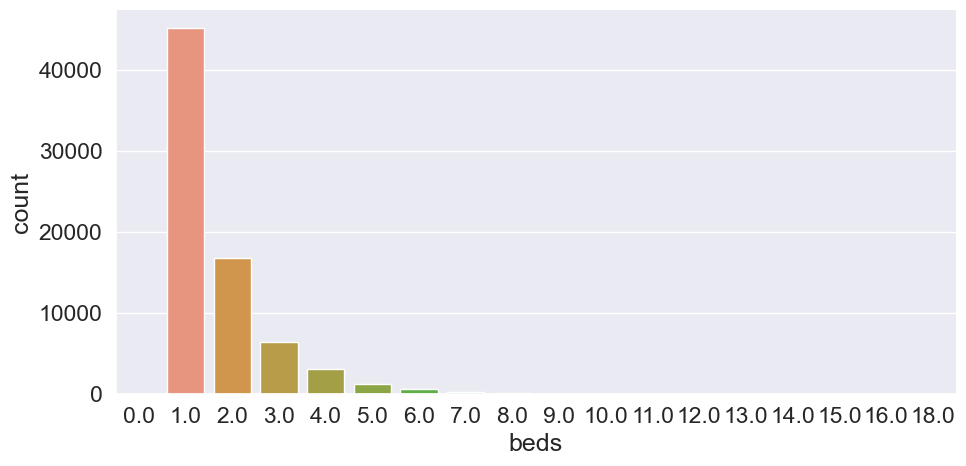

In [375]:
plot_catplot("beds", "count", 5, 2)

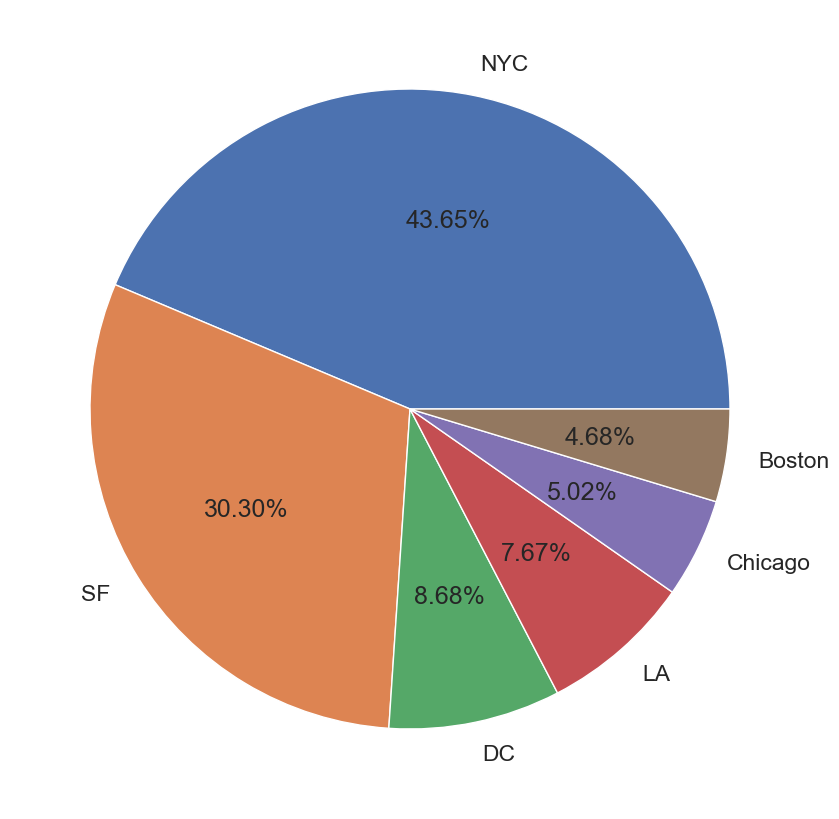

In [376]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

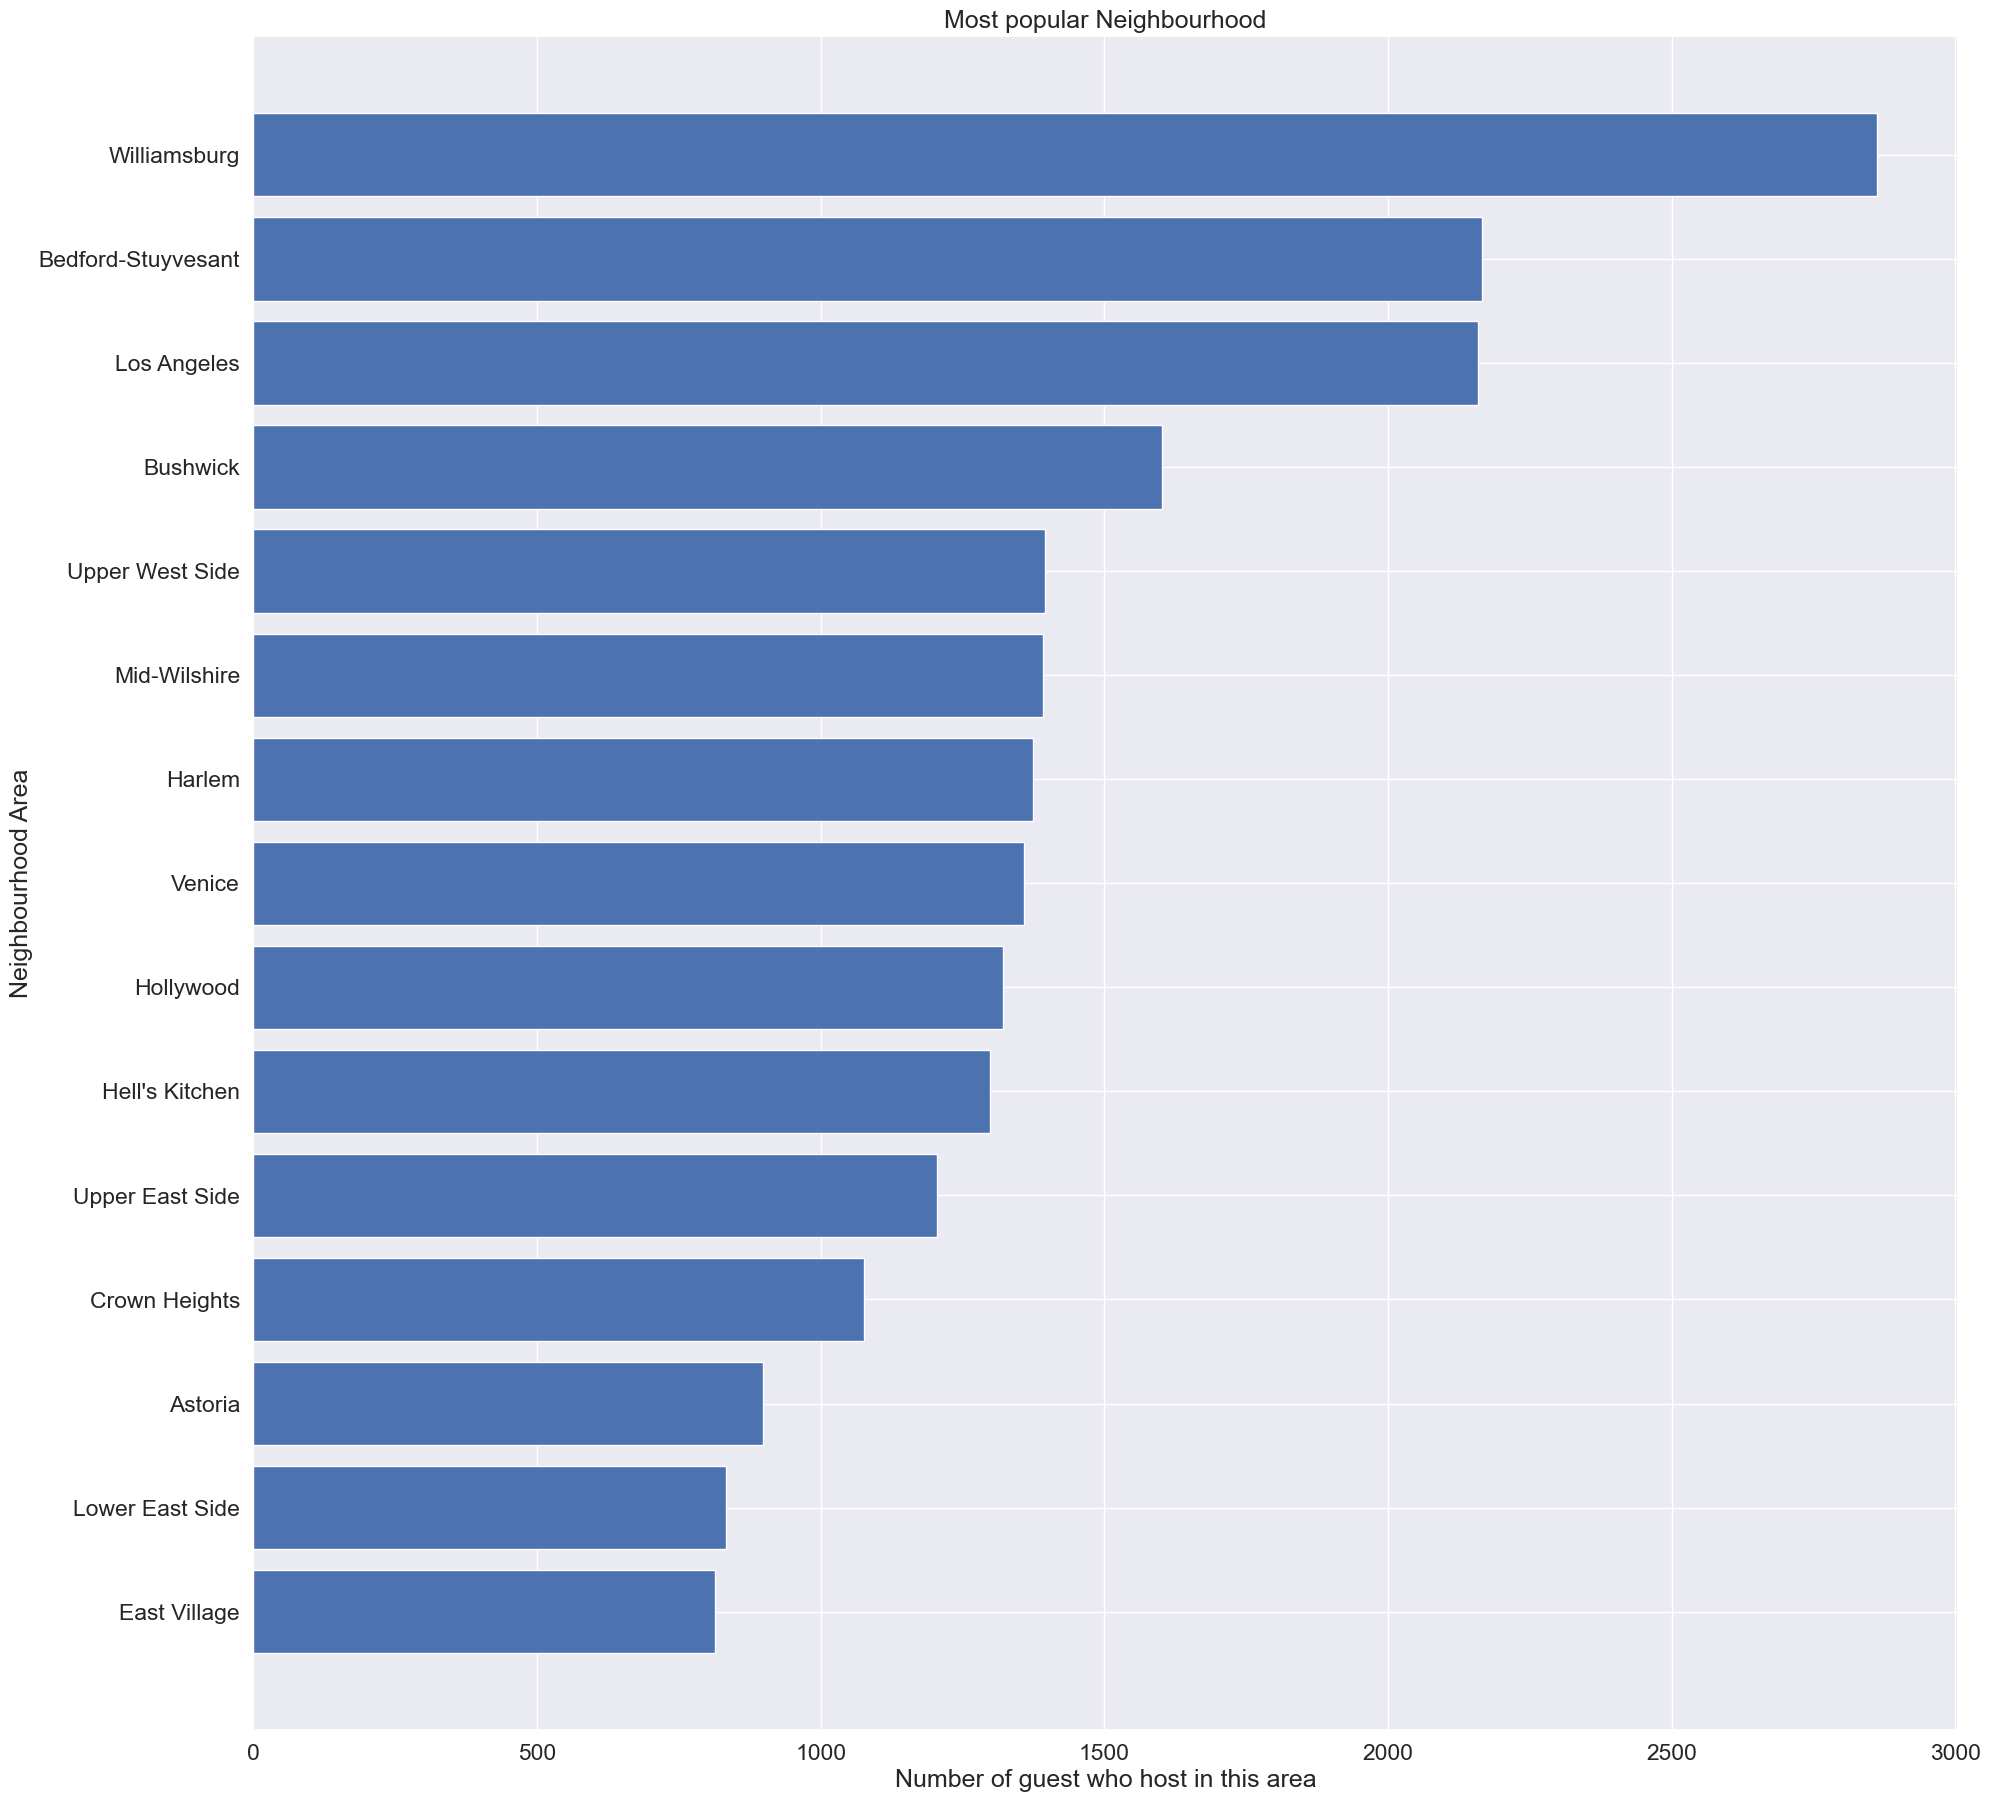

In [377]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [378]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation='vertical')
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [379]:
categoric_data = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categoric_data.append(column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

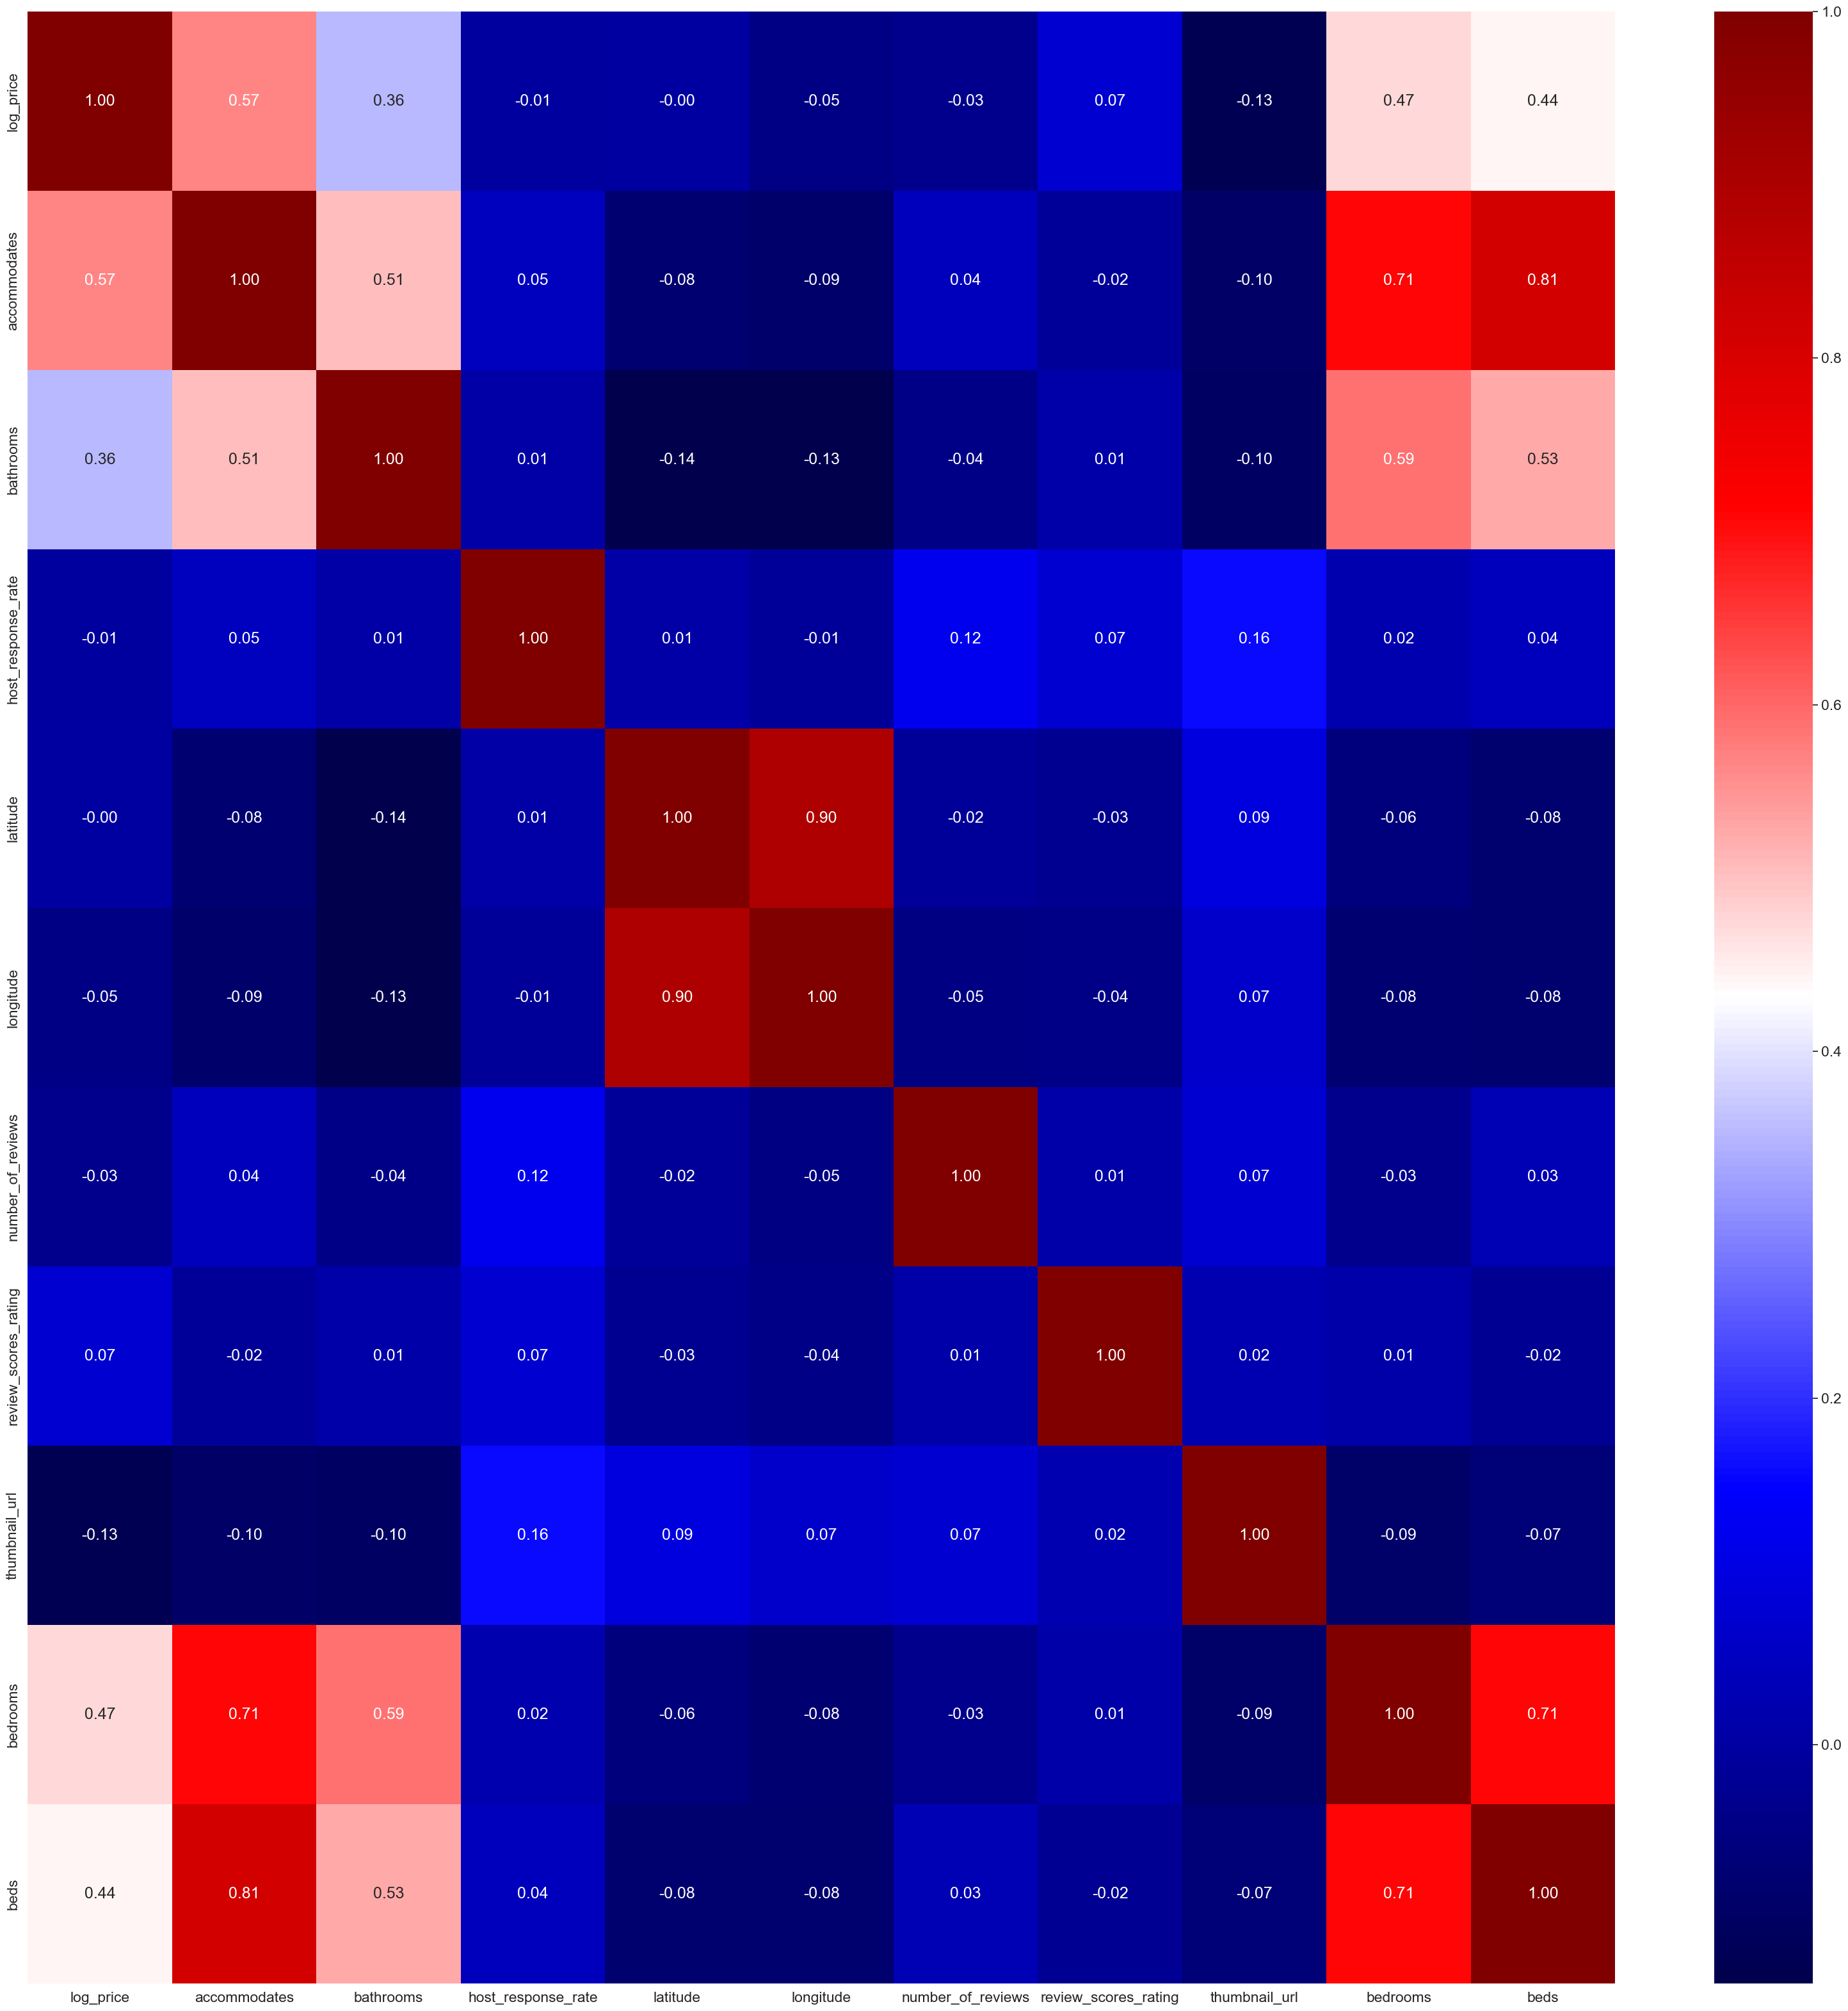

In [380]:
plt.figure(figsize = (40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [381]:
def plot_hist(df,variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)  # Rotate x-label vertically
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [382]:
grouped_data = df[["neighbourhood", "log_price"]].groupby("neighbourhood").mean()
value_counts = df["neighbourhood"].value_counts()

# Add value counts to the grouped data
grouped_data['Value Counts'] = value_counts
grouped_data.sort_values(by="Value Counts", ascending=False)[:10]

log_price  Value Counts
neighbourhood                              
Williamsburg        4.740027   2862        
Bedford-Stuyvesant  4.423185   2166        
Los Angeles         4.607737   2158        
Bushwick            4.274465   1601        
Upper West Side     5.001347   1396        
Mid-Wilshire        4.674082   1392        
Harlem              4.636397   1374        
Venice              5.118042   1358        
Hollywood           4.688395   1321        
Hell's Kitchen      5.131274   1299

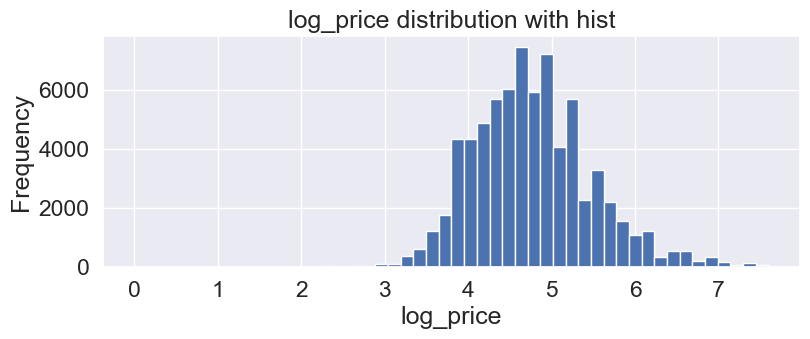

In [383]:

plot_hist(df,'log_price')

#### Relationship between log_price and categorical columns

In [384]:
def groupby_target(column):
    # Relationship between target and categorical columns
    grouped_data = df[[column, "log_price"]].groupby(column).mean().sort_values(by="log_price", ascending=False)
    value_counts = df[column].value_counts()

    # Add value counts to the grouped data
    grouped_data['Value Counts'] = value_counts

    # Print the updated grouped data
    print(grouped_data)
   
    print(50*'--')

In [385]:
for i in categoric_data:
    groupby_target(i)

                    log_price  Value Counts
property_type                              
Timeshare           5.602600   77          
Lighthouse          5.521461   1           
Vacation home       5.420951   11          
Castle              5.368424   13          
Earth House         5.285391   4           
Tipi                5.246118   3           
Train               5.204399   2           
Boat                5.200865   65          
Serviced apartment  5.147467   21          
Villa               5.112427   179         
Boutique hotel      5.083352   69          
Condominium         5.026539   2658        
Island              5.010635   1           
Loft                5.007919   1244        
Other               4.946367   607         
Yurt                4.944360   9           
Cave                4.909373   2           
Treehouse           4.845520   7           
Townhouse           4.833539   1692        
In-law              4.816649   71          
House               4.797114   1

#### -Apartmant and house have more impact on price and they are most frequent

#### -Although the price of Entire home/apt are over the mean, they are most preferred.

#### -Bed type consisst of 72000 real bed. We consider this as realbad and others.

#### -Cancellation_policy. As the flexibity increases thhe price also increase. Expensive houses suffer more when the booking is cancelled. Therefore their policies are strickter. Since the extereme values are so few , we will add those in to strict.

#### -cleaning_fee has affect on price. This is not included in price. So extra. People may think it would be cleaner if there is cleaning fee.

#### -Cities have little affet on price ????

#### - accommodates has large affect on price. We will handle outliears.

#### -  bathrooms . Outliears need to be handled ????

#### - host_has_profile_pic this column consist of only 226 false value. So has almost no affect on price

#### - host_identity_verified has no affect. 

#### - Has almost no affexct on price. But has affect on preferebility

#### - bedrooms has large affect on price. Outliears need to be handled

#### - beds has large affect on price. Outliears need to be handled

#### - first_review and last_review. From last review to now, between first and last review , year of first review




In [386]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="bar", height=8)
        g.set_ylabels("log_price")
        plt.show()

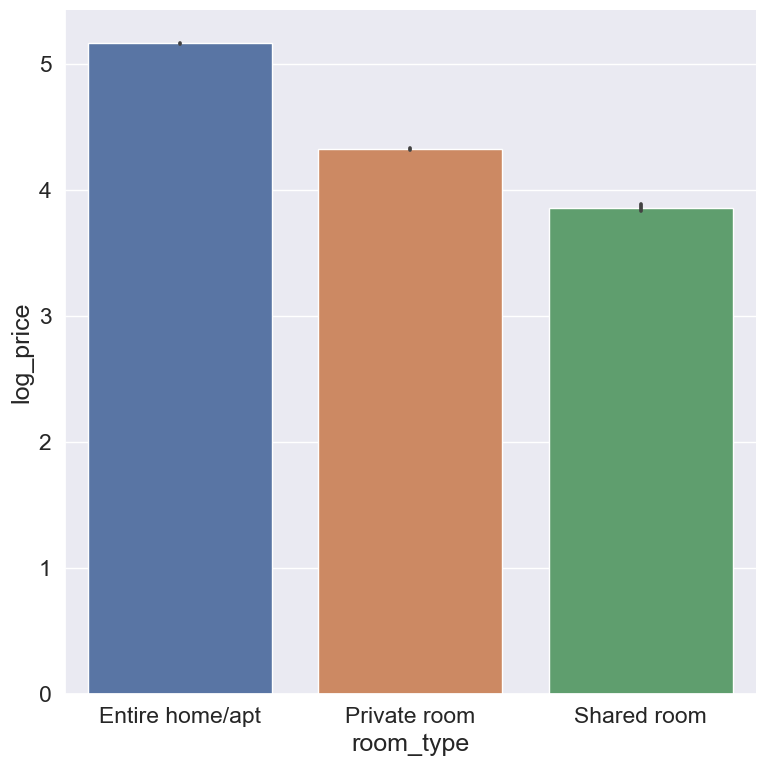

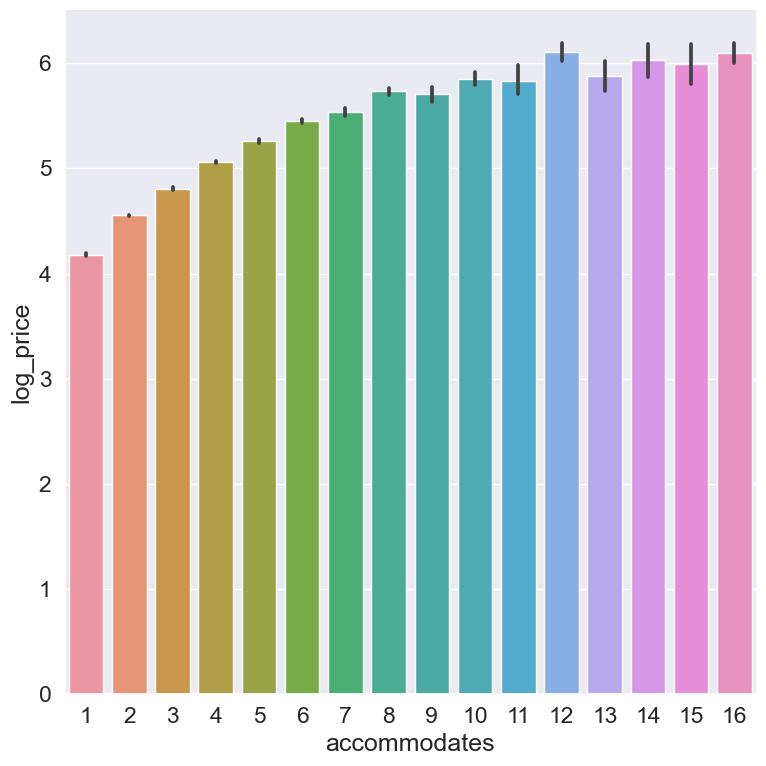

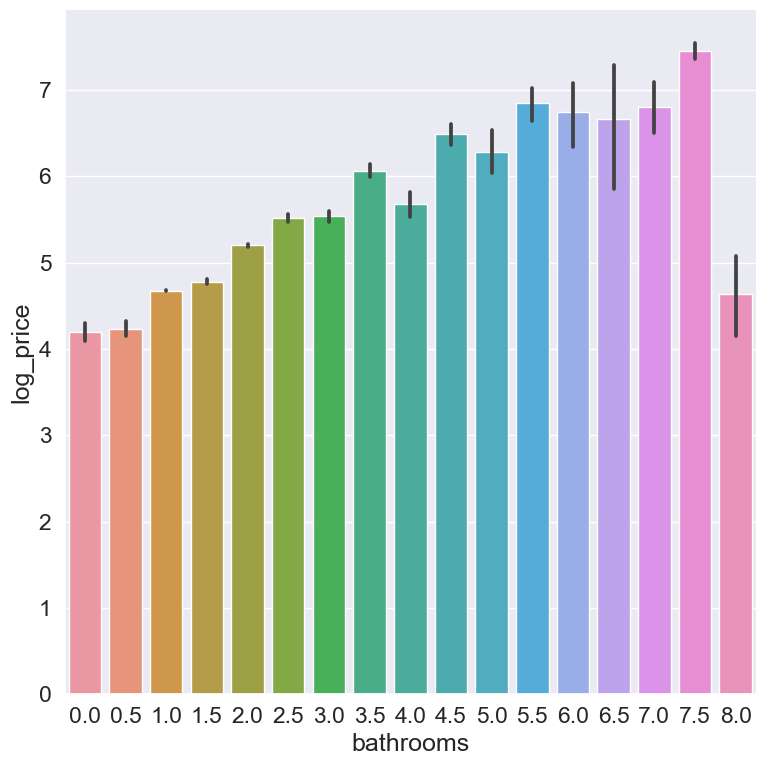

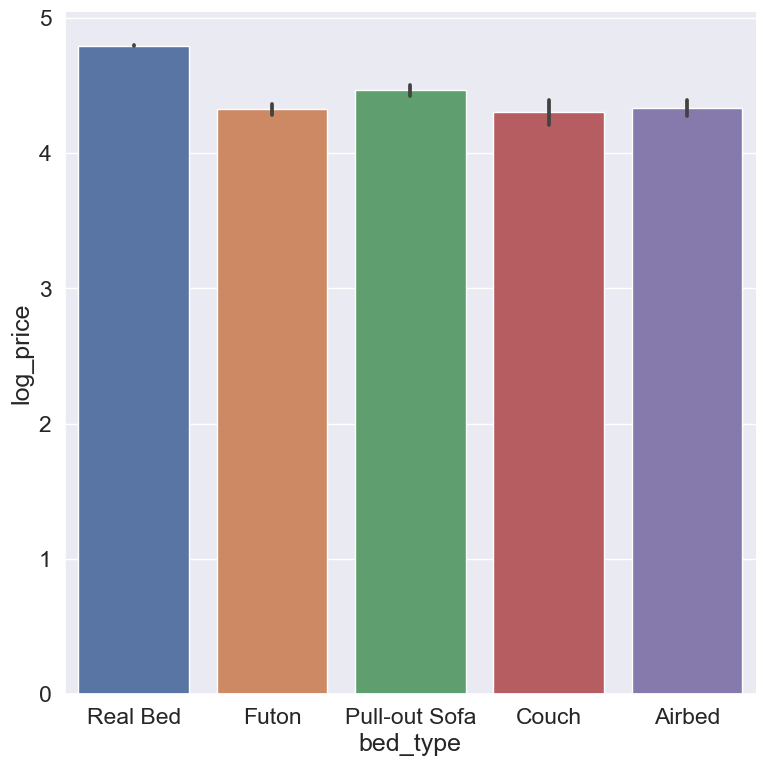

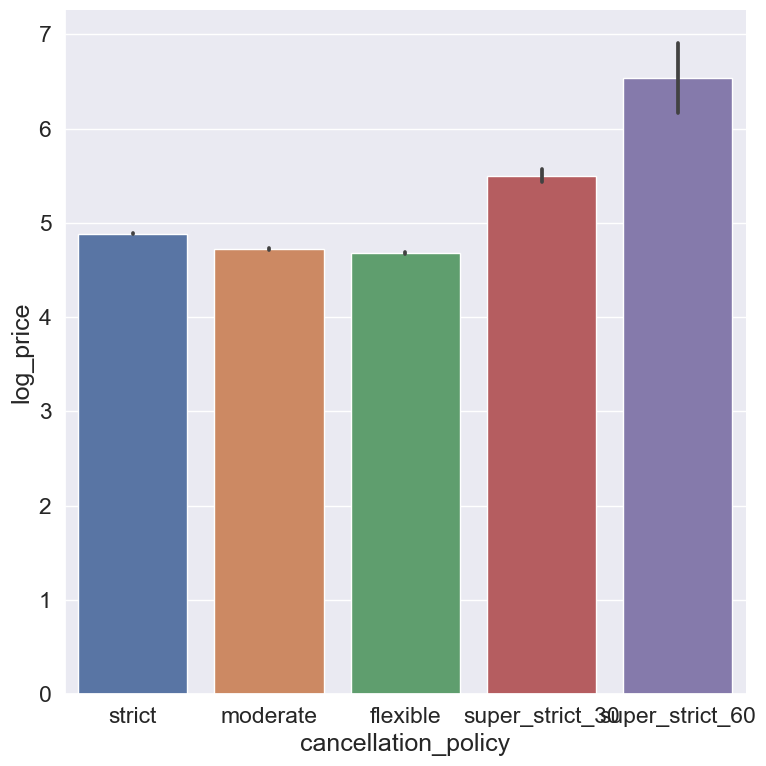

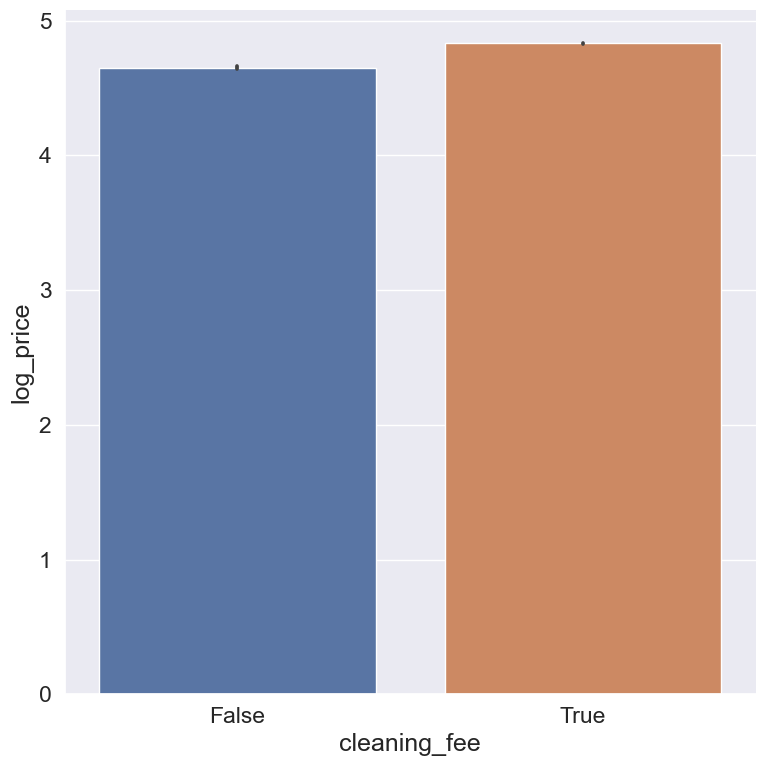

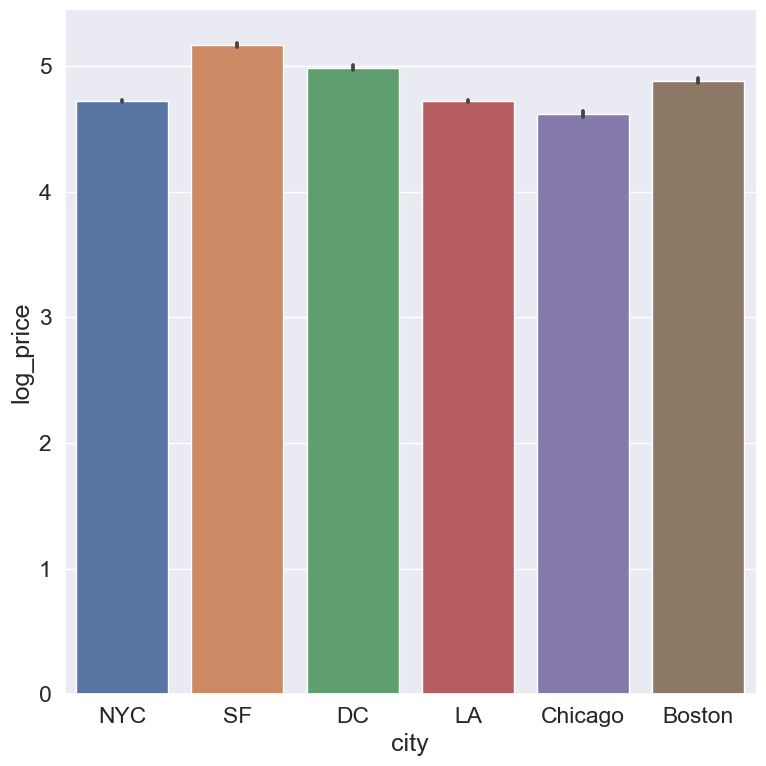

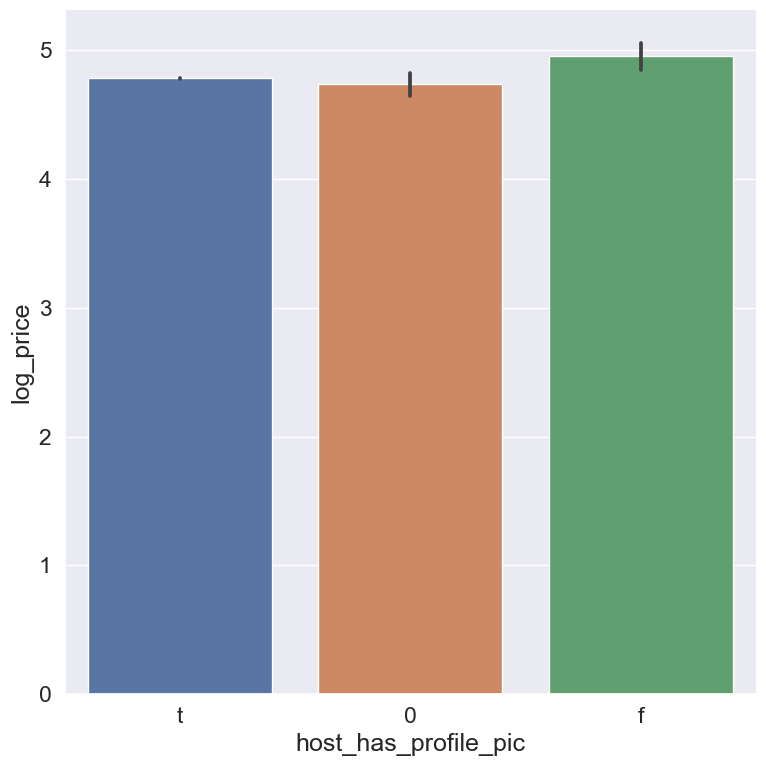

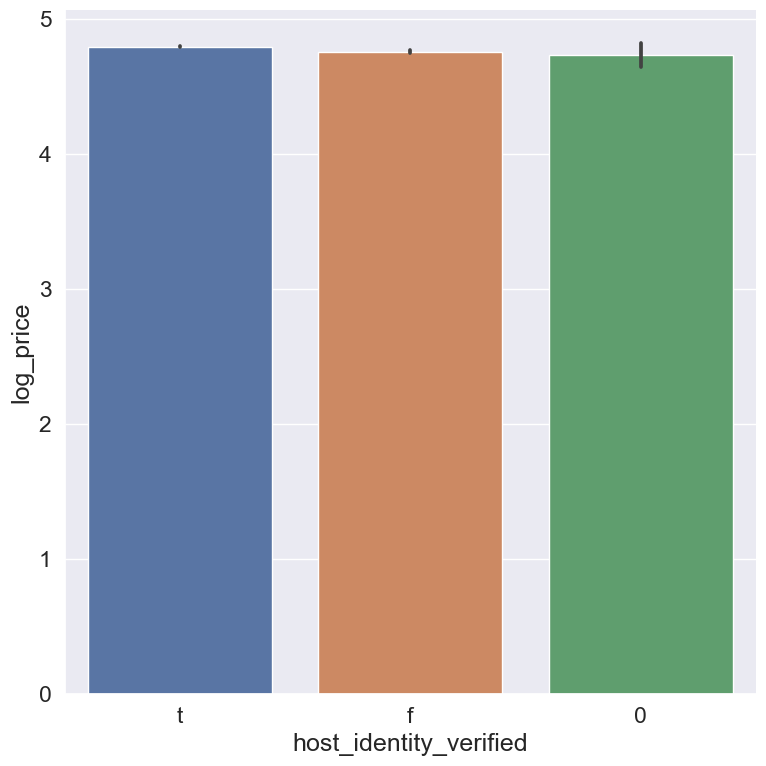

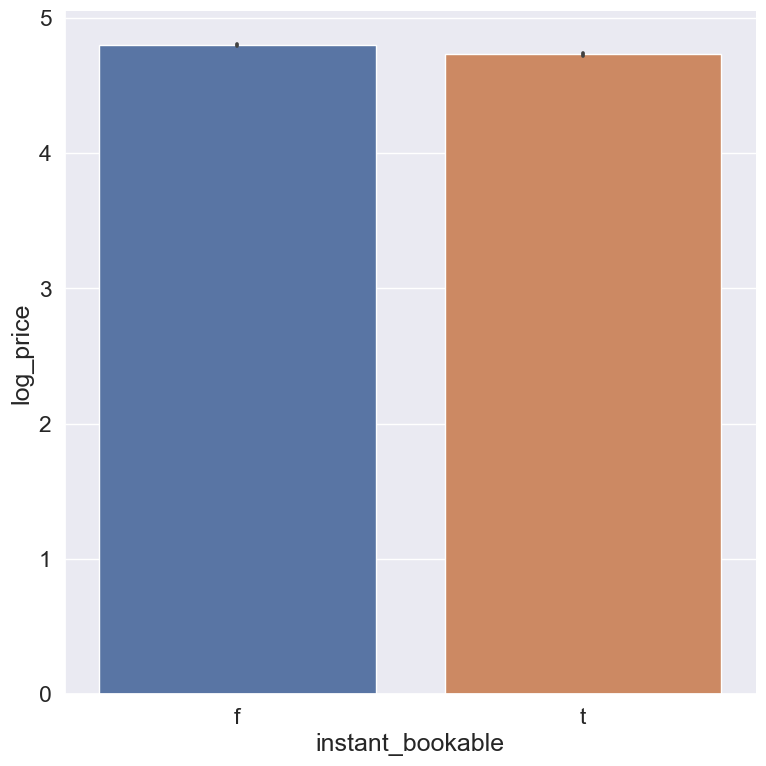

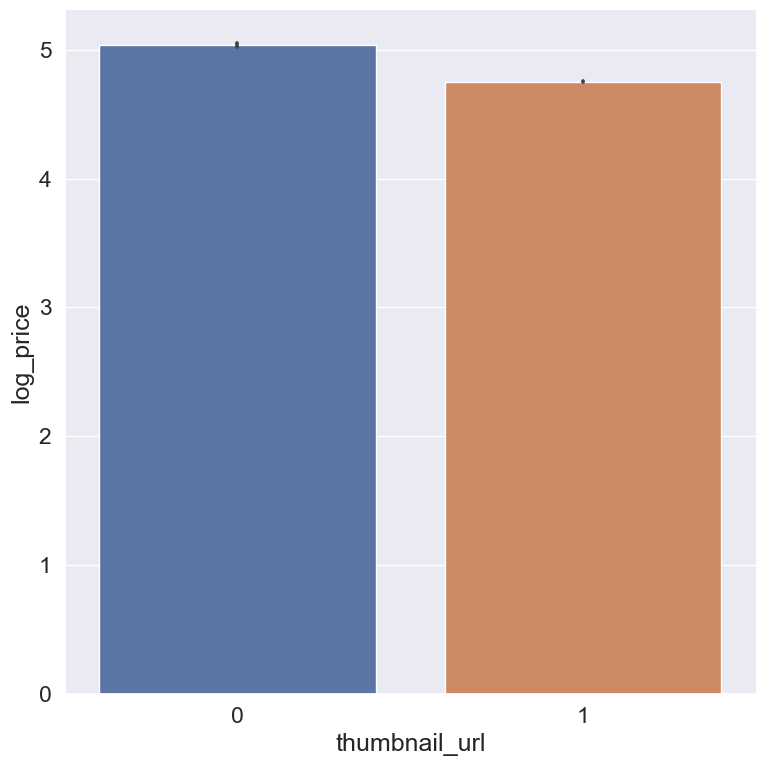

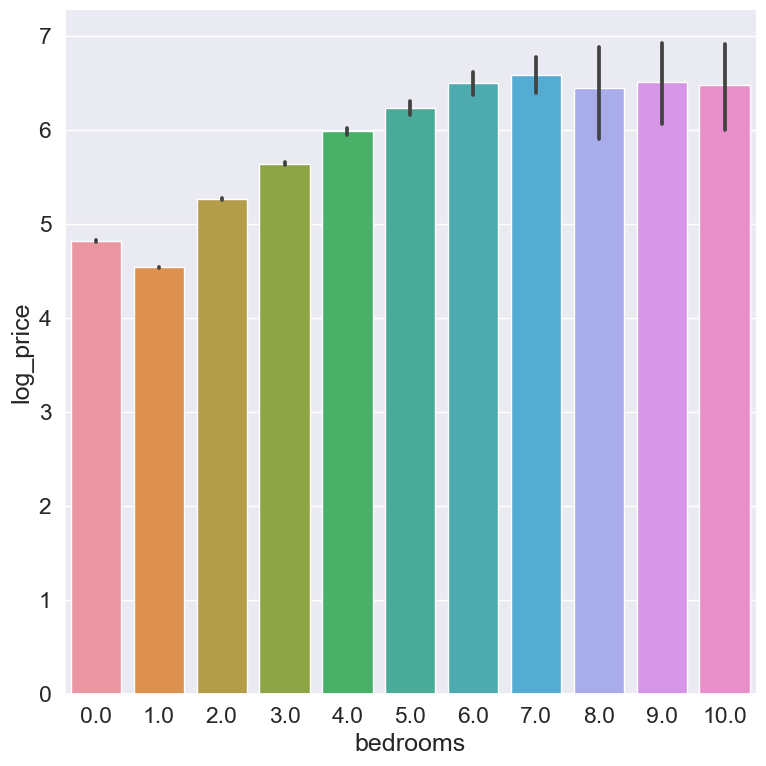

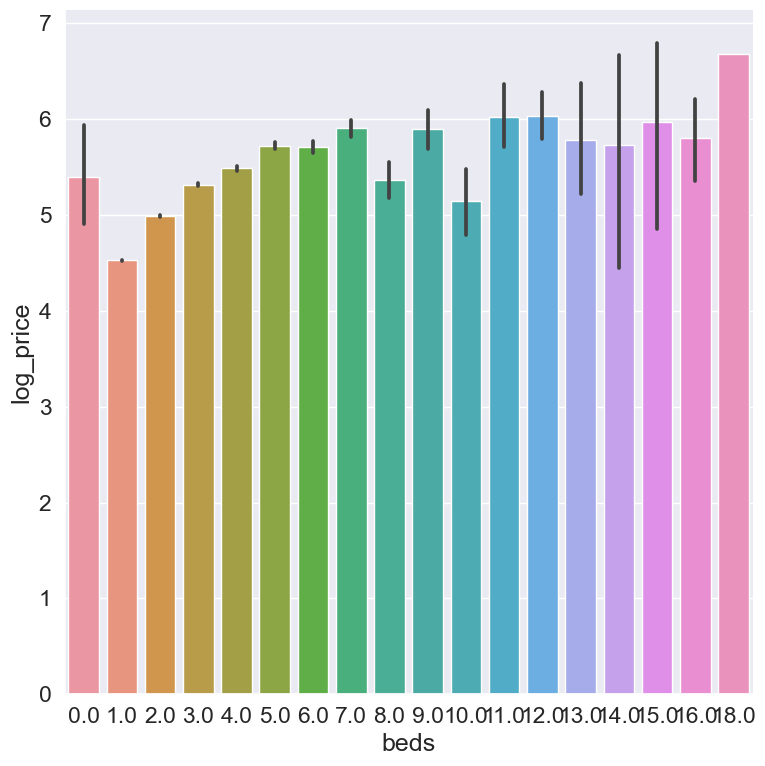

In [387]:
for i in df.columns :
    catplot(i)

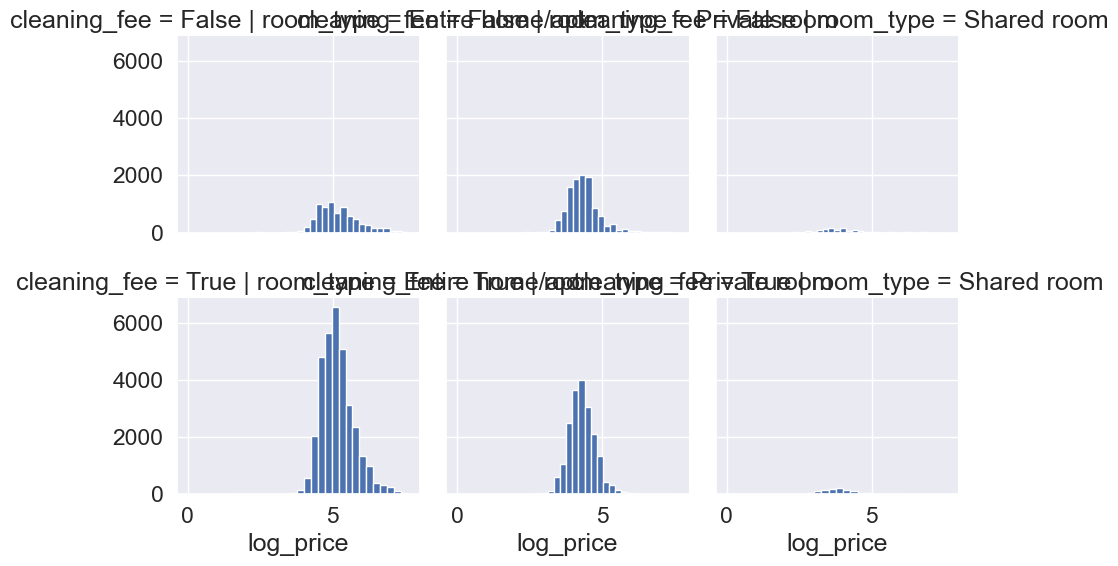

In [388]:
# Duzen yapilacak - unique degerleri az olanlarla denenecek
g = sns.FacetGrid(df, col = "room_type", row = "cleaning_fee")
g.map(plt.hist, "log_price", bins = 25)

plt.show()

#### -neighbourhood. Williamsburg is most populer. Its open to further calculations

In [389]:
def box_plot_target(df,column):
    sns.boxplot(x=column, y="log_price", data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Log Price")
    plt.title(f"Distribution of Log Price by {column}")
    plt.show()

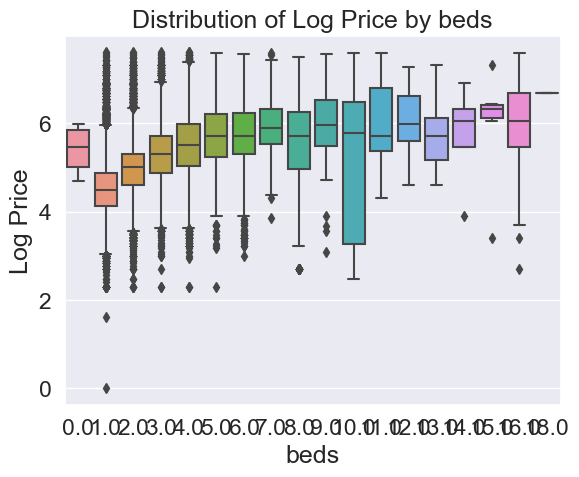

In [390]:
box_plot_target(df,'beds')

# OUTLIER HANDLE

In [391]:
def show_outliers(df,column):
    '''
    Visialize outliers of given column
    '''
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=df[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

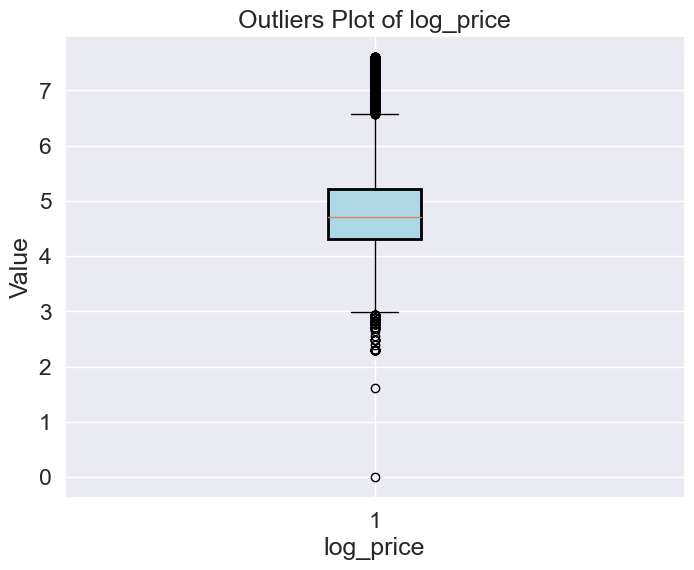

In [392]:
#check outliers
show_outliers(df,'log_price')

#### First method of handling outliers with IQR and quantiles

In [393]:
def outliers_iqr(df,column):
    '''
    first method of handling outliers with IQR and quantiles
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    df_clean = df[(df[column] > (Q1 - threshold * IQR)) & (df[column] < (Q3 + threshold * IQR))]
    print("max value is : ",df_clean[column].max())
    print("min value is : ",df_clean[column].min())
    print((df.shape[0]-df_clean.shape[0])," rows removed in total")
    
    return df_clean

In [394]:
df_iqr = outliers_iqr(df,"log_price")

max value is :  6.572282542694008
min value is :  2.995732273553992
1532  rows removed in total


In [395]:
df_iqr = outliers_iqr(df_iqr,"number_of_reviews")  # This method deleted too many rows. Such lost cant be accepted.

max value is :  58
min value is :  0
7814  rows removed in total


In [396]:
# lets the diffreence
def compare_dist(df,df1,column):
    plot_hist(df,column)
    plot_hist(df1,column)


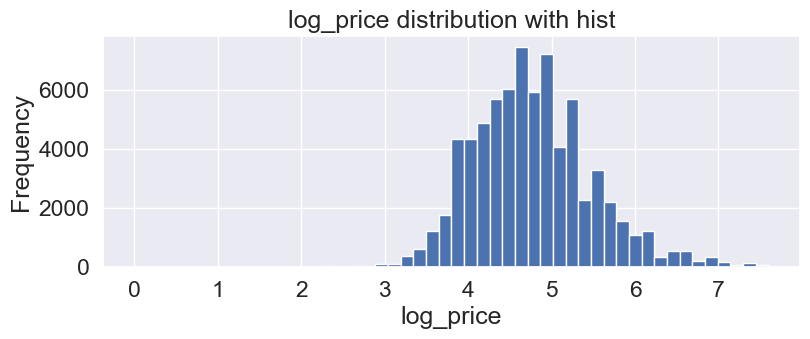

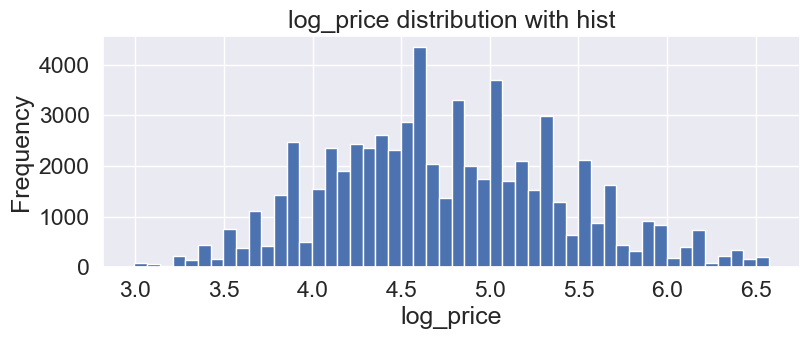

In [397]:
compare_dist(df,df_iqr,"log_price") # IQR method before and after

#### Second method of handling outliers by determining min and max value via quantiles

In [398]:
def remove_outliers(df, column, q1, q2):
    '''
    Second method of handling outliers with determining 'min' and 'max' value
    '''
    min_val = df[column].quantile(q1)
    max_val = df[column].quantile(q2)
    
    df_cleaned = df.loc[(df[column] >= min_val) & (df[column] <= max_val)].copy()
    print("max value is : ",df_cleaned[column].max())
    print("min value is : ",df_cleaned[column].min())
    print((df.shape[0]-df_cleaned.shape[0])," rows removed")
    return df_cleaned




In [399]:
cleaned_df = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [400]:
cleaned_df =remove_outliers(cleaned_df,"number_of_reviews",0.01, 0.9997)

max value is :  388
min value is :  0
23  rows removed


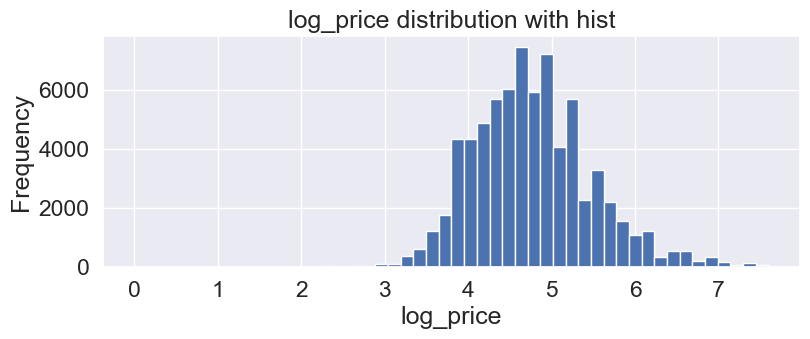

In [401]:
compare_dist(df,cleaned_df,"log_price") # min_max method before and after

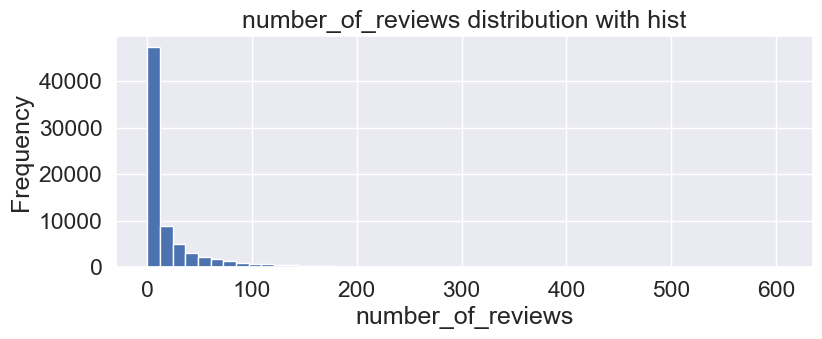

In [402]:
compare_dist(df,cleaned_df,"number_of_reviews") # min_max method before and after

In [403]:
def compare_outliers(df,df1,column):
    '''
    Compares before handling and after handling outliers
    '''
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()

    plt.boxplot(x=df1[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    # plt.boxplot(x=cleaned_df["log_price"])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

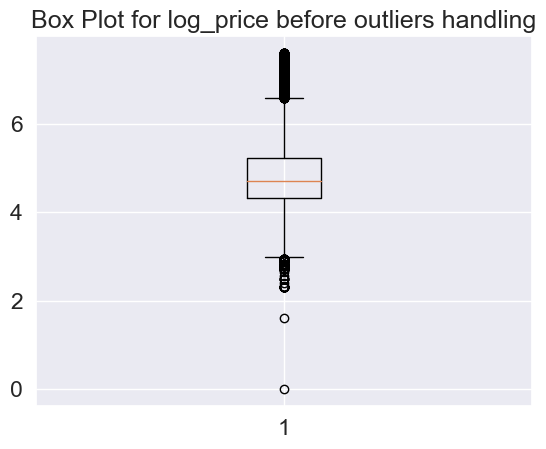

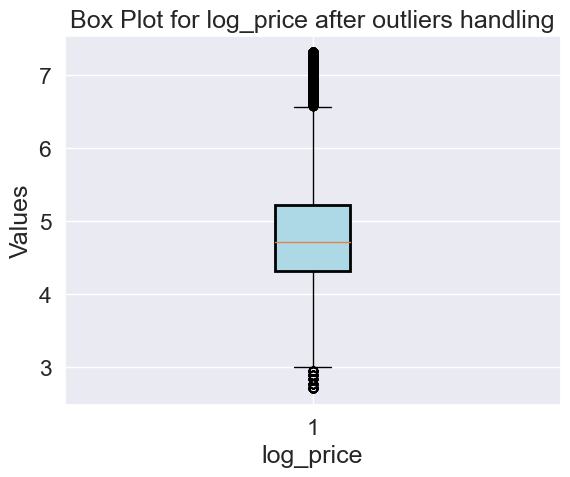

In [404]:
compare_outliers(df,cleaned_df,"log_price")  # min_max method

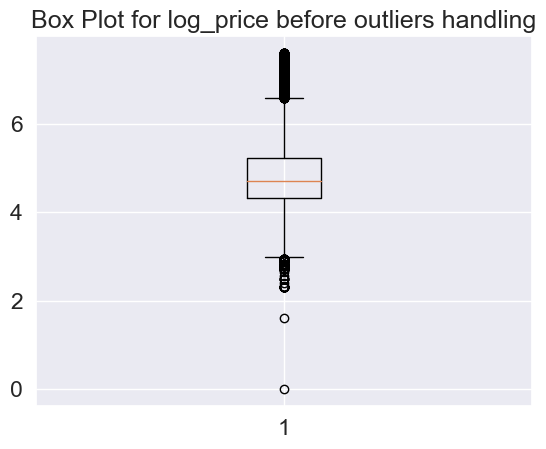

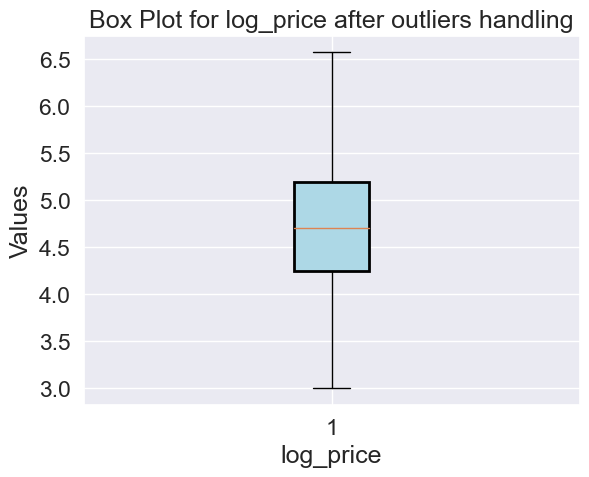

In [405]:
compare_outliers(df,df_iqr,"log_price")  # IQR method

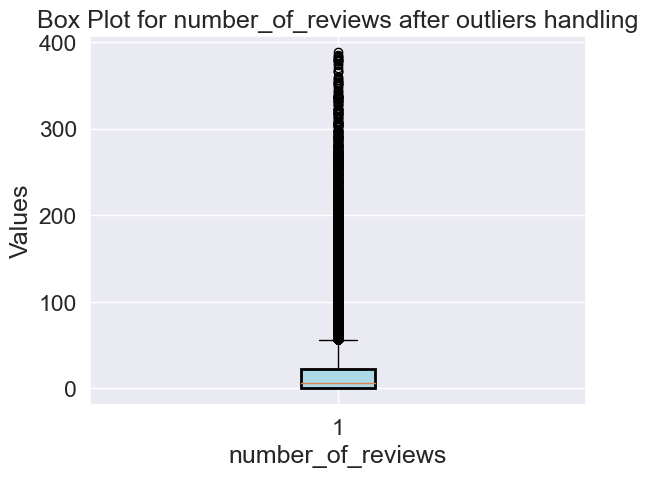

In [406]:
compare_outliers(df,cleaned_df,"number_of_reviews")  # min_max method

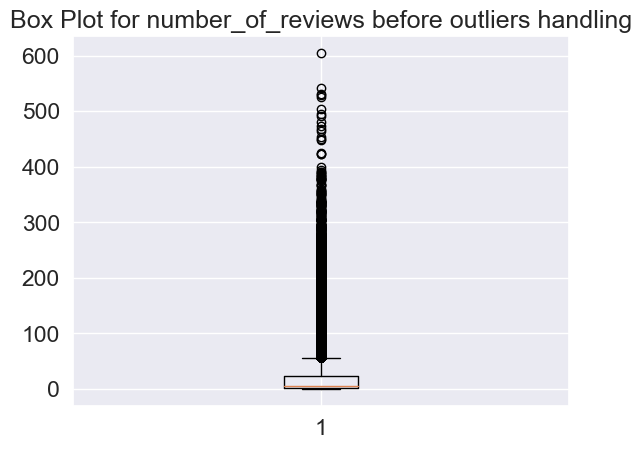

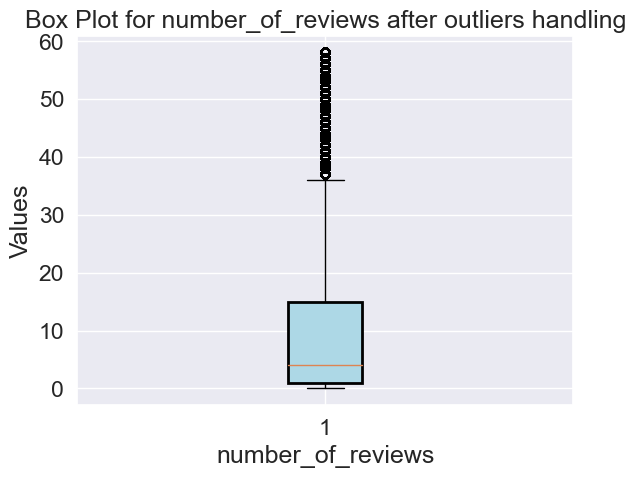

In [407]:
compare_outliers(df,df_iqr,"number_of_reviews") # IQR method

# FEATURE ENGINEERING

In [408]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
description               0    
first_review              15864
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
name                      0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [409]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island                1    
Name: 

In [410]:
# Replacing other categories with 'other'
import pandas as pd


# Property_type sütununda value count'u 25'ten küçük olanları "other" olarak güncelleyin
property_type_counts = df['property_type'].value_counts()
property_type_counts_less_than_25 = property_type_counts[property_type_counts < 25]
df.loc[df['property_type'].isin(property_type_counts_less_than_25.index), 'property_type'] = 'Other'

df['property_type'].value_counts()



property_type
Apartment          49003
House              16511
Condominium        2658 
Townhouse          1692 
Loft               1244 
Other              715  
Guesthouse         498  
Bed & Breakfast    462  
Bungalow           366  
Villa              179  
Dorm               142  
Guest suite        123  
Camper/RV          94   
Timeshare          77   
Cabin              72   
In-law             71   
Hostel             70   
Boutique hotel     69   
Boat               65   
Name: count, dtype: int64

In [411]:
 prop_corr = df[['property_type', "log_price"]].groupby('property_type').mean().sort_values(by="log_price", ascending=False)
 prop_corr['value']=df['property_type'].value_counts()
 prop_corr

log_price  value
property_type                    
Timeshare        5.602600   77   
Boat             5.200865   65   
Villa            5.112427   179  
Boutique hotel   5.083352   69   
Condominium      5.026539   2658 
Loft             5.007919   1244 
Other            4.938913   715  
Townhouse        4.833539   1692 
In-law           4.816649   71   
House            4.797114   16511
Bungalow         4.783268   366  
Apartment        4.758850   49003
Guest suite      4.717513   123  
Guesthouse       4.685184   498  
Cabin            4.646499   72   
Camper/RV        4.602238   94   
Bed & Breakfast  4.556068   462  
Dorm             3.746140   142  
Hostel           3.647333   70

## we will make for property type get dummies and than delete some unneccesery colums(<10)

## property_type

In [412]:
df

log_price property_type        room_type   
0      5.010635   Apartment     Entire home/apt  \
1      5.129899   Apartment     Entire home/apt   
2      4.976734   Apartment     Entire home/apt   
3      6.620073   House         Entire home/apt   
4      4.744932   Apartment     Entire home/apt   
...         ...         ...                 ...   
74106  4.605170   Apartment     Private room      
74107  5.043425   Apartment     Entire home/apt   
74108  5.220356   Apartment     Entire home/apt   
74109  5.273000   Apartment     Entire home/apt   
74110  4.852030   Boat          Entire home/apt   

                                                                                                                                                                                                                                                                                                                                                                                                                amenities   
0      {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                            \
1      {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                                                                                                           
2      {TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}                                                                                              
3      {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}                                                                                                                                                                                                   
4      {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}                                                                                                                                                                                                                                       
...                                                                                                                                                                               ...                                                                                                                                                                                                                                       
74106  {}                                                                                                                                                                                                                                                                                                                                                                                                                   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free parking on premises",Heat

In [413]:
df = pd.get_dummies(df,columns=["property_type"])

In [414]:
df.columns

Index(['log_price', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse'

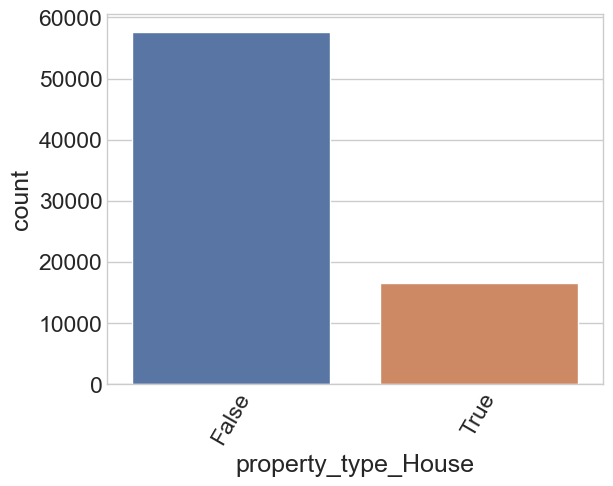

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

sns.countplot(x="property_type_House", data =df)
plt.xticks(rotation = 60)
plt.show()

## accomodates

In [416]:
df = pd.get_dummies(df,columns=["accommodates"])

In [417]:
df.columns

Index(['log_price', 'room_type', 'amenities', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa'

## cancellation_policy

In [418]:
import pandas as pd


df = pd.get_dummies(df,columns=["cancellation_policy"])

In [419]:

df.columns

Index(['log_price', 'room_type', 'amenities', 'bathrooms', 'bed_type',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa', 'accommodates_1',
   

In [420]:
df['cancellation_policy_super_strict_60'].dtype

dtype('bool')

## cleaning_fee

In [421]:
df['cleaning_fee'] = df['cleaning_fee'].astype(int)



In [422]:
df['cleaning_fee'].value_counts()

cleaning_fee
1    54403
0    19708
Name: count, dtype: int64

## bed_type

In [423]:
df = pd.get_dummies(df,columns=["bed_type"])
df.columns

Index(['log_price', 'room_type', 'amenities', 'bathrooms', 'cleaning_fee',
       'city', 'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa', 'accommodates_1',
       'accommo

## room_type

In [424]:
df['room_type'].value_counts()

room_type
Entire home/apt    41310
Private room       30638
Shared room        2163 
Name: count, dtype: int64

In [425]:

df = pd.get_dummies(df, columns=["room_type"])
df.head()

log_price   
0  5.010635   \
1  5.129899    
2  4.976734    
3  6.620073    
4  4.744932    

                                                                                                                                                                                                                                                                                                                 amenities   
0  {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                                                                                 \
1  {"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}                                                                                                
2  {TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}   
3  {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}                                                                                                        
4  {TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}                                                                                                                                            

   bathrooms  cleaning_fee city   
0  1.0        1             NYC  \
1  1.0        1             NYC   
2  1.0        1             NYC   
3  1.0        1             SF    
4  1.0        1             DC    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description   
0  Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## bathrooms

In [426]:
df['bathrooms'].value_counts()

bathrooms
1.0    58299
2.0    7936 
1.5    3801 
2.5    1567 
3.0    1066 
3.5    429  
4.0    286  
0.5    209  
0.0    198  
4.5    116  
5.0    72   
8.0    41   
5.5    39   
6.0    24   
6.5    12   
7.0    10   
7.5    6    
Name: count, dtype: int64

In [427]:
df = pd.get_dummies(df, columns=["bathrooms"])
df.columns


Index(['log_price', 'amenities', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa', 'accommodates_1',
       'accommodates_2', 'accommodates_3', 'acco

## amenities

In [428]:
import re
amenities_set = set()
for amenitie in df['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to front do

In [429]:

amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to fro

In [430]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens|'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [431]:
df.iloc[:,29:].columns

Index(['property_type_Condominium', 'property_type_Dorm',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_In-law',
       'property_type_Loft', 'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa', 'accommodates_1',
       'accommodates_2', 'accommodates_3', 'accommodates_4', 'accommodates_5',
       'accommodates_6', 'accommodates_7', 'accommodates_8', 'accommodates_9',
       'accommodates_10', 'accommodates_11', 'accommodates_12',
       'accommodates_13', 'accommodates_14', 'accommodates_15',
       'accommodates_16', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'room_type_Entire home/ap

In [432]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,29:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,29:].columns:
    if (df[col].sum() < len(df)/50) | (df[col].sum() > len(df)/1.02):
        infrequent_amenities.append(col)

In [433]:
infrequent_amenities

['property_type_Dorm',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_In-law',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Timeshare',
 'property_type_Villa',
 'accommodates_7',
 'accommodates_9',
 'accommodates_10',
 'accommodates_11',
 'accommodates_12',
 'accommodates_13',
 'accommodates_14',
 'accommodates_15',
 'accommodates_16',
 'cancellation_policy_super_strict_30',
 'cancellation_policy_super_strict_60',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bathrooms_0.0',
 'bathrooms_0.5',
 'bathrooms_3.0',
 'bathrooms_3.5',
 'bathrooms_4.0',
 'bathrooms_4.5',
 'bathrooms_5.0',
 'bathrooms_5.5',
 'bathrooms_6.0',
 'bathrooms_6.5',
 'bathrooms_7.0',
 'bathrooms_7.5',
 'bathrooms_8.0',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'outdoor_space',
 'host_greeting',
 'self_check_in']

In [434]:
for i in df.iloc[:,29:].columns : 
    print(df[i].value_counts())

property_type_Condominium
False    71453
True     2658 
Name: count, dtype: int64
property_type_Dorm
False    73969
True     142  
Name: count, dtype: int64
property_type_Guest suite
False    73988
True     123  
Name: count, dtype: int64
property_type_Guesthouse
False    73613
True     498  
Name: count, dtype: int64
property_type_Hostel
False    74041
True     70   
Name: count, dtype: int64
property_type_House
False    57600
True     16511
Name: count, dtype: int64
property_type_In-law
False    74040
True     71   
Name: count, dtype: int64
property_type_Loft
False    72867
True     1244 
Name: count, dtype: int64
property_type_Other
False    73396
True     715  
Name: count, dtype: int64
property_type_Timeshare
False    74034
True     77   
Name: count, dtype: int64
property_type_Townhouse
False    72419
True     1692 
Name: count, dtype: int64
property_type_Villa
False    73932
True     179  
Name: count, dtype: int64
accommodates_1
False    64677
True     9434 
Name: count, dtype

In [435]:
import matplotlib.pyplot as plt
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()


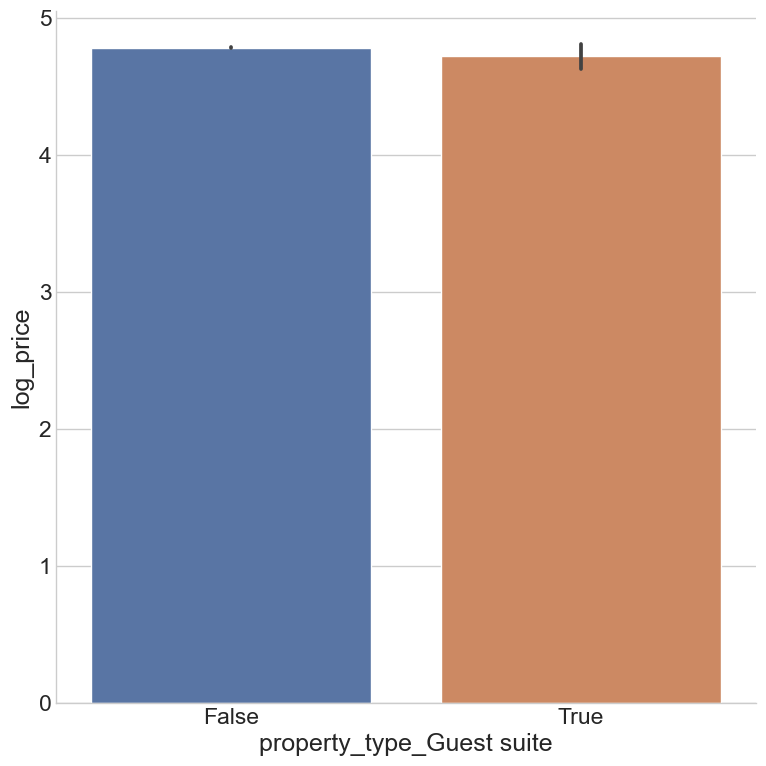

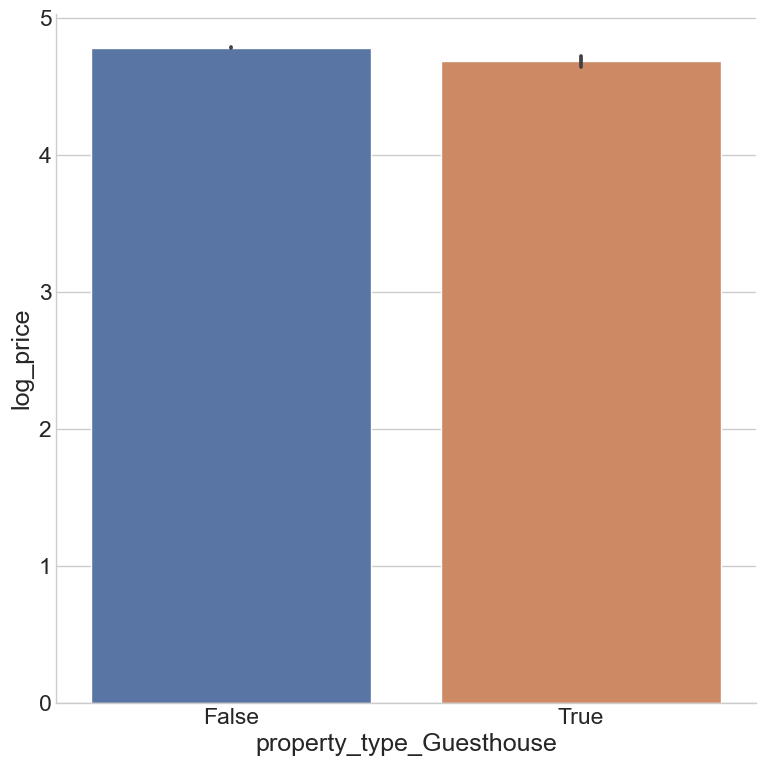

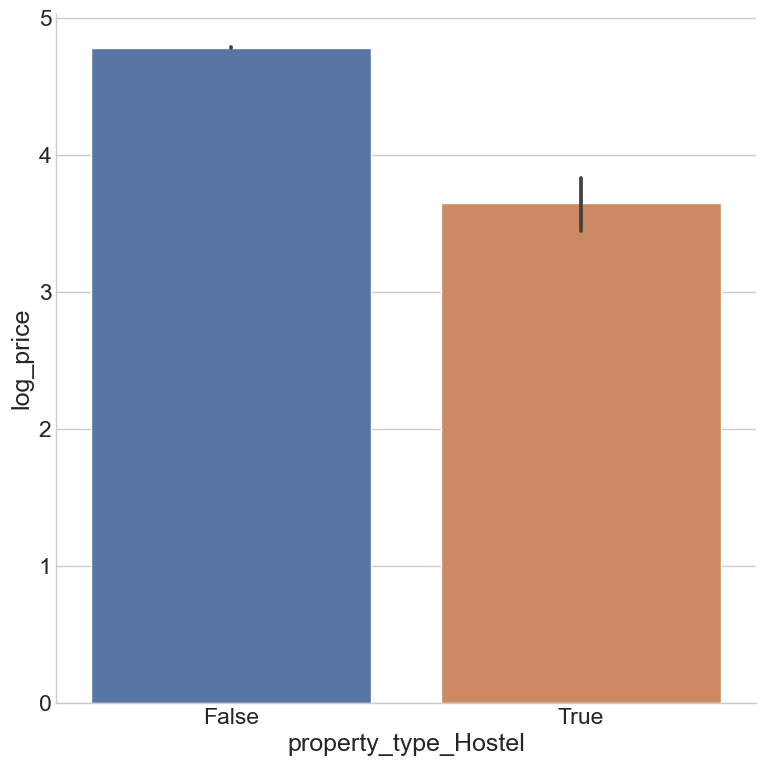

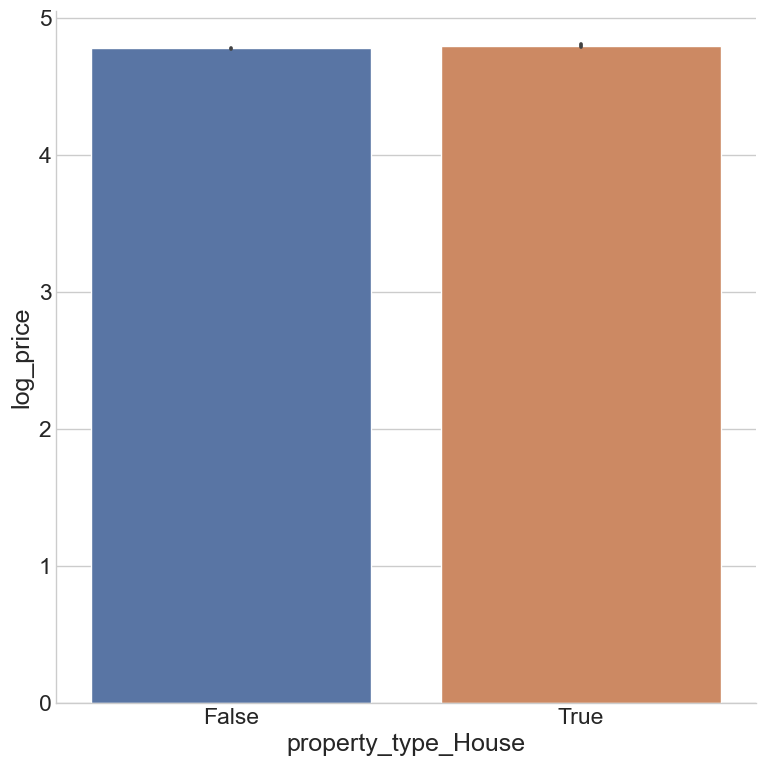

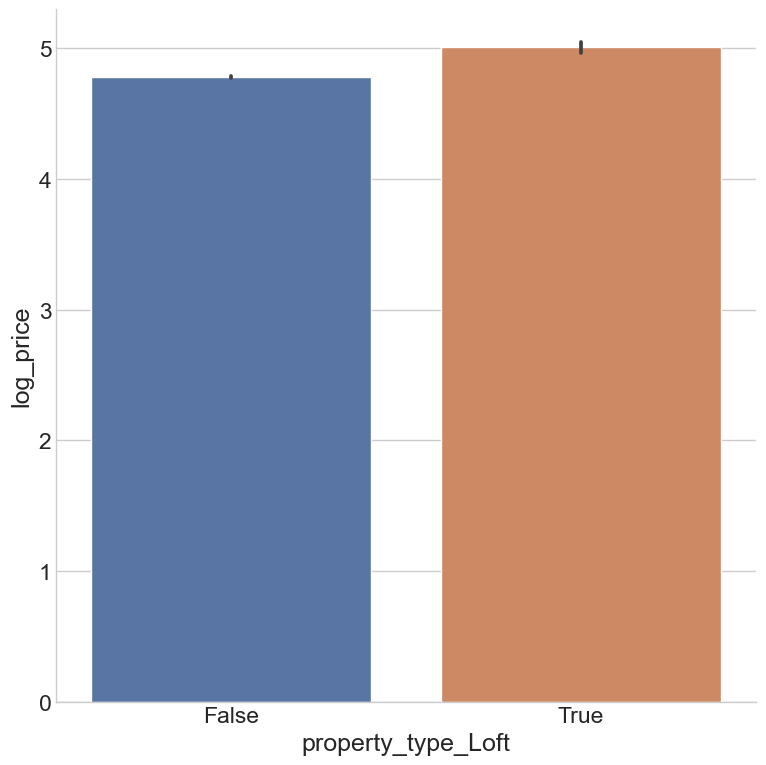

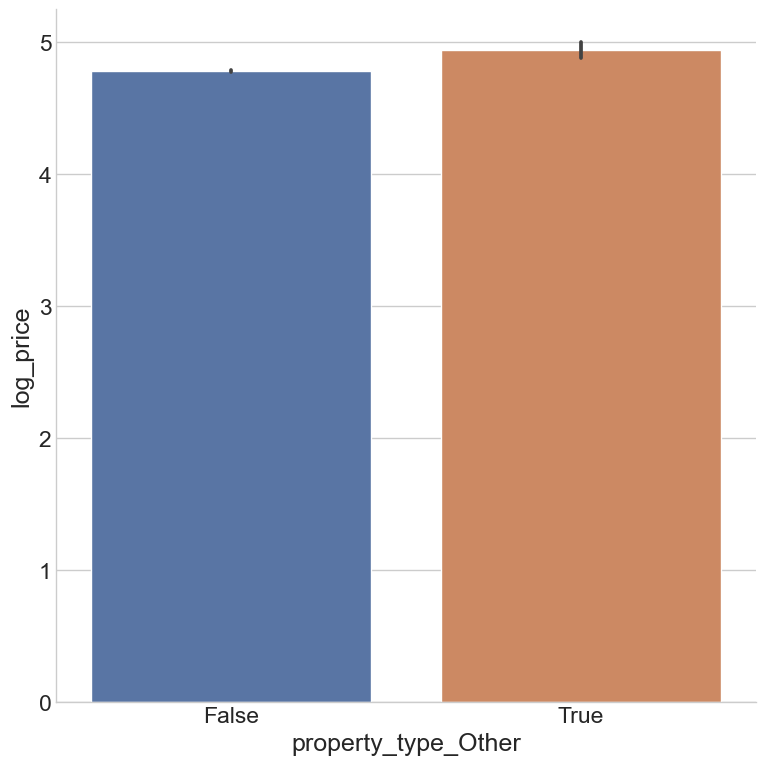

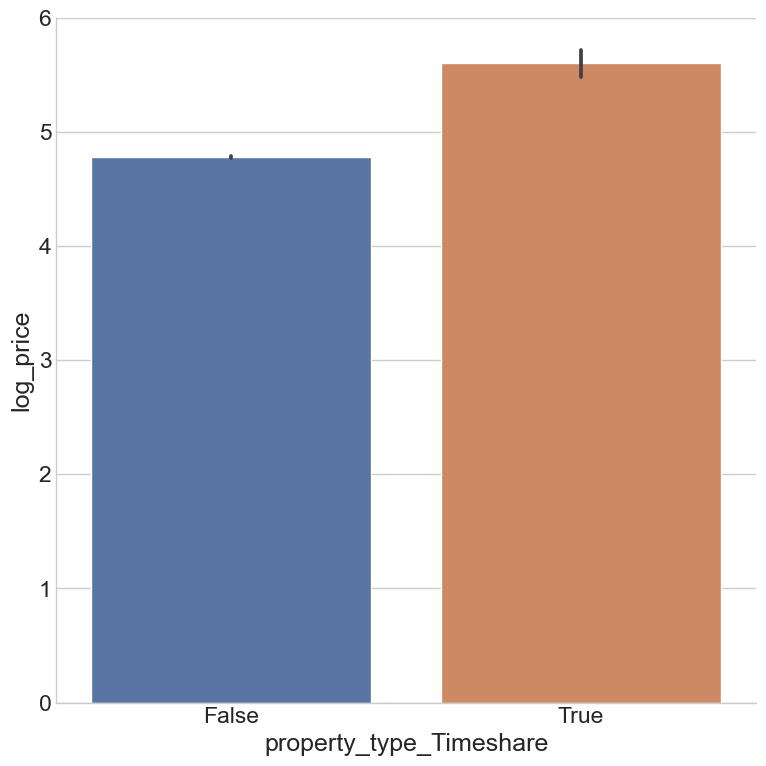

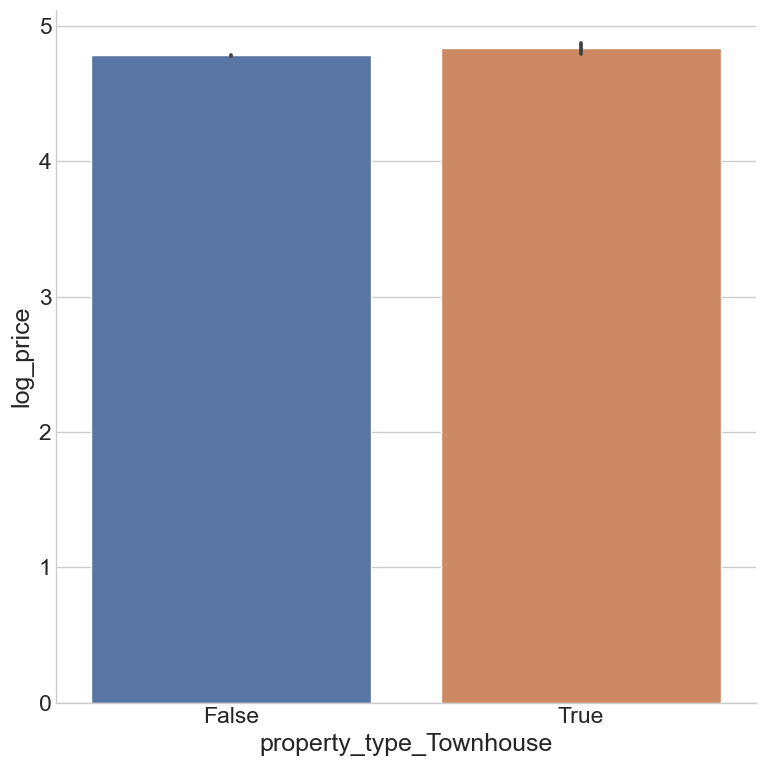

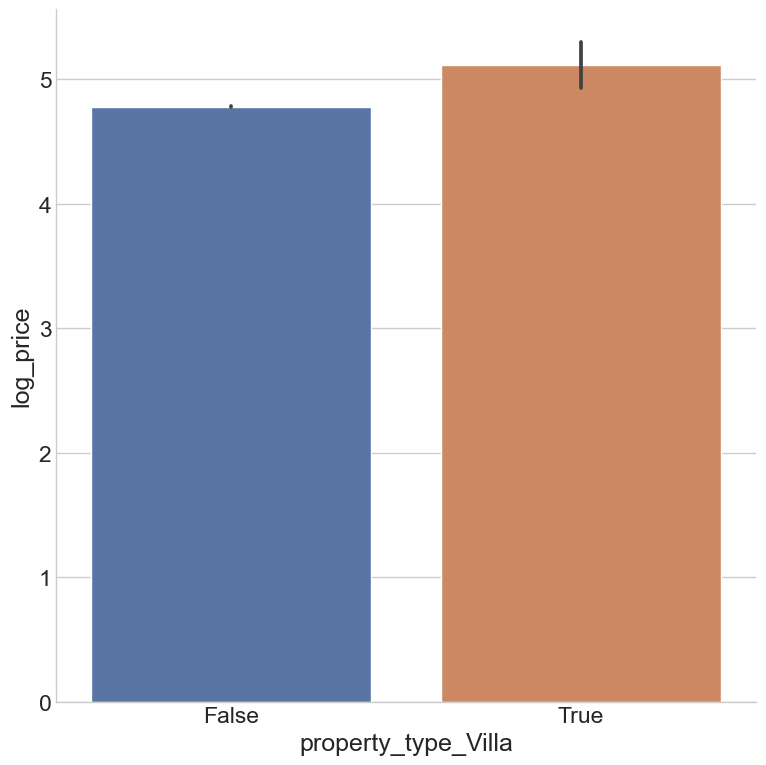

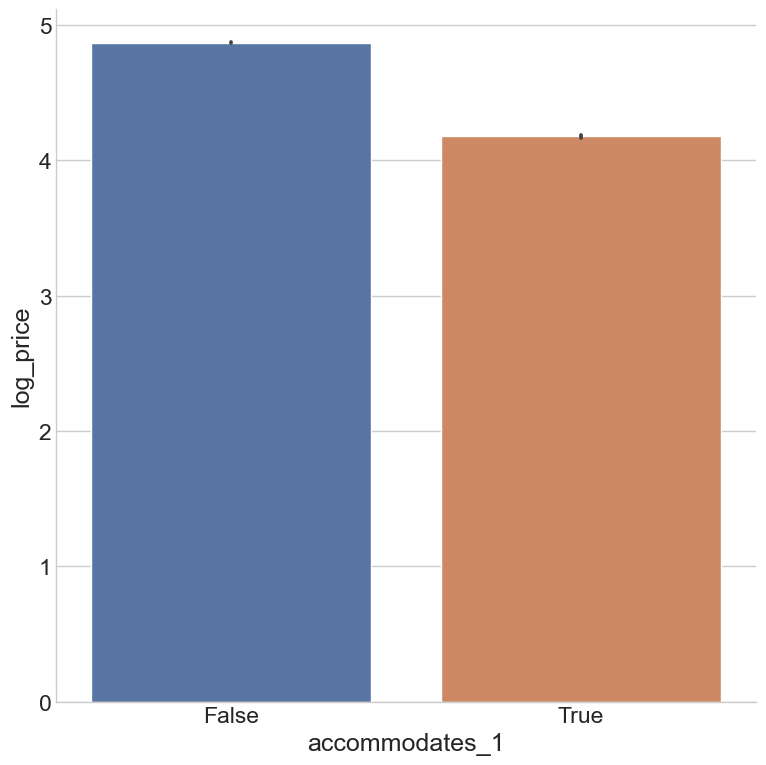

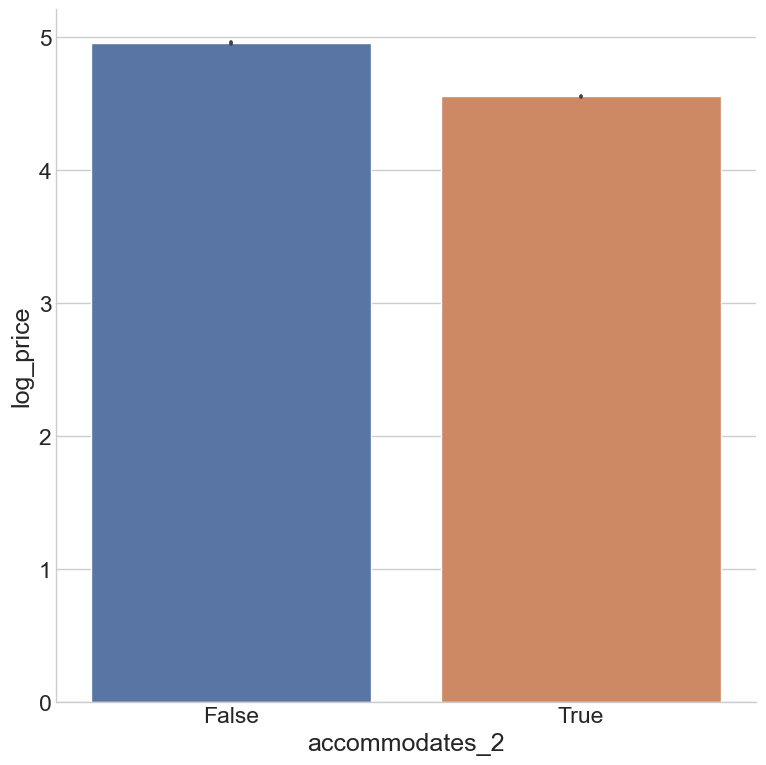

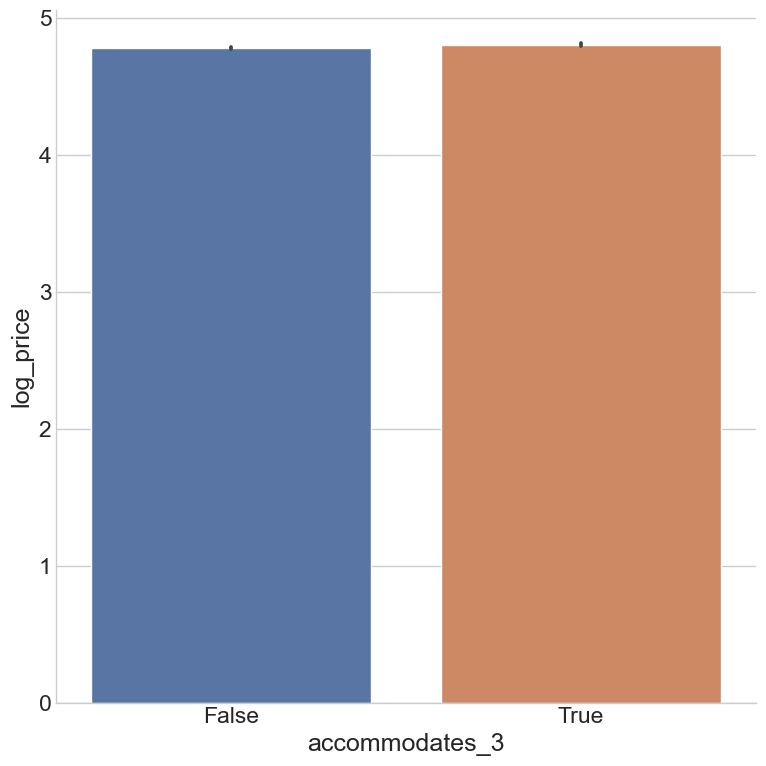

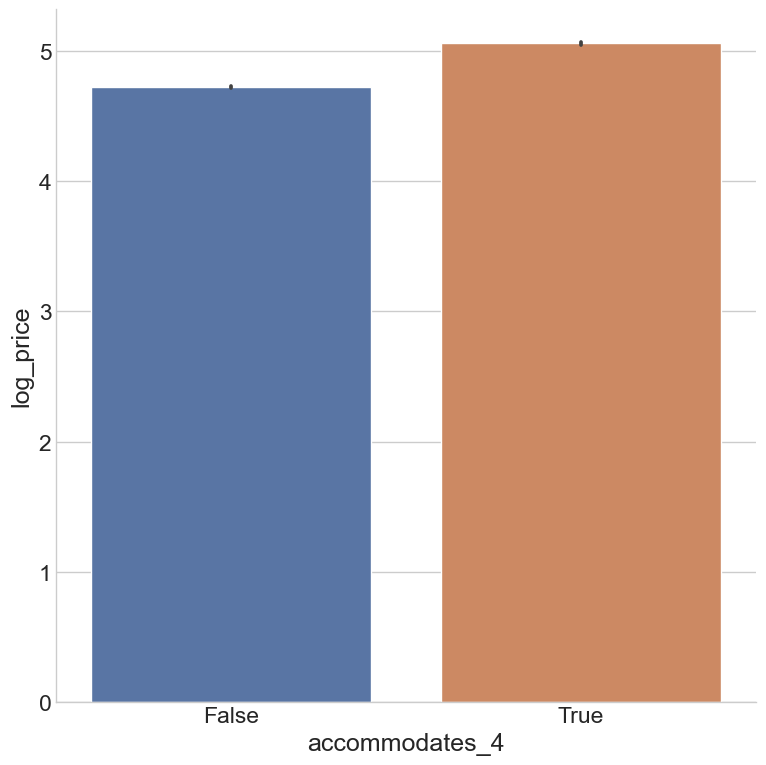

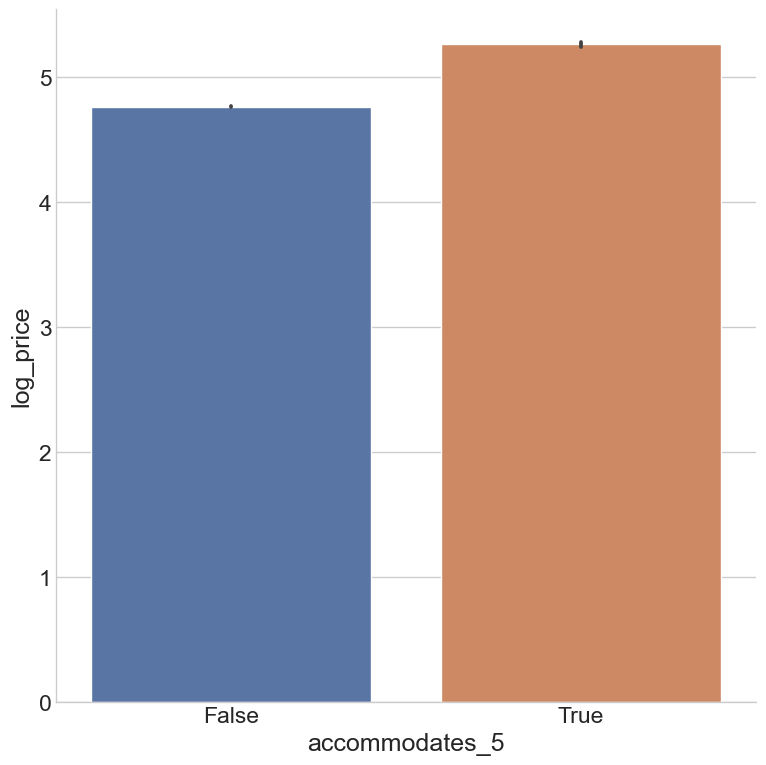

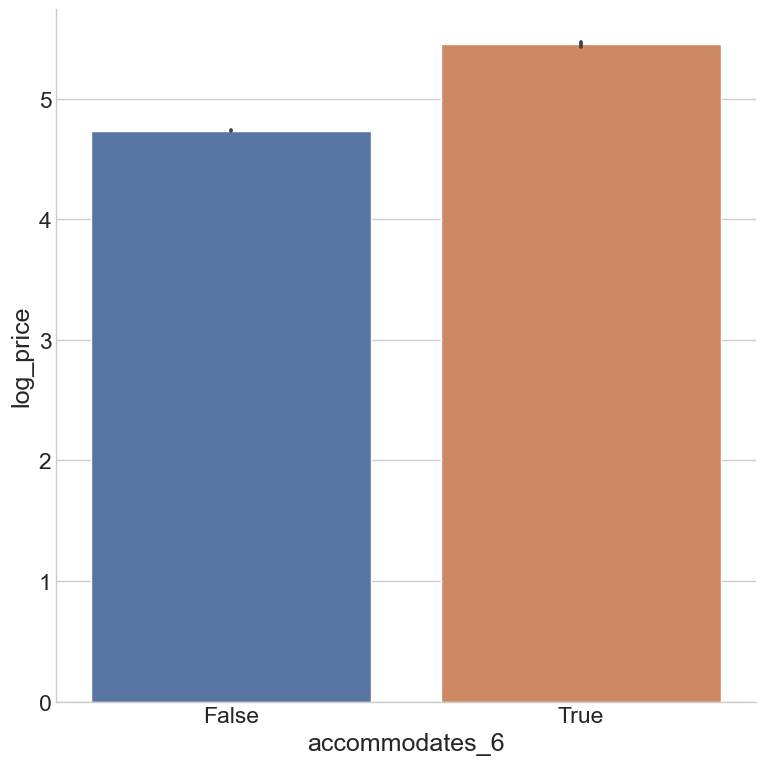

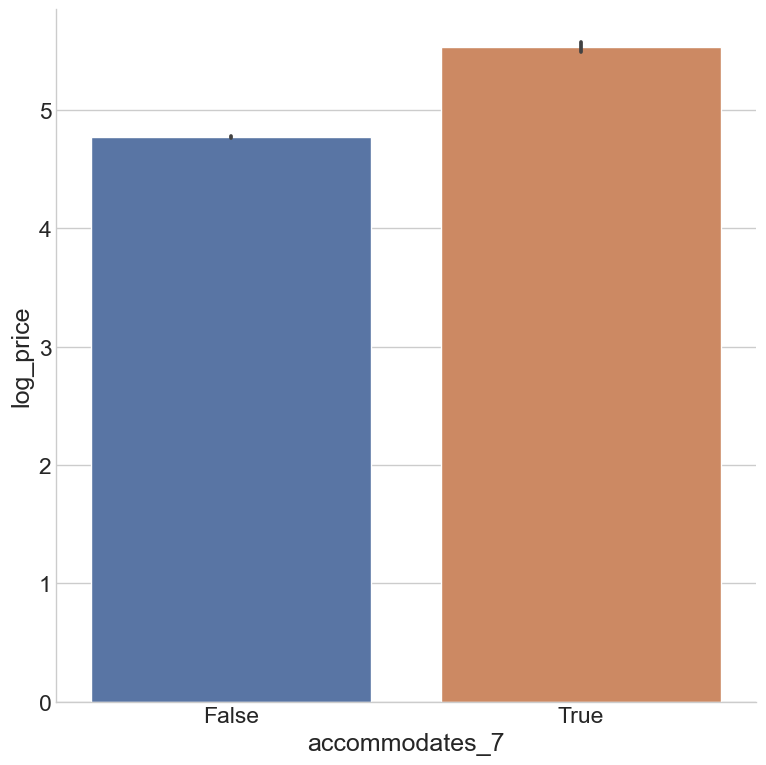

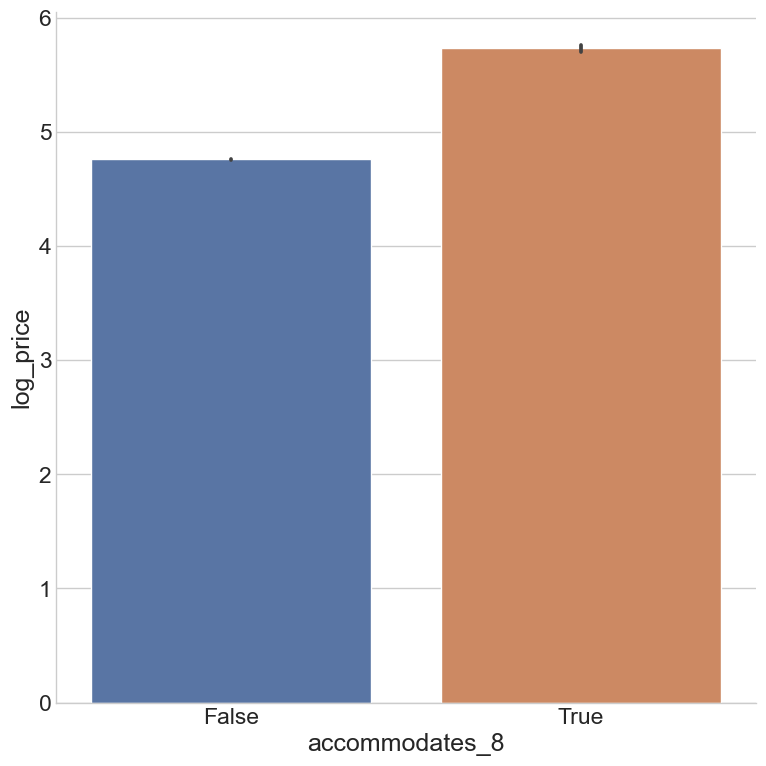

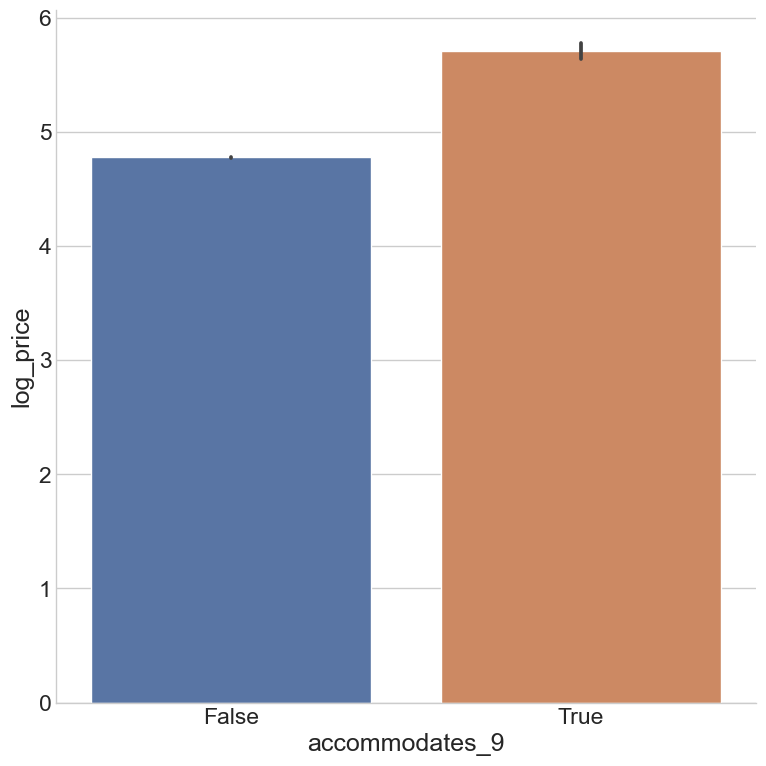

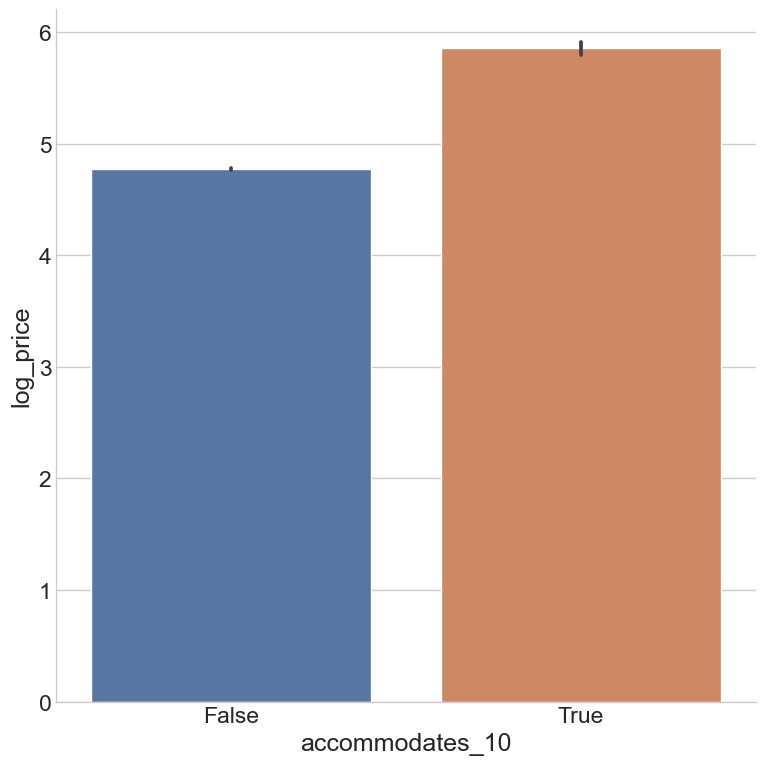

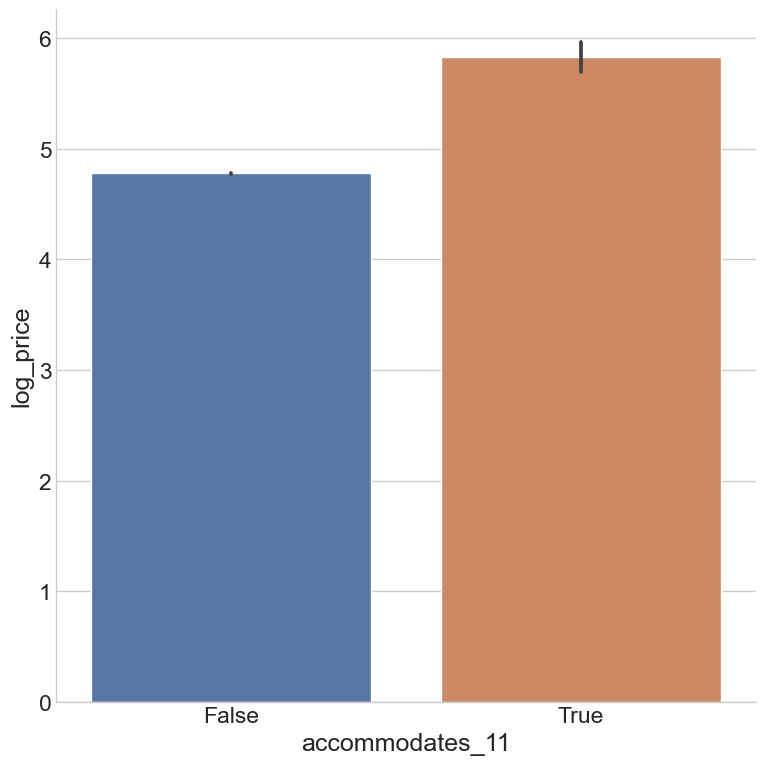

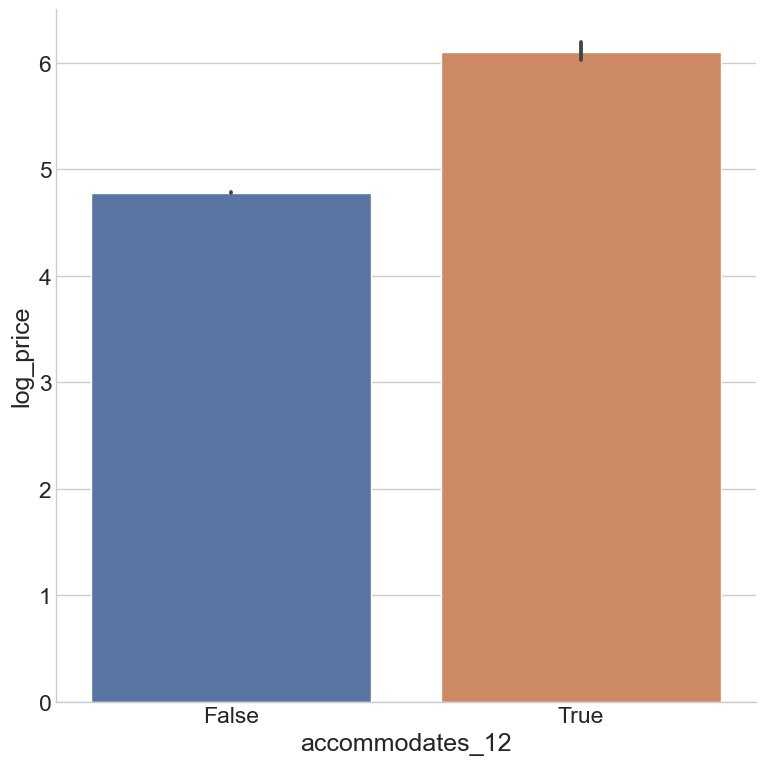

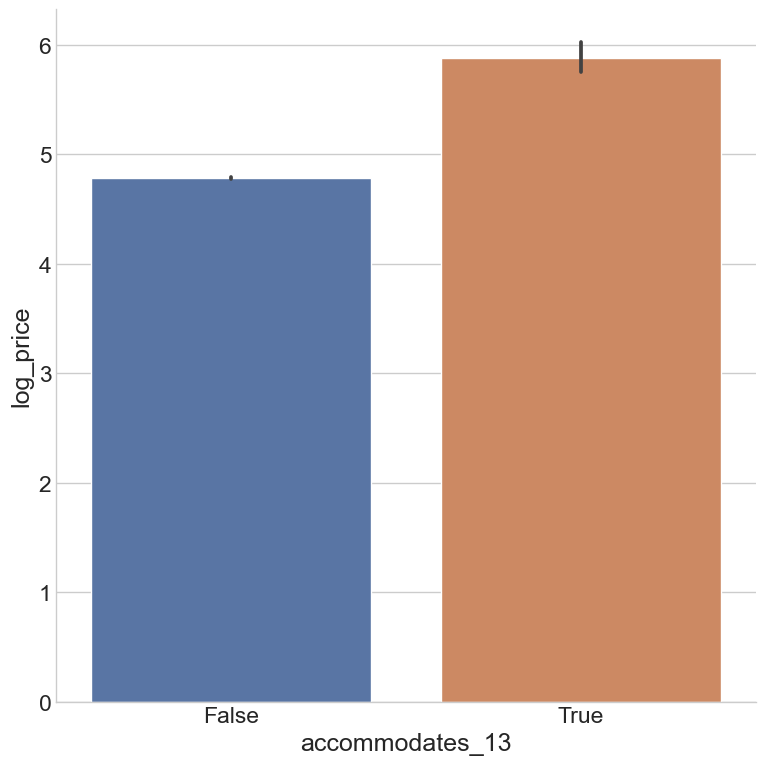

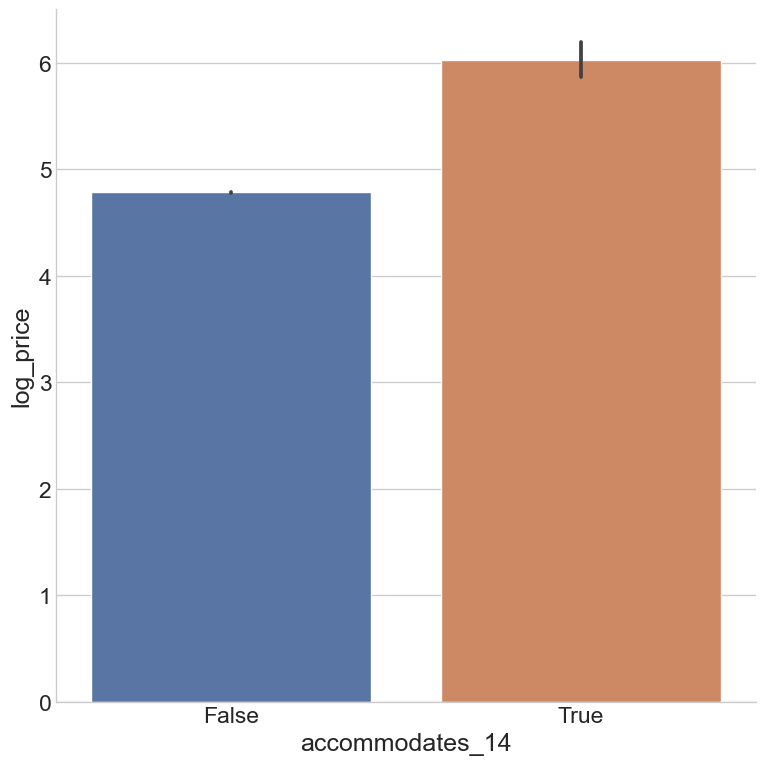

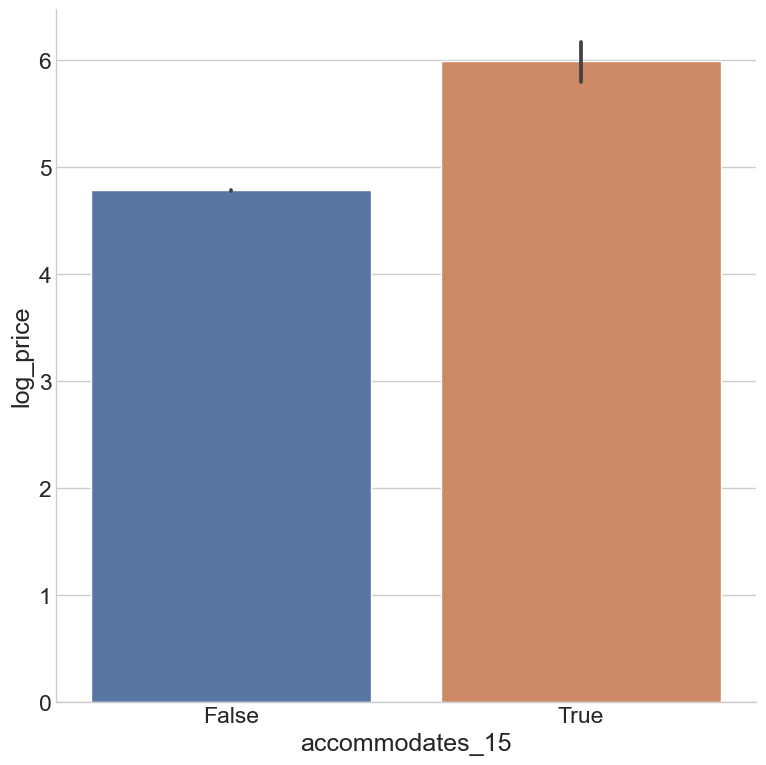

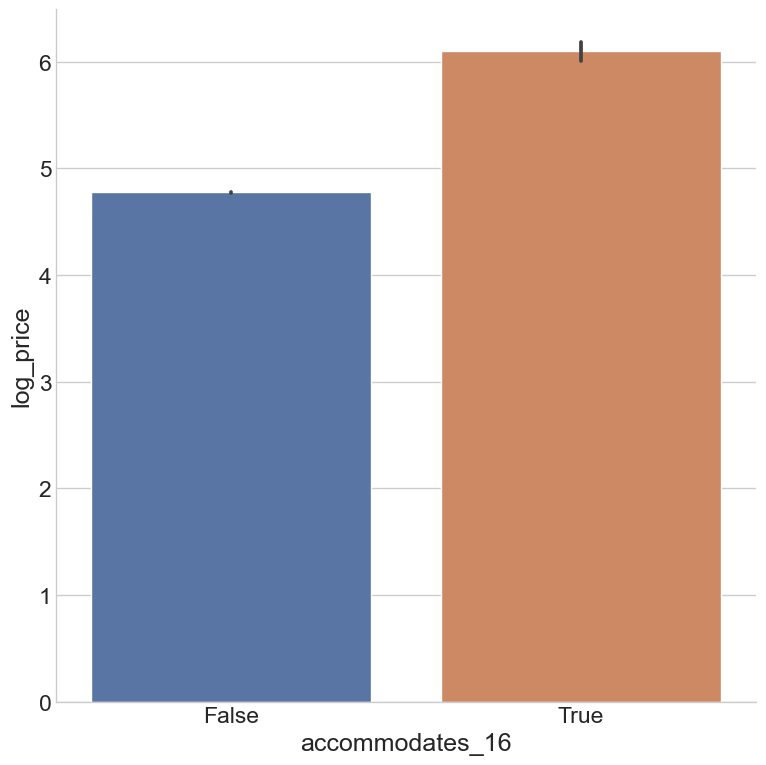

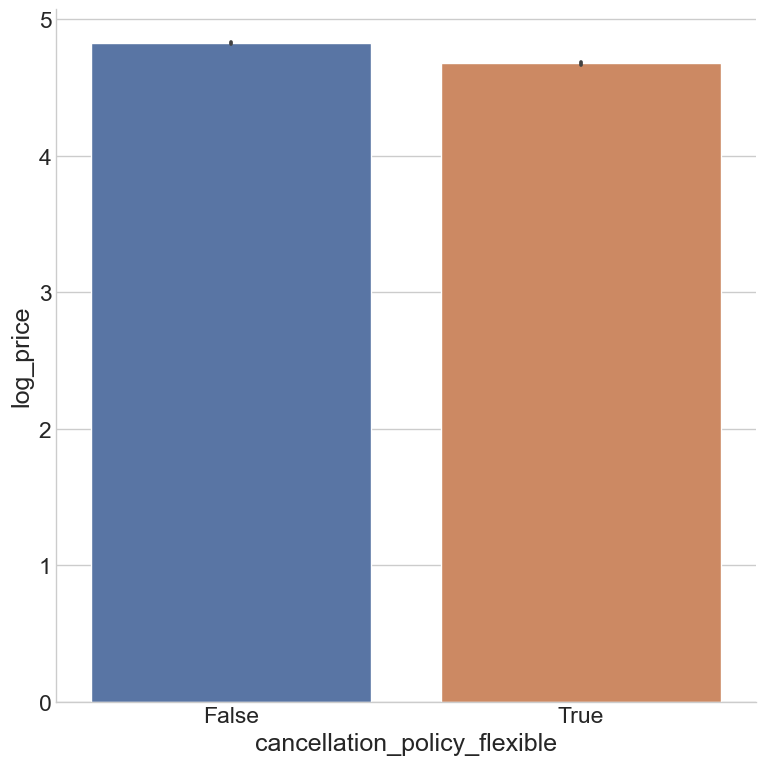

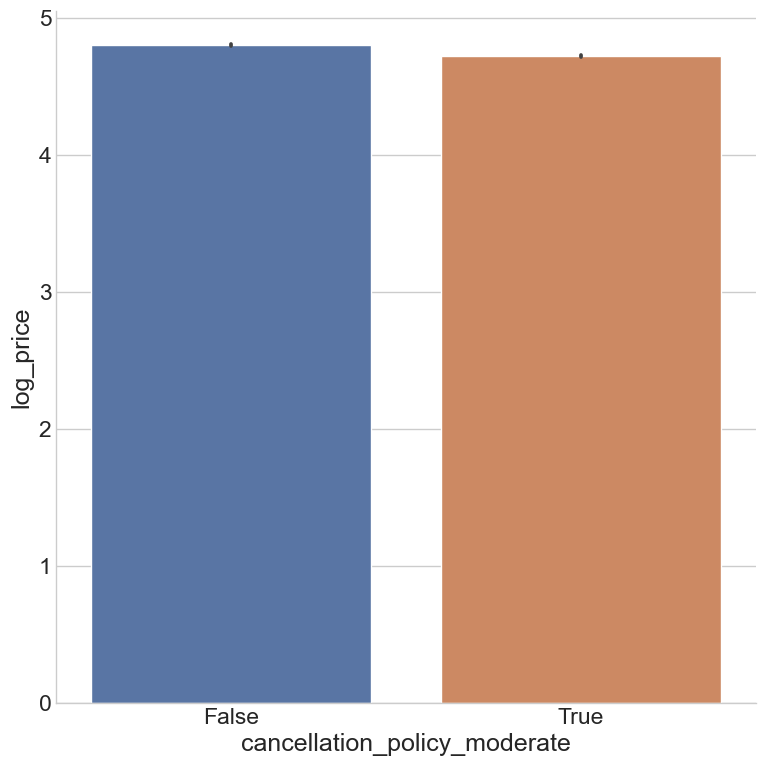

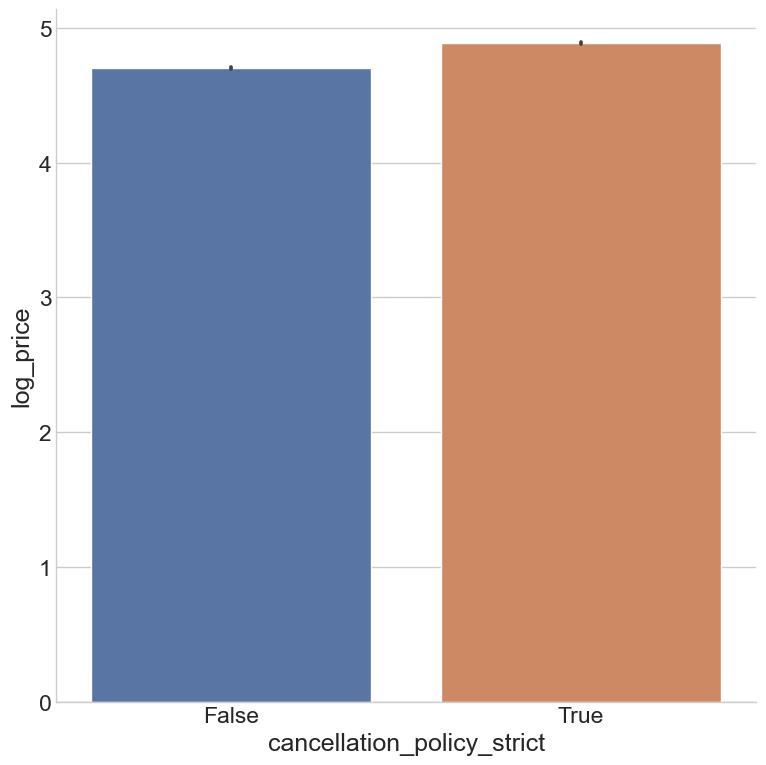

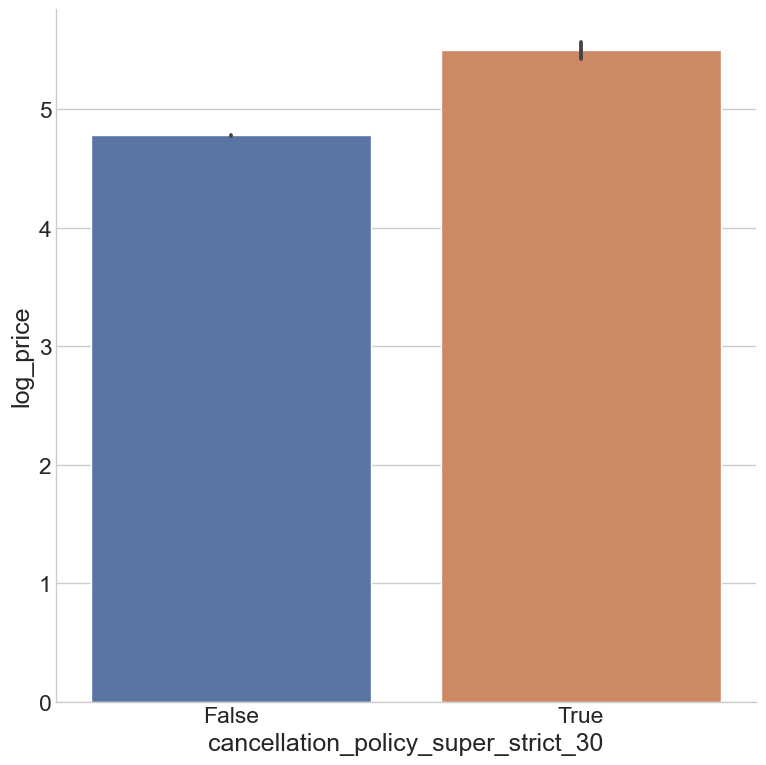

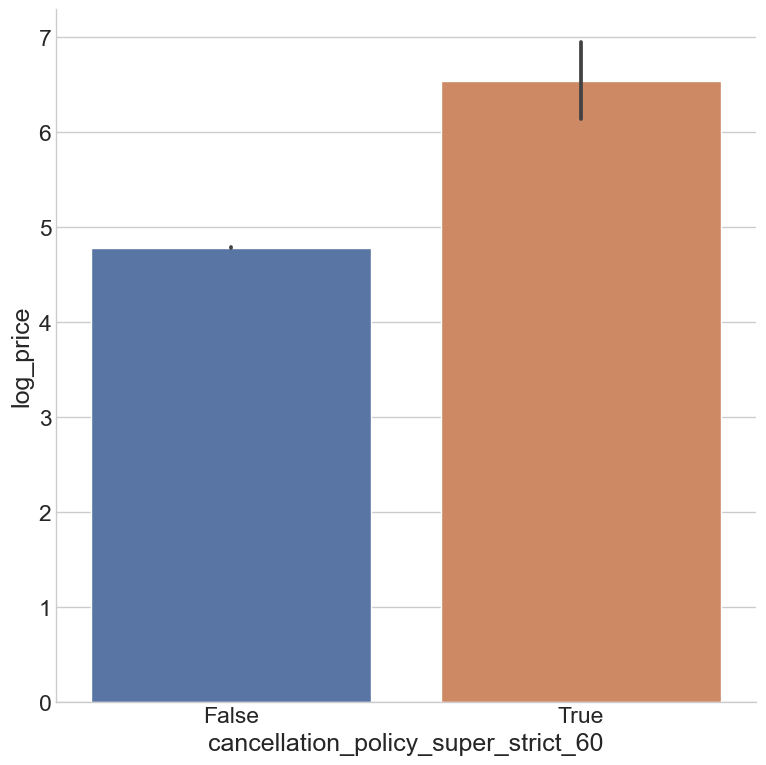

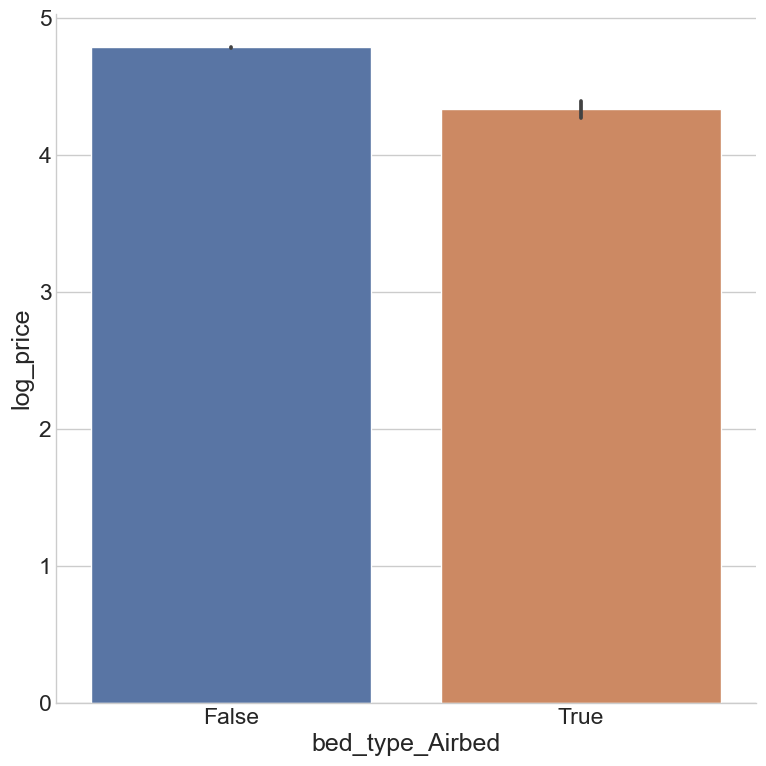

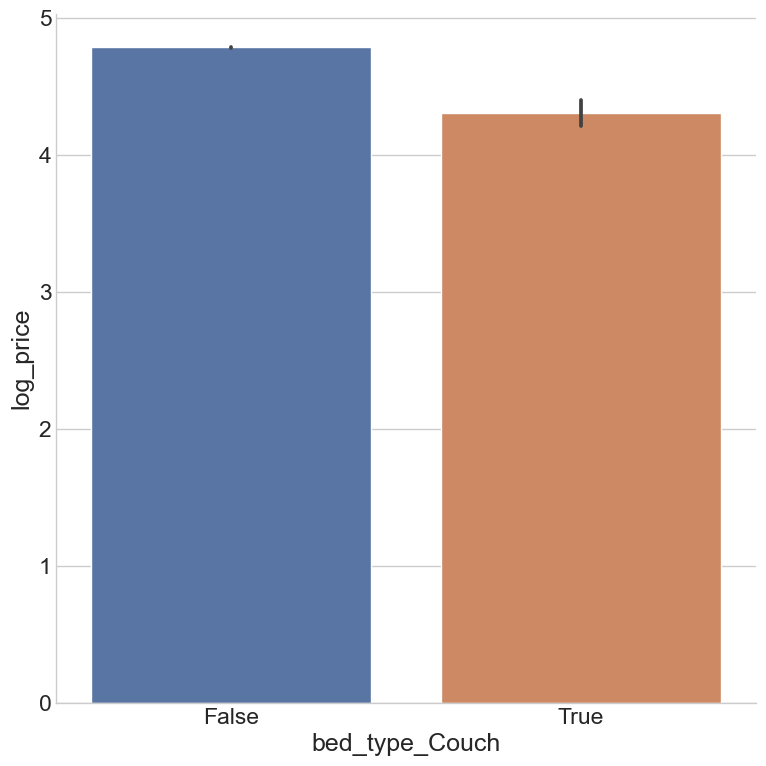

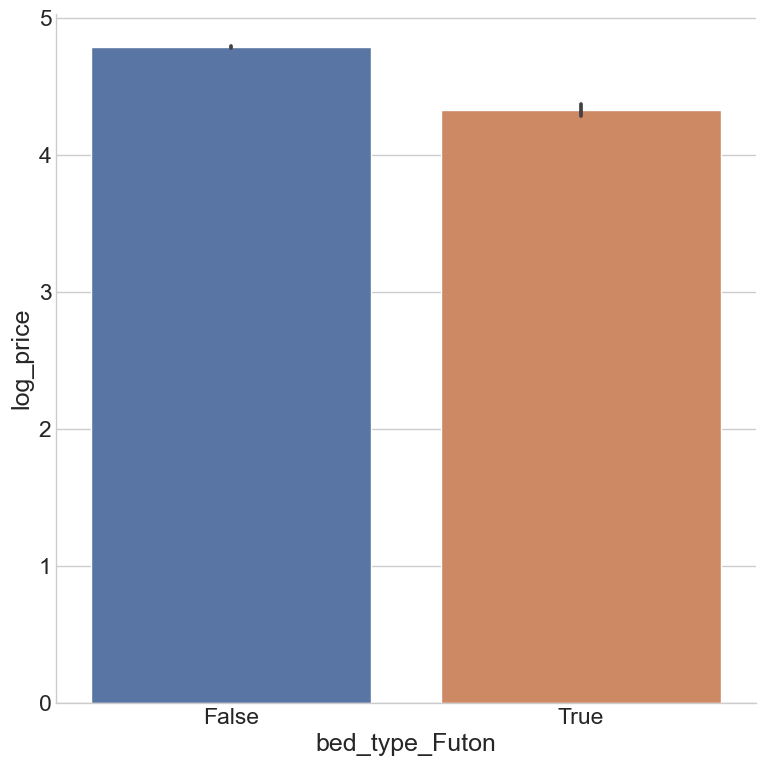

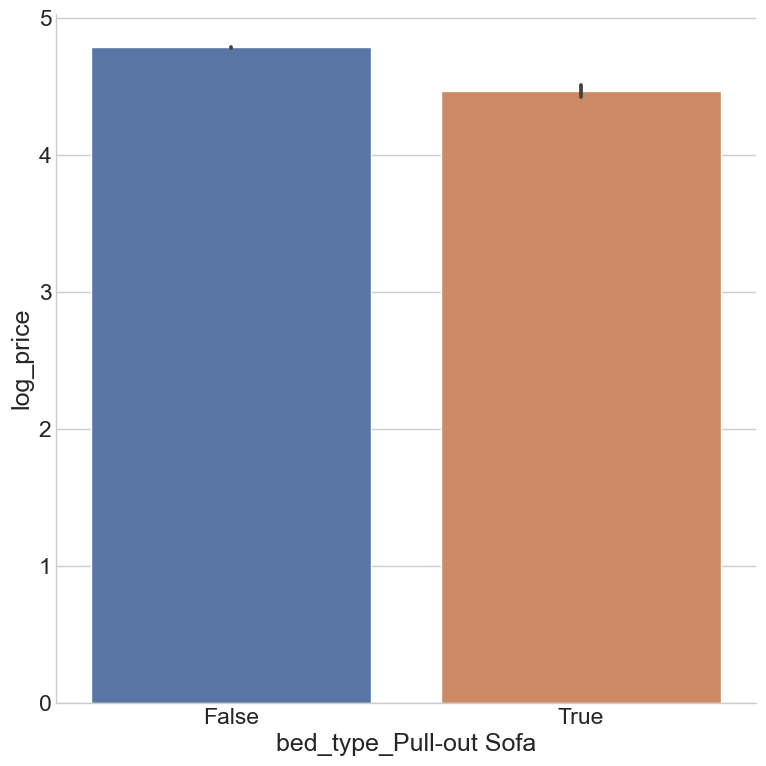

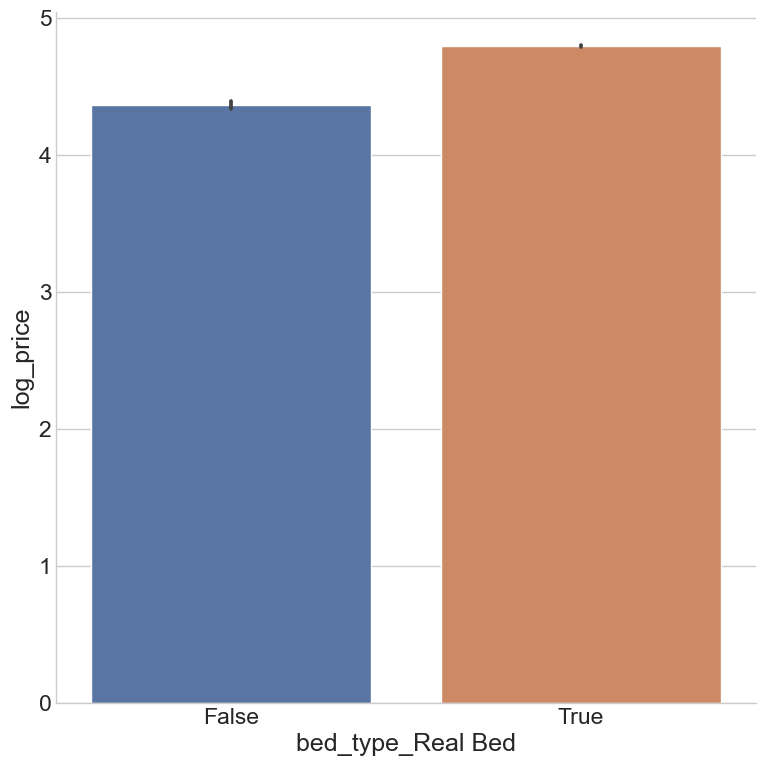

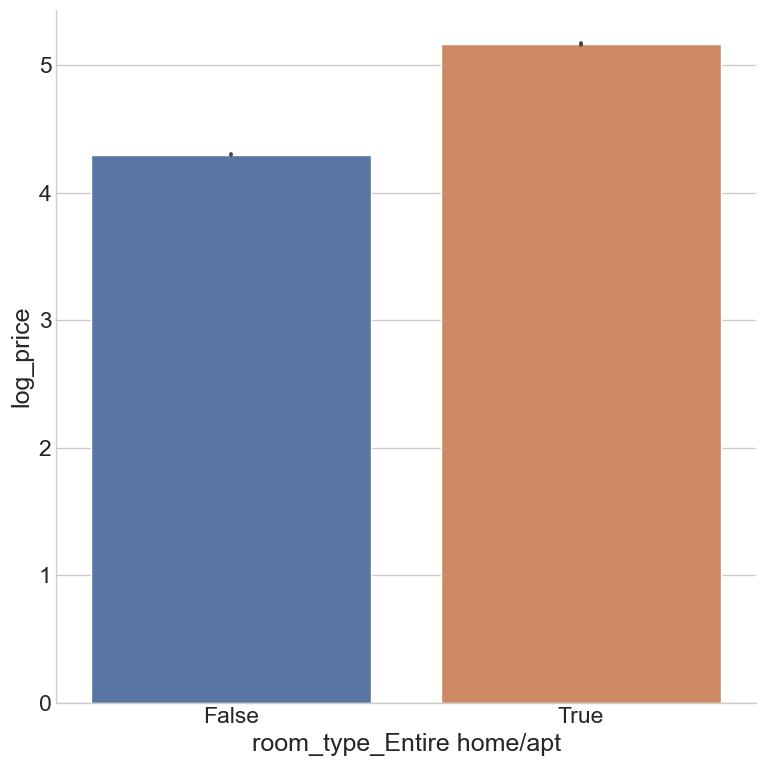

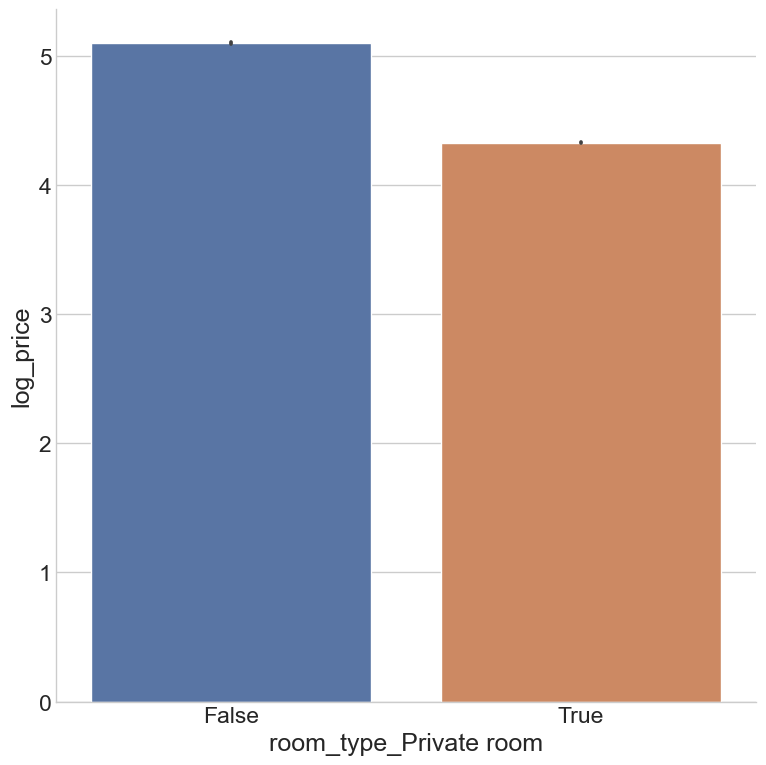

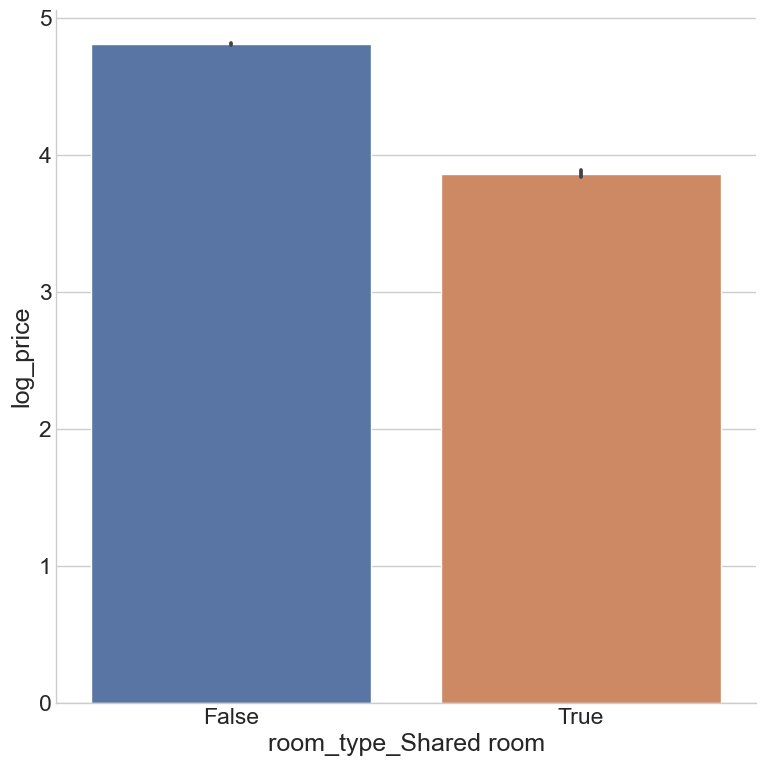

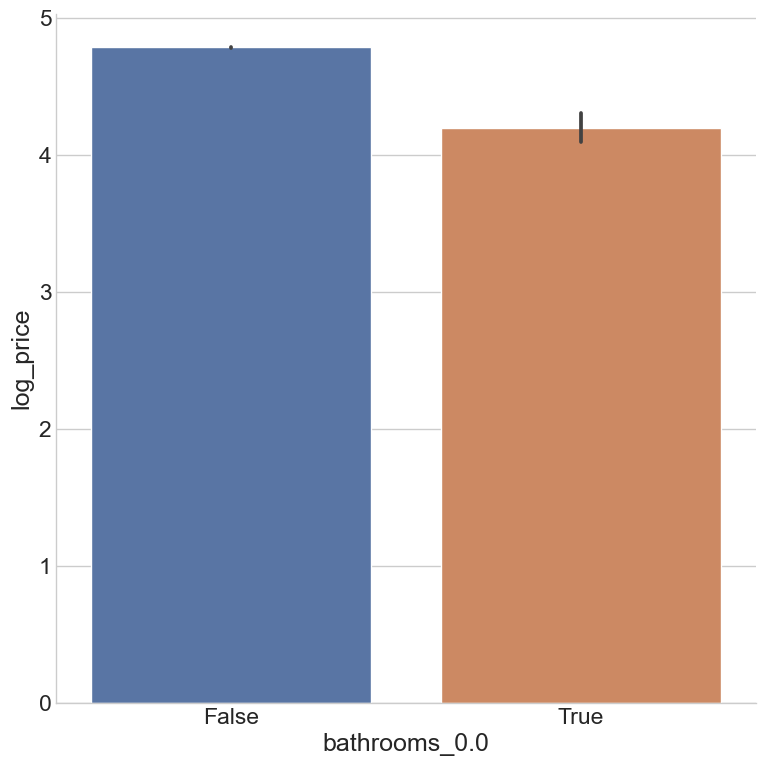

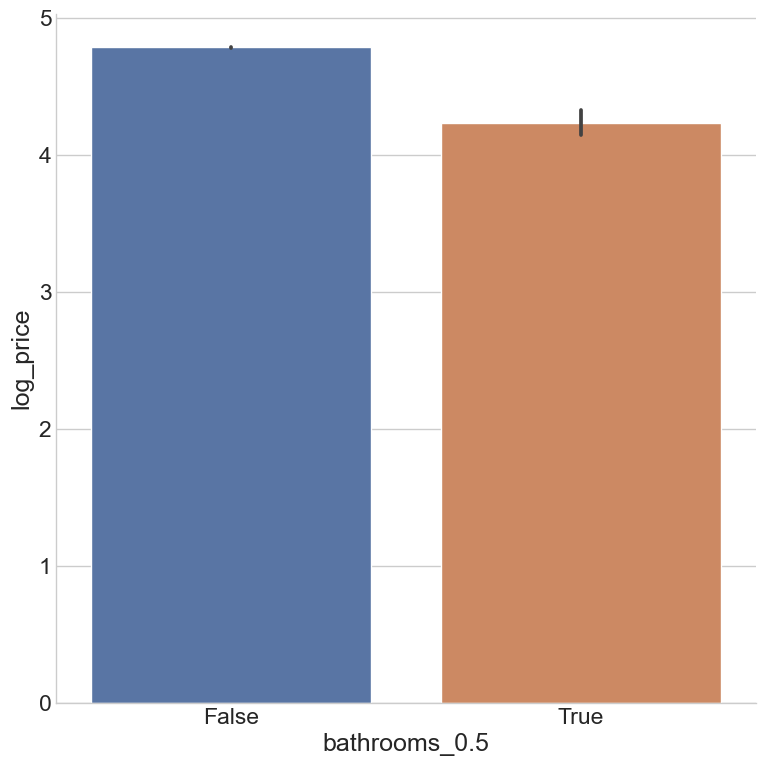

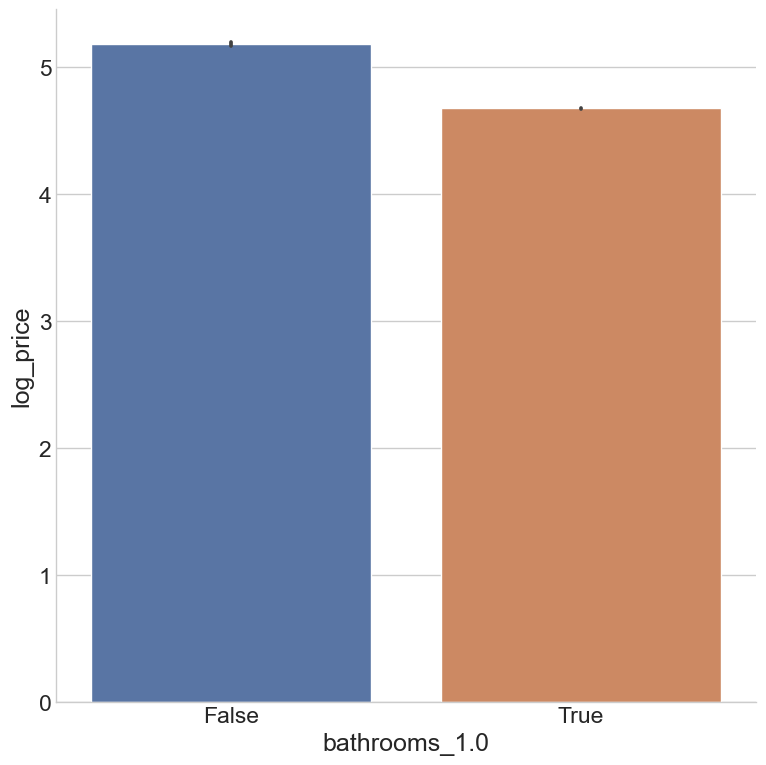

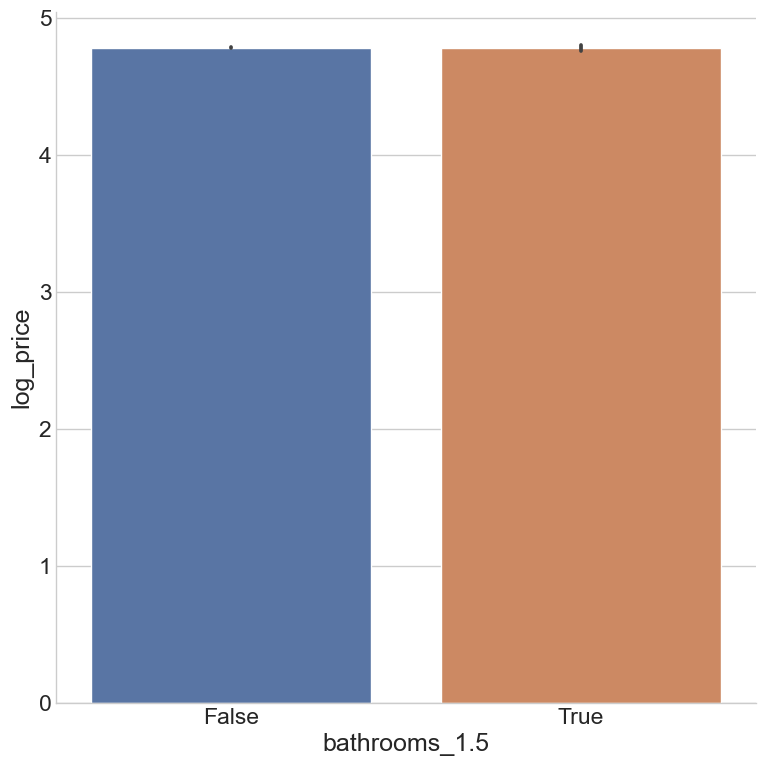

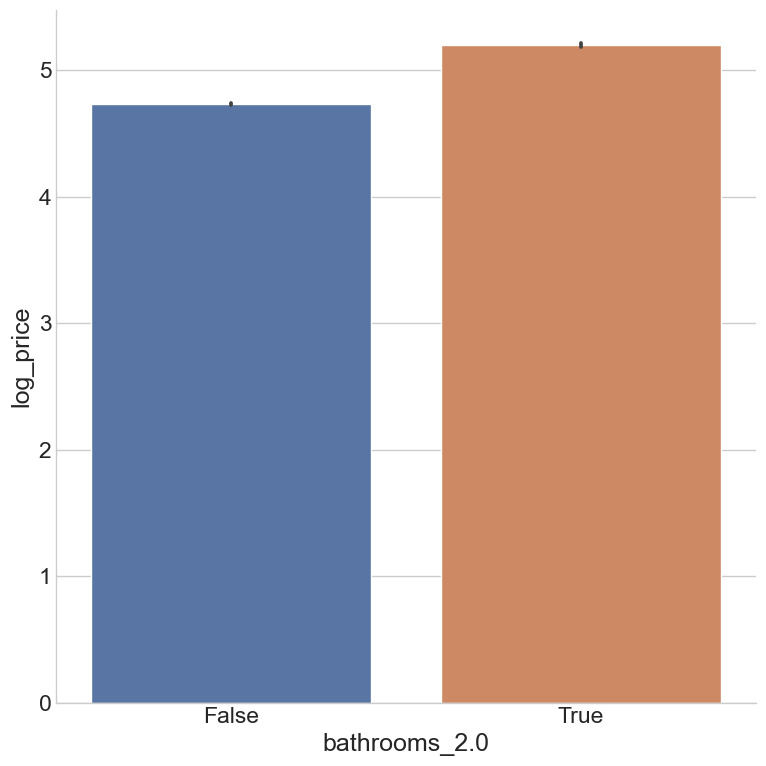

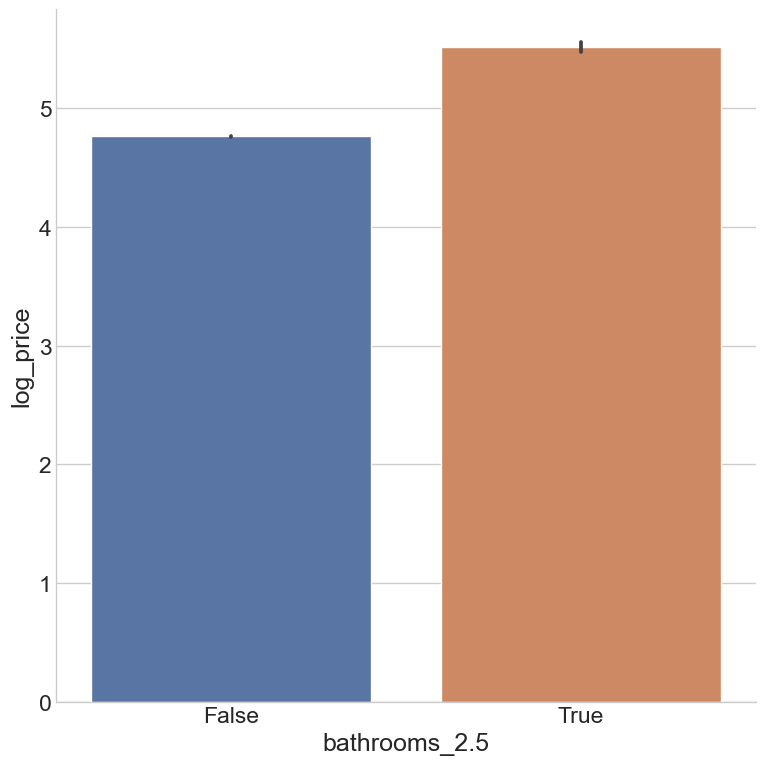

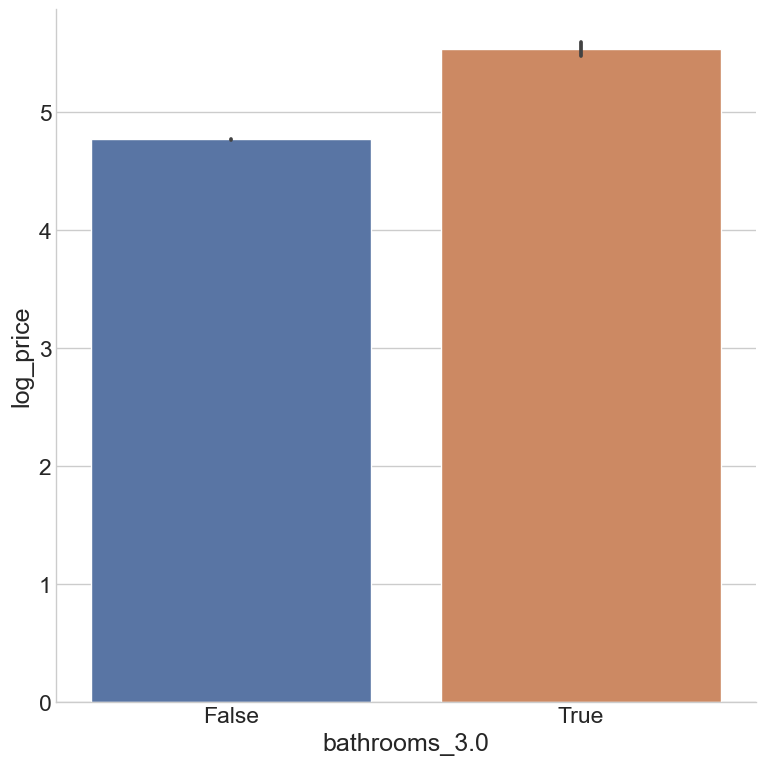

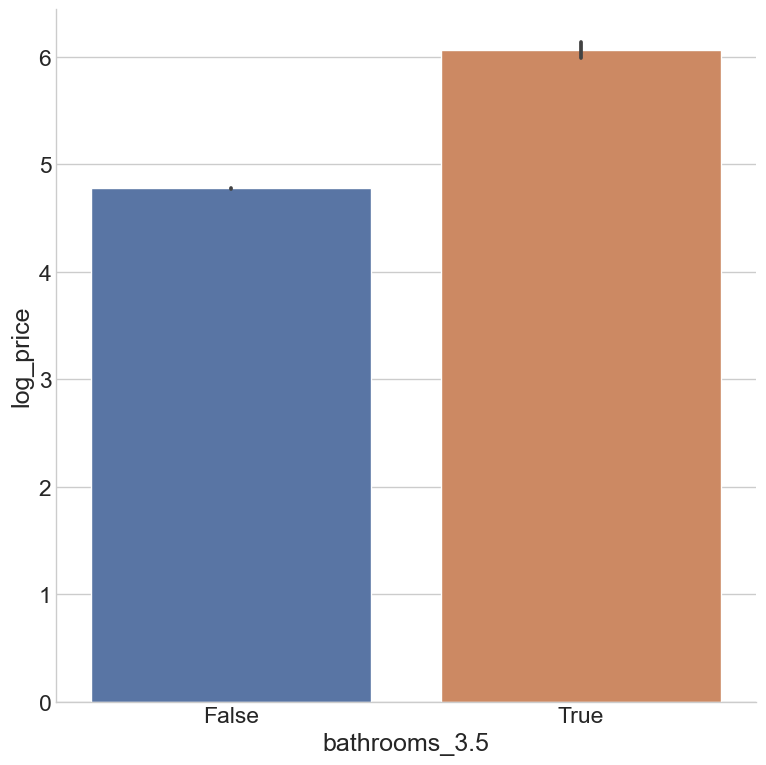

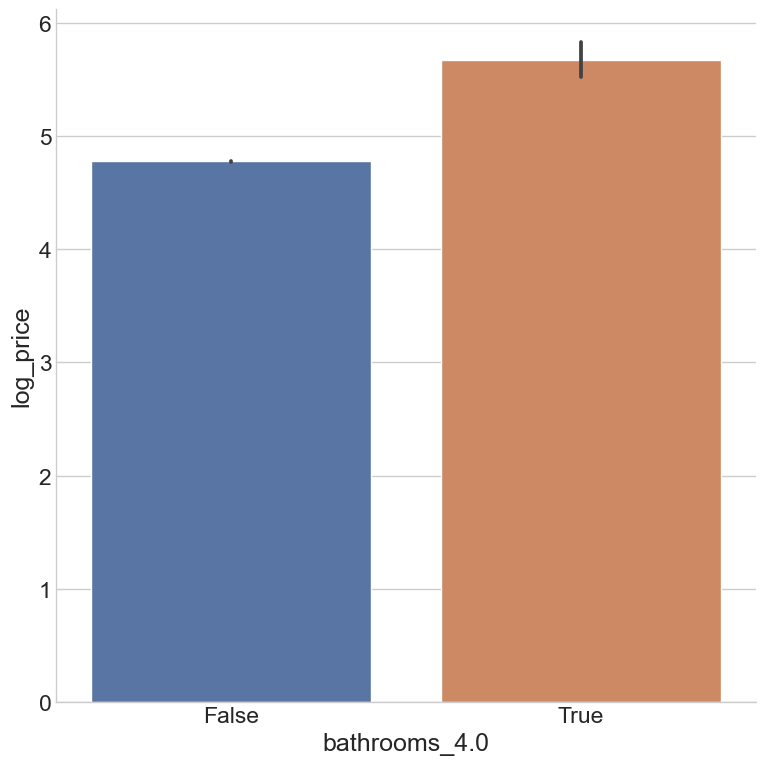

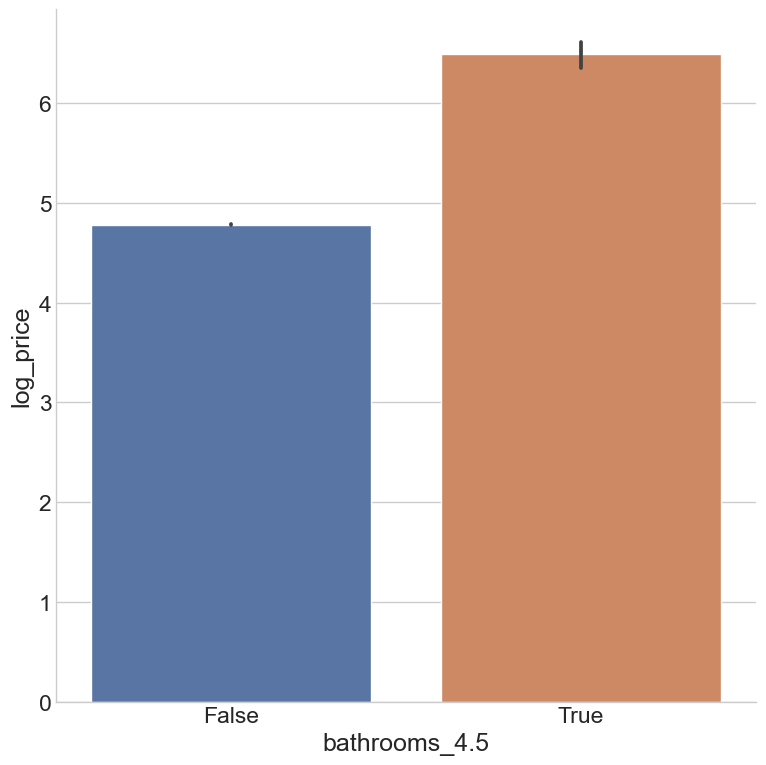

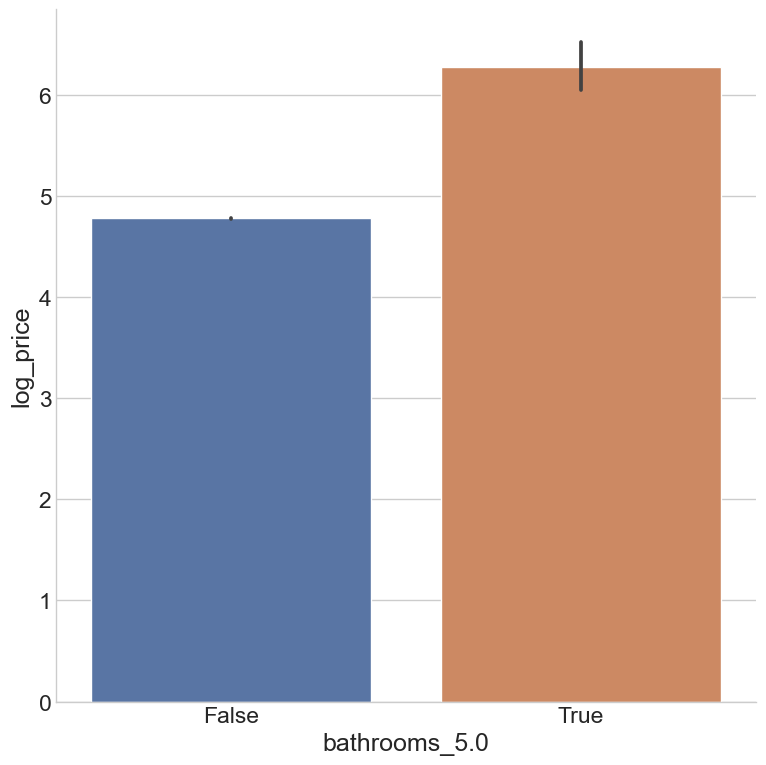

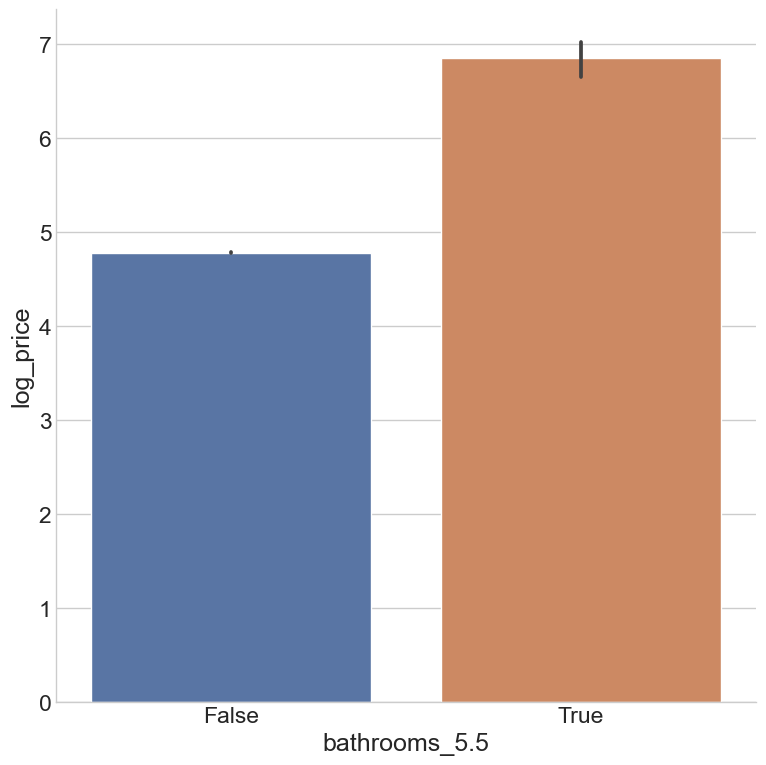

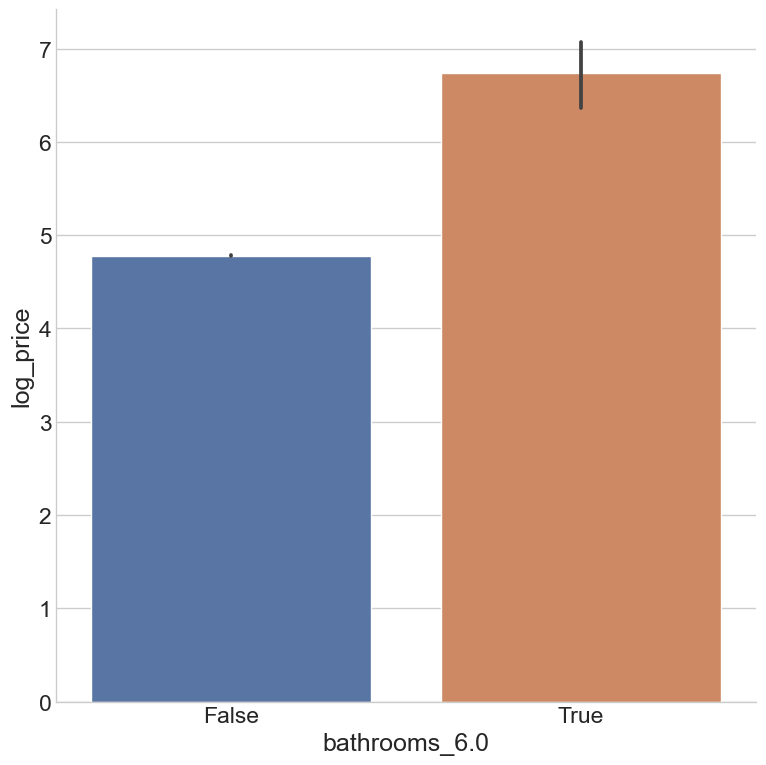

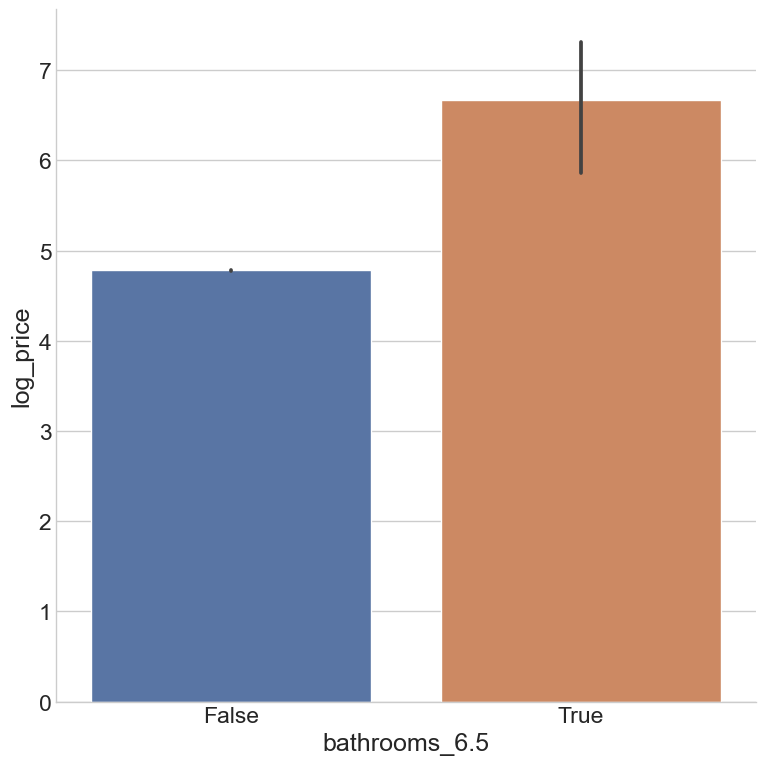

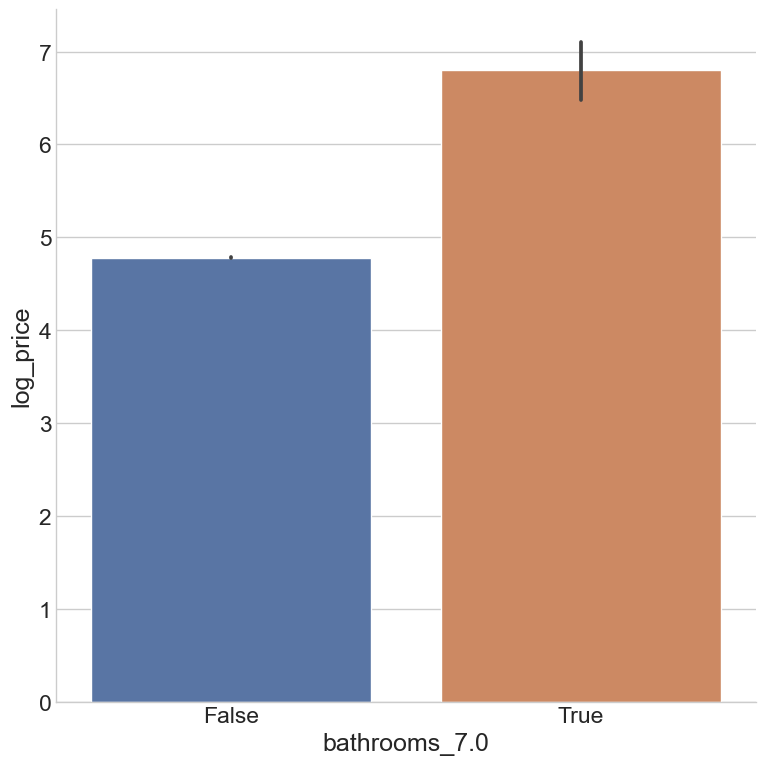

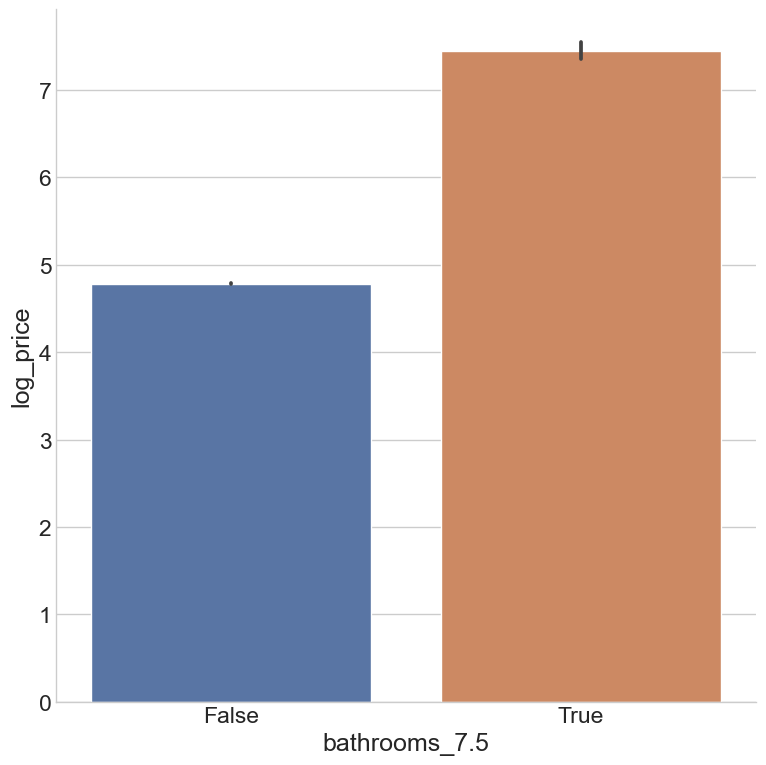

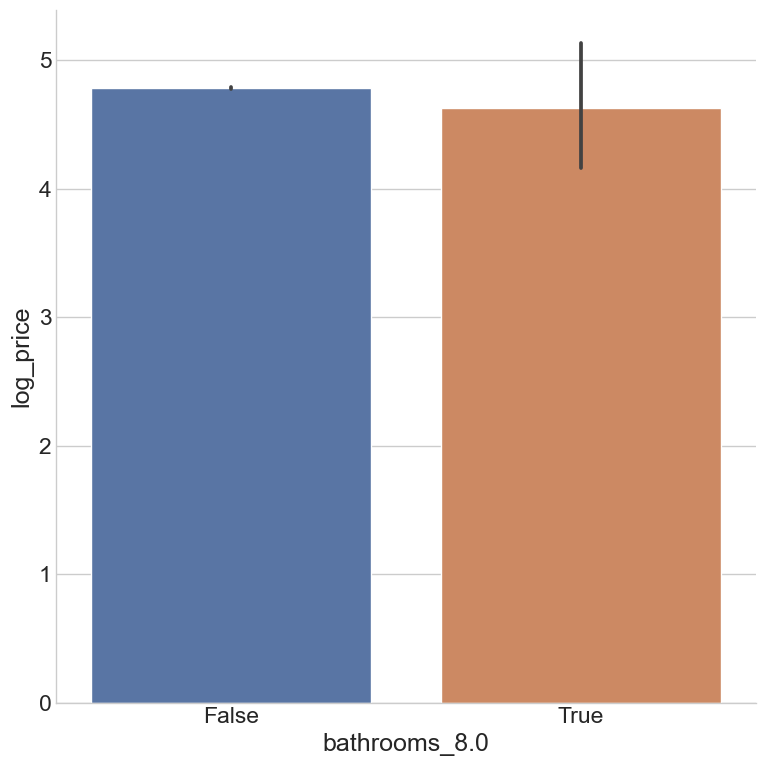

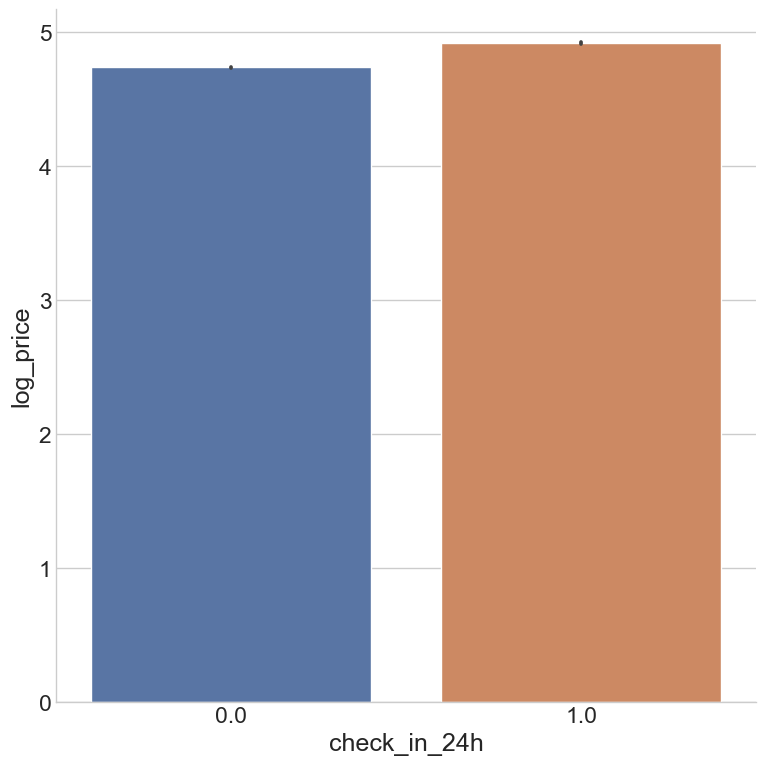

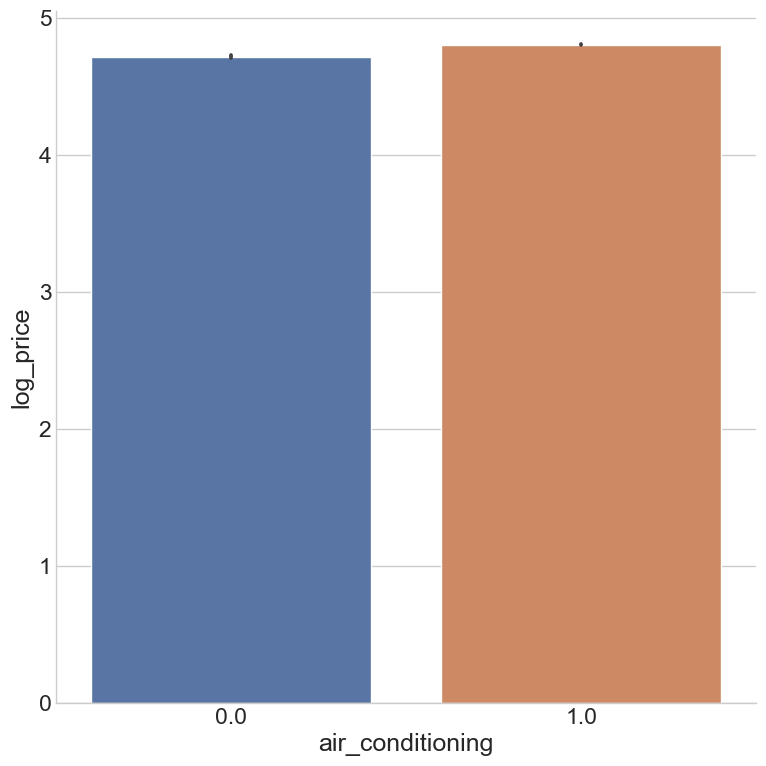

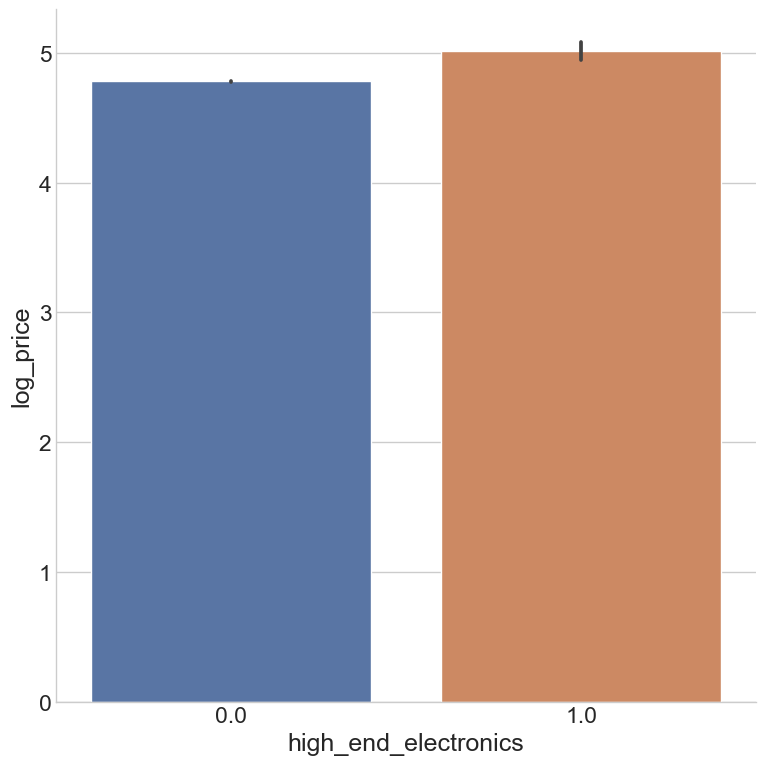

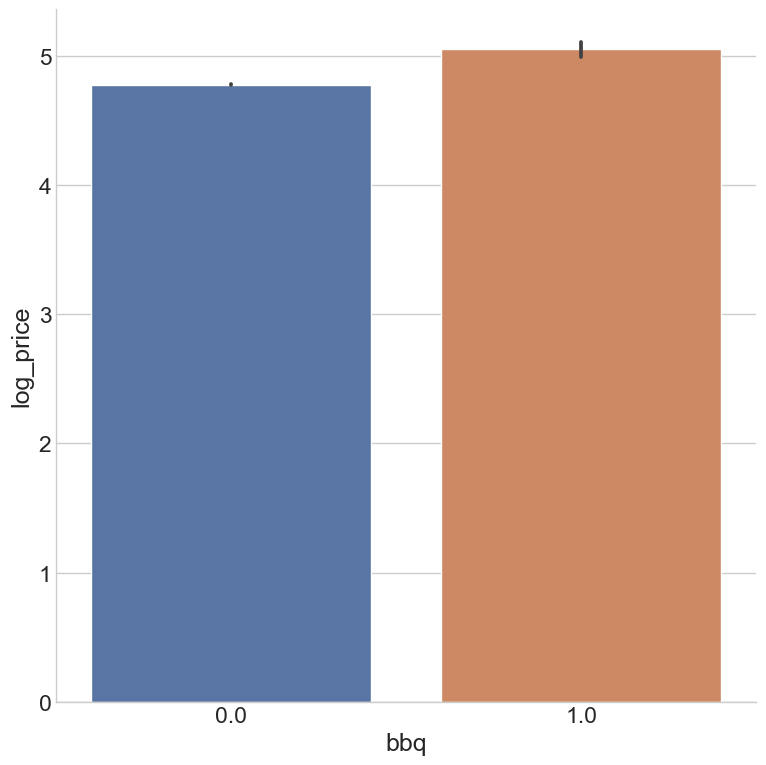

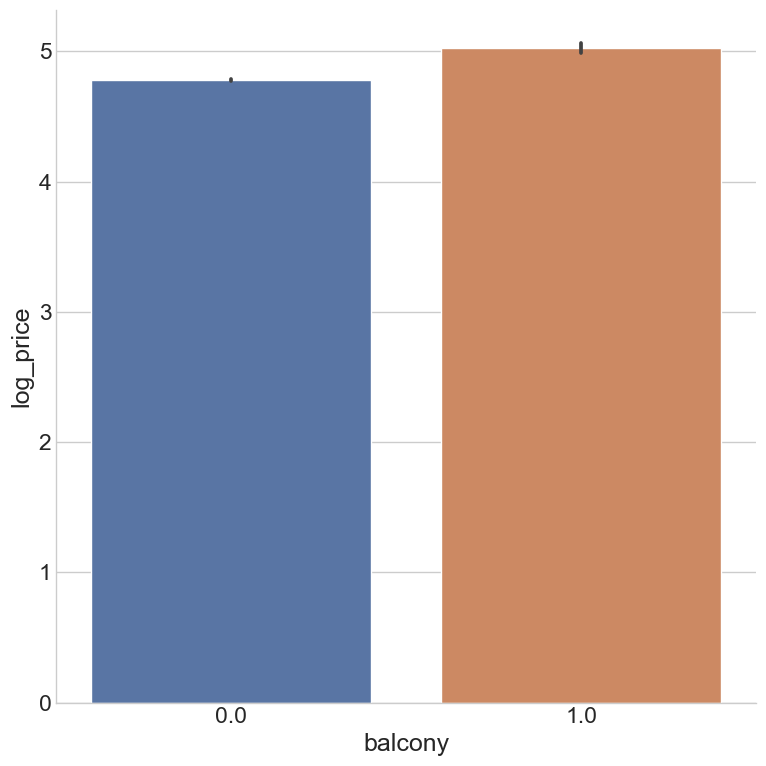

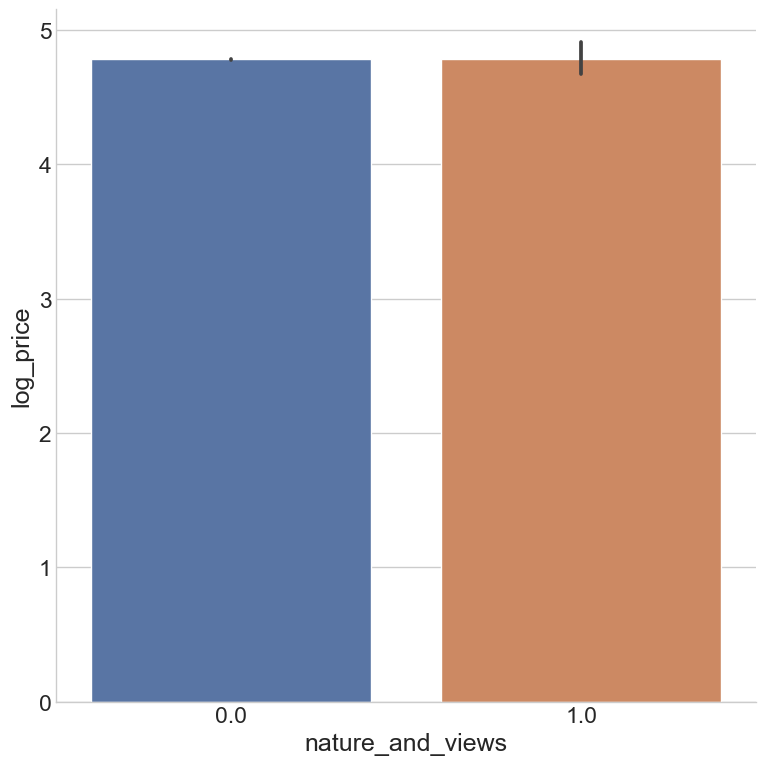

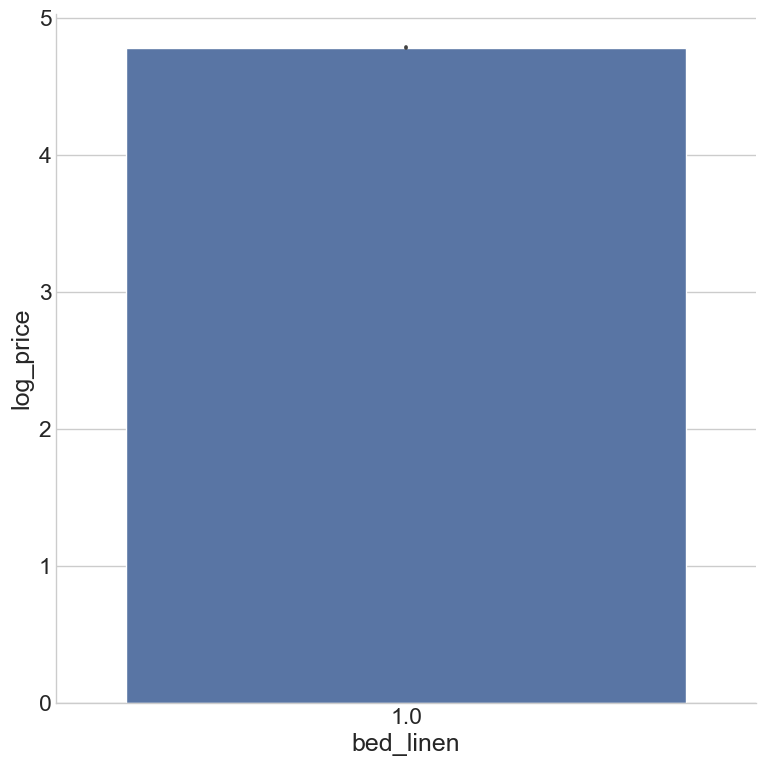

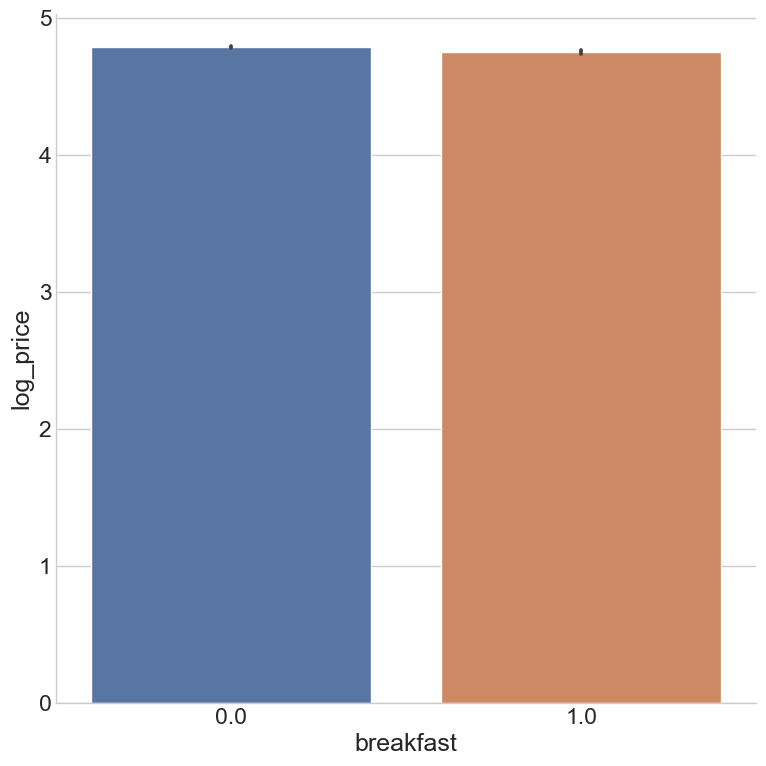

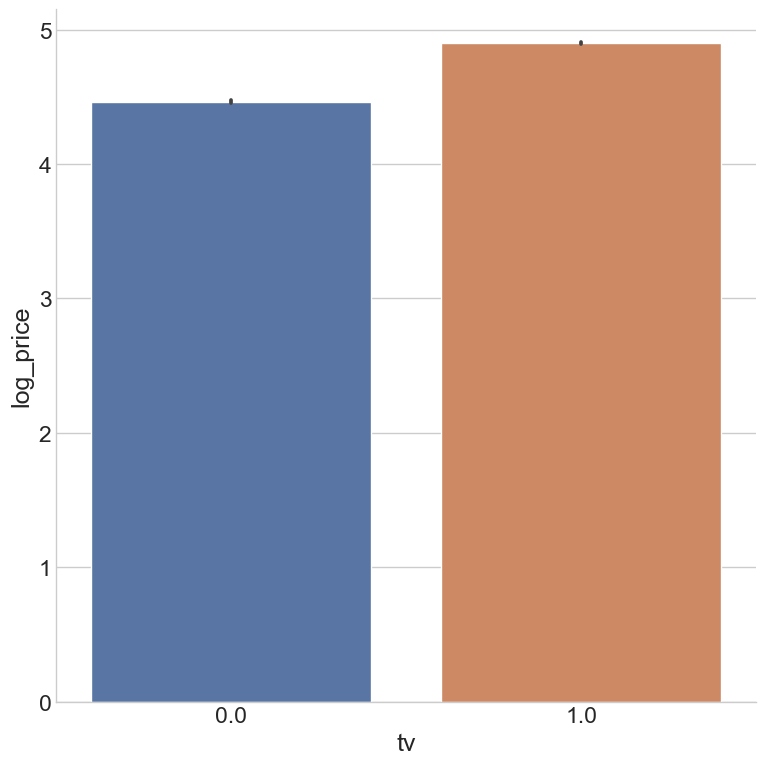

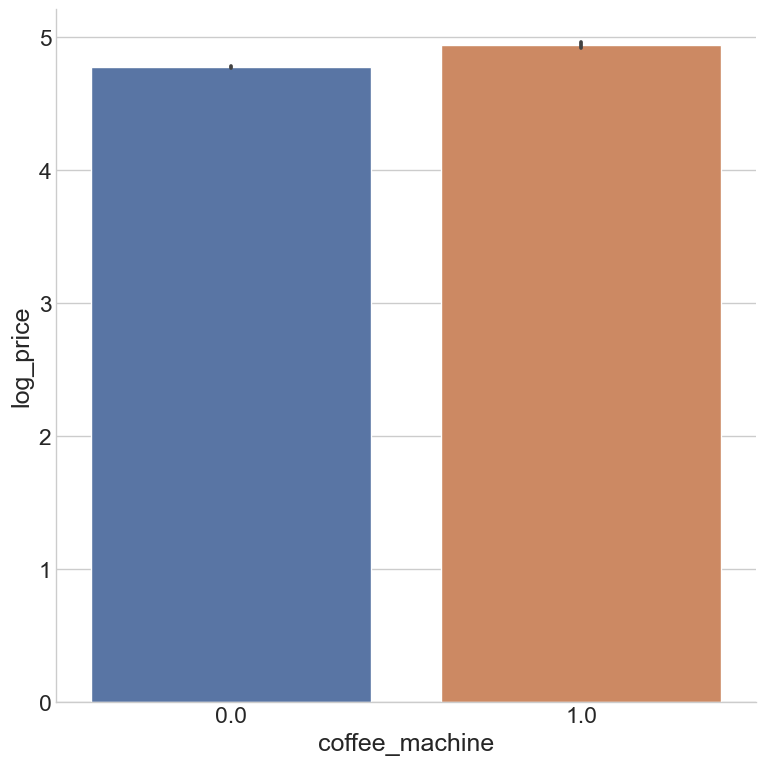

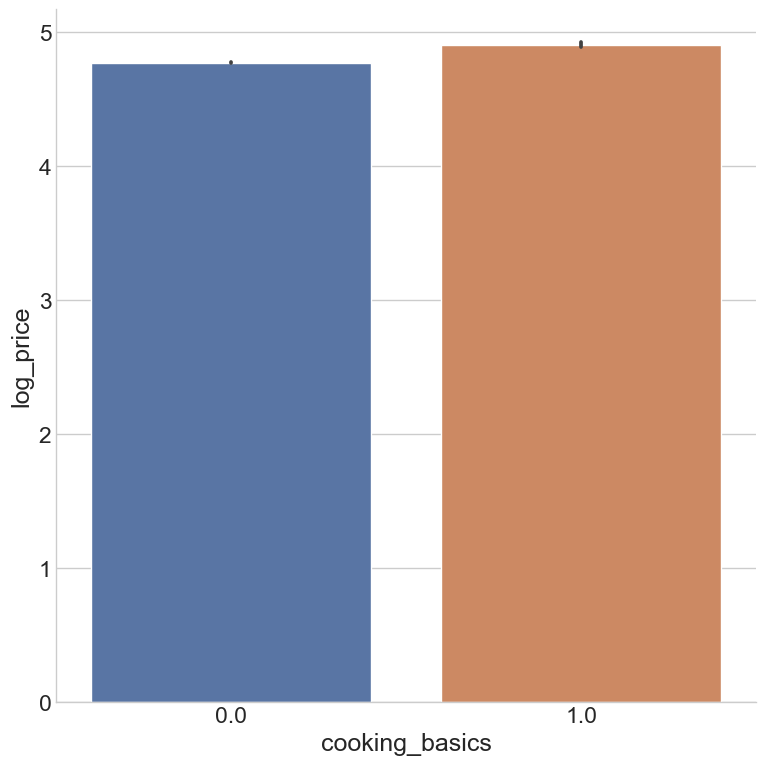

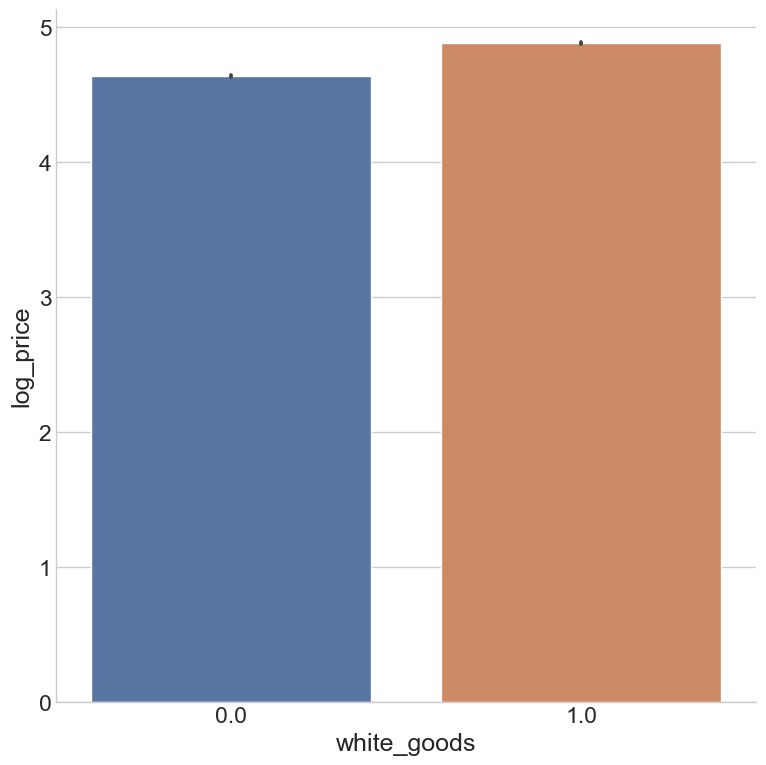

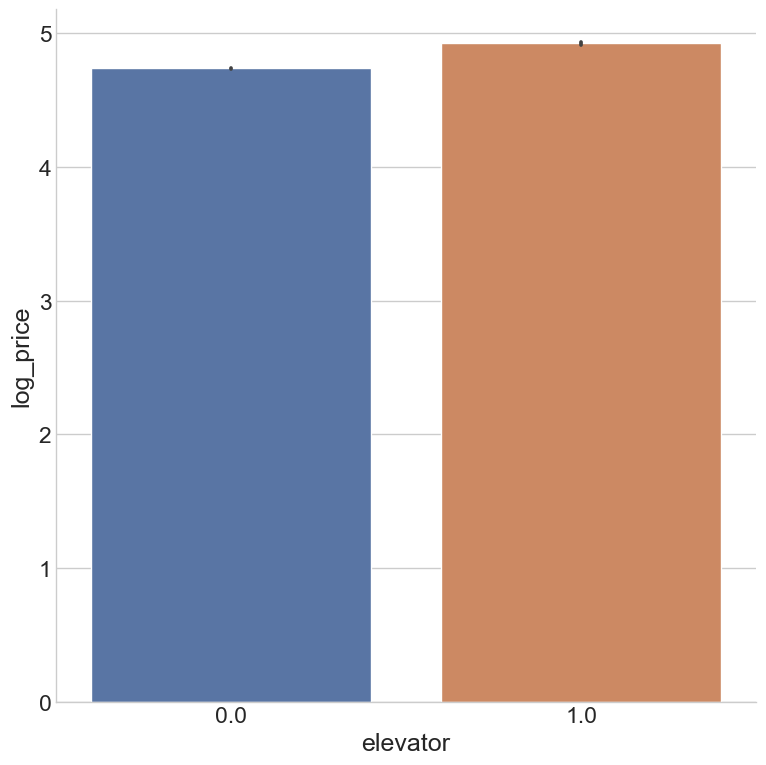

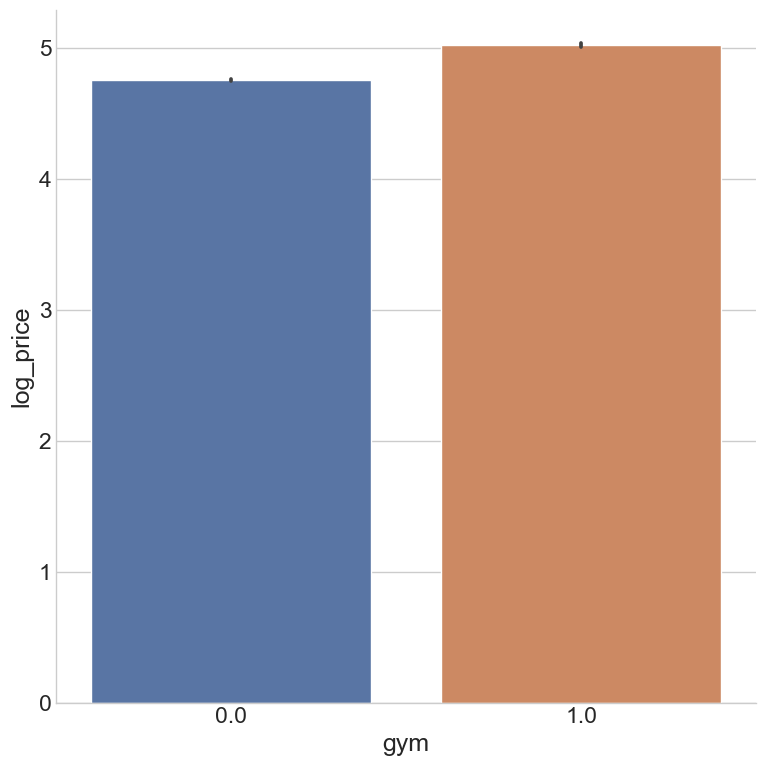

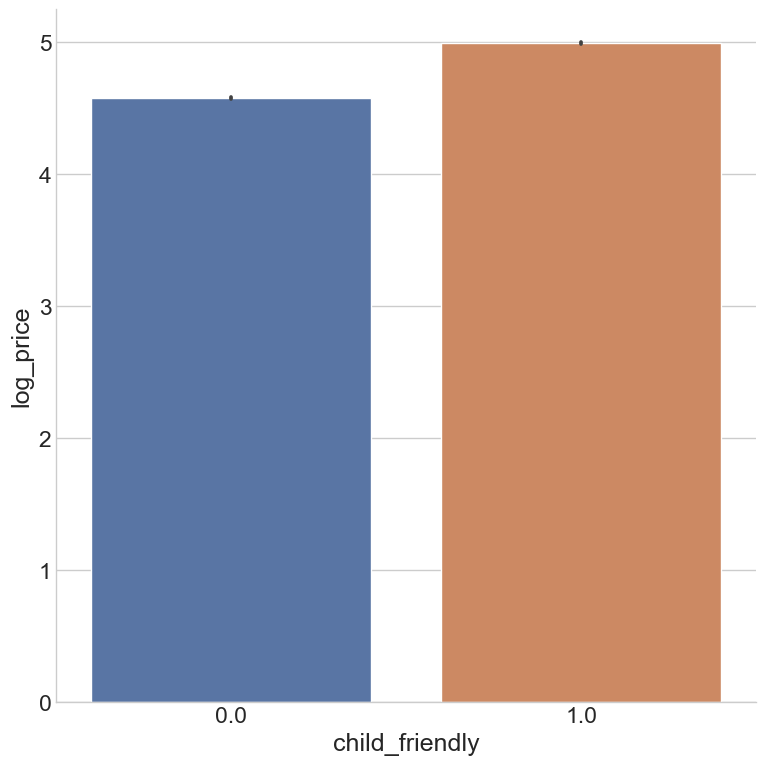

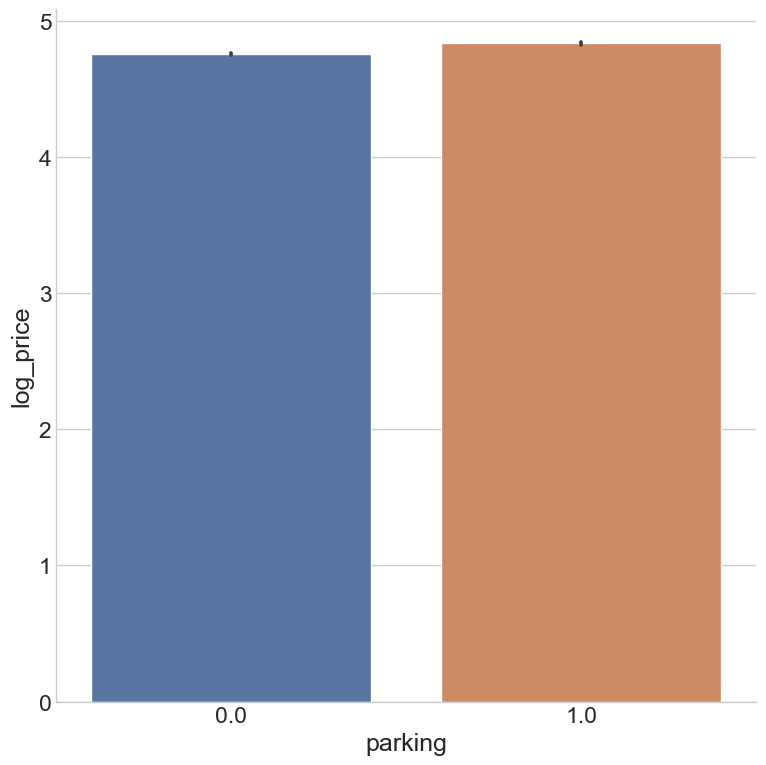

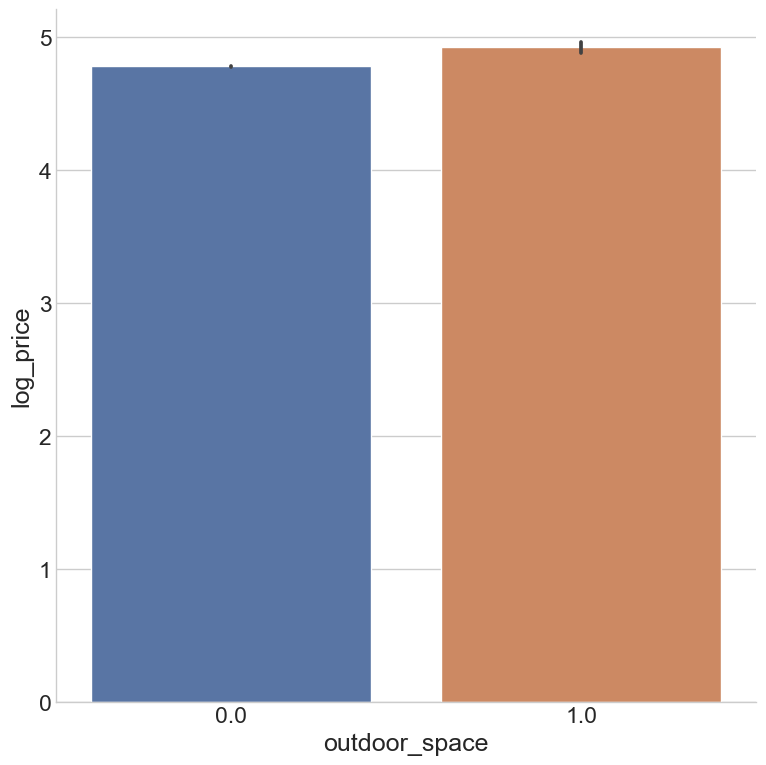

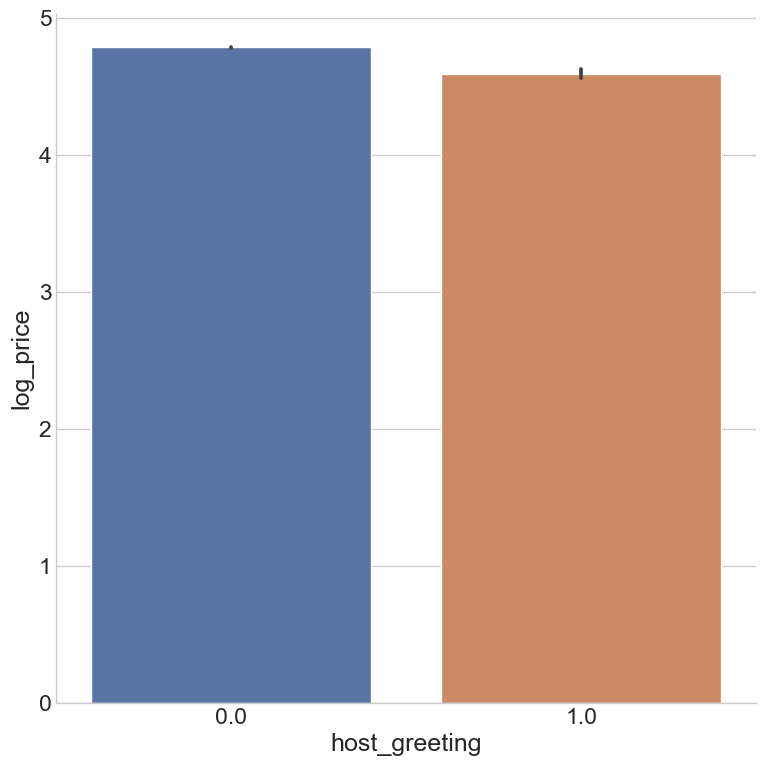

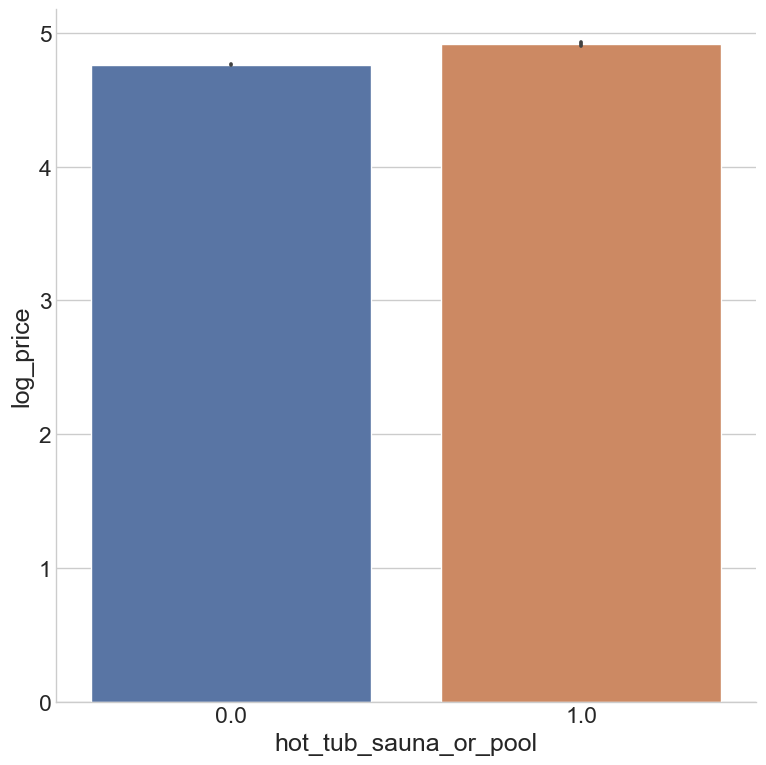

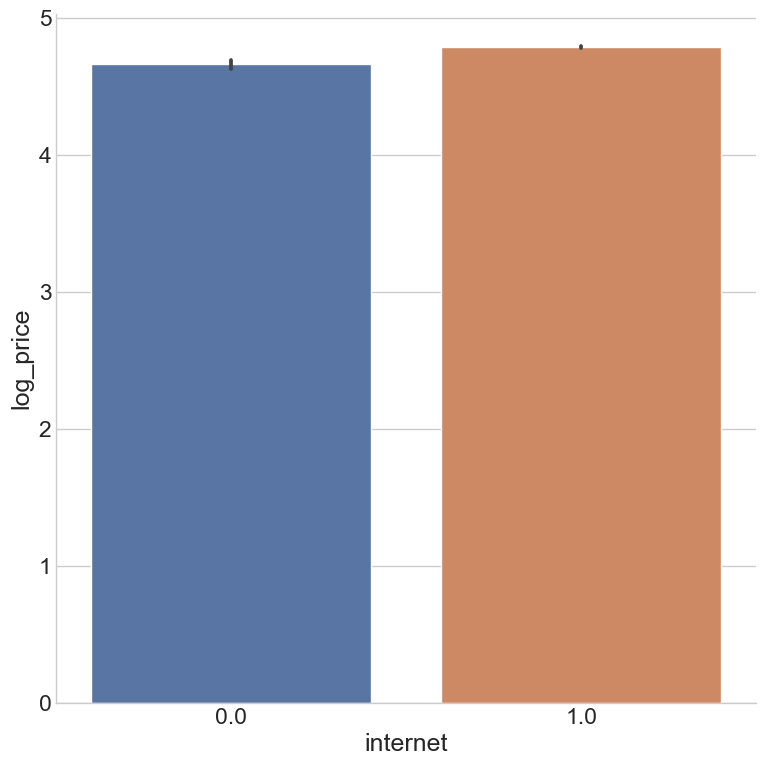

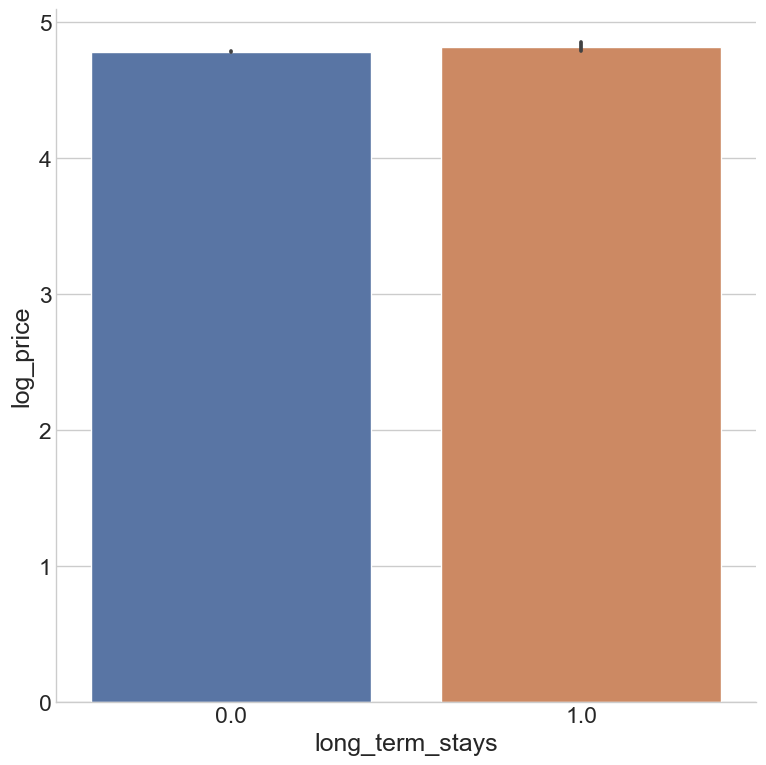

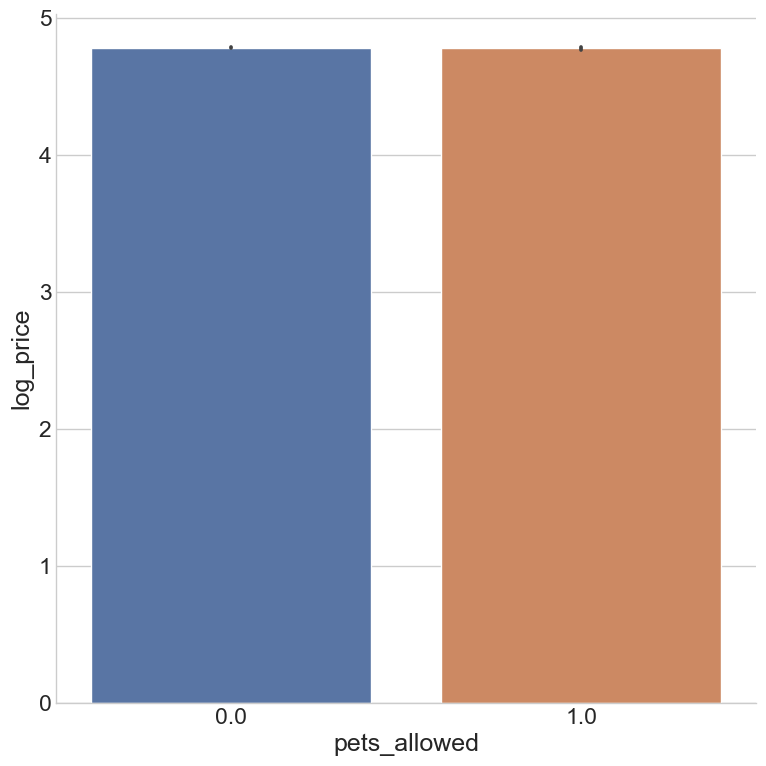

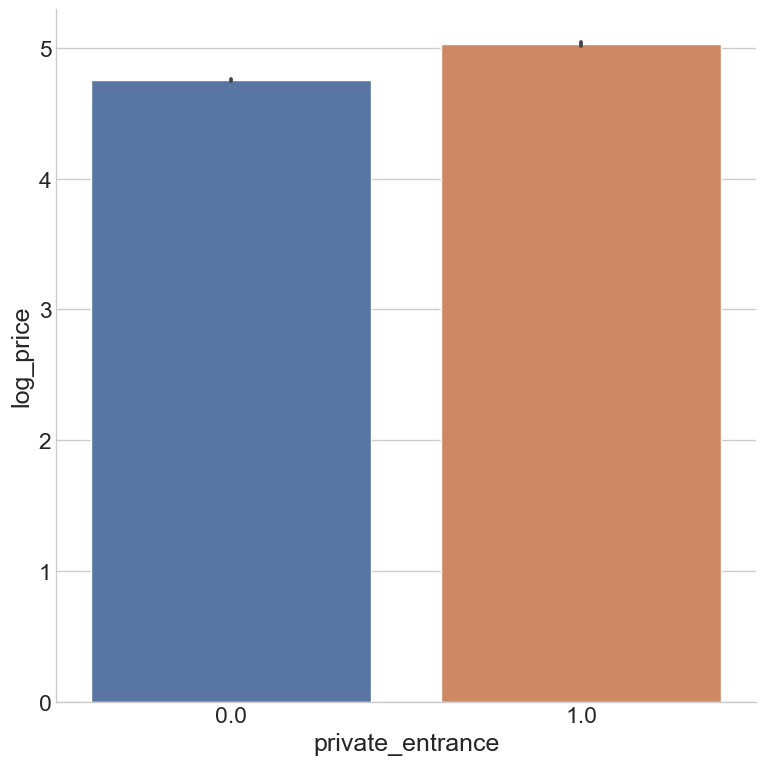

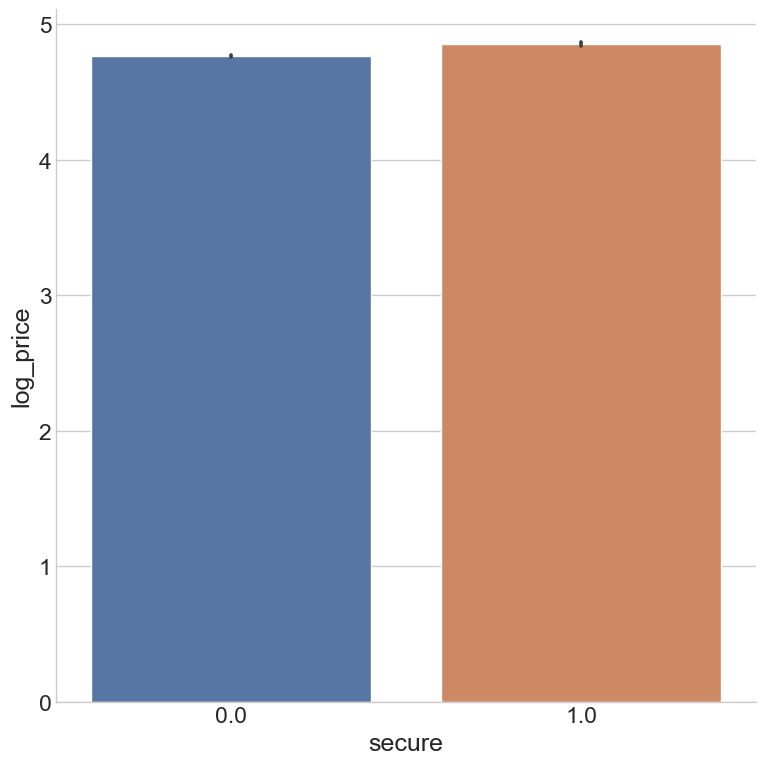

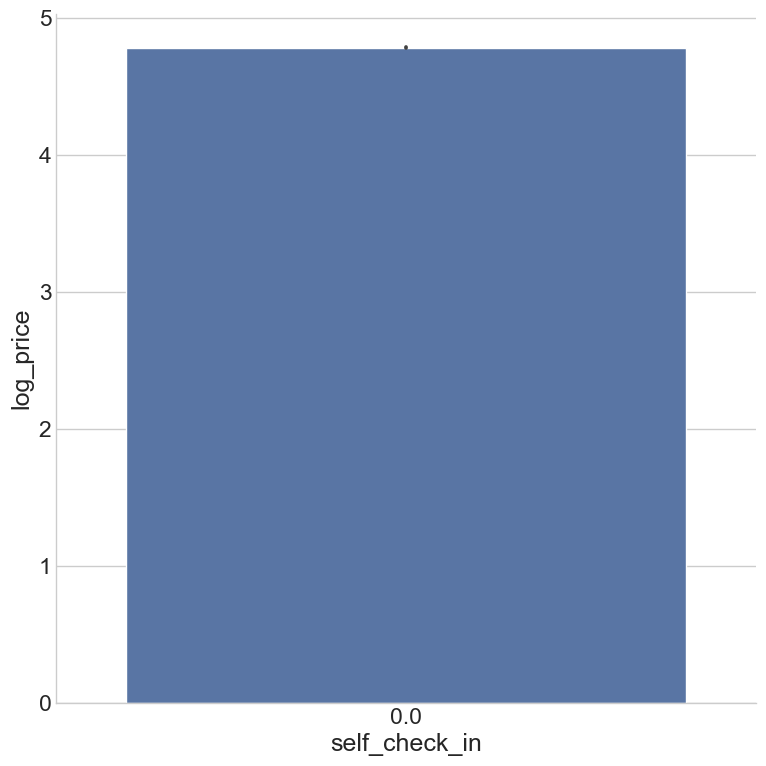

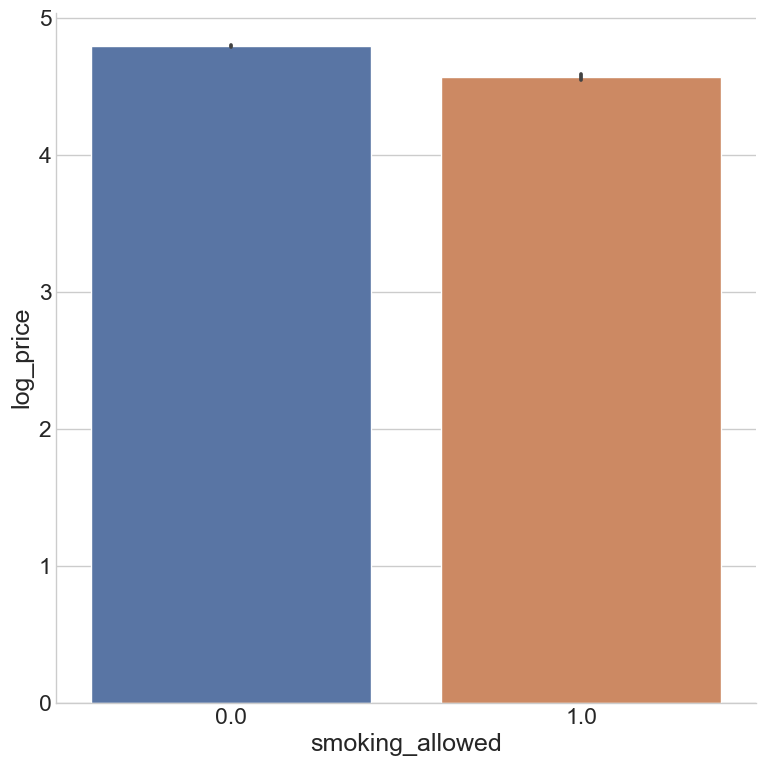

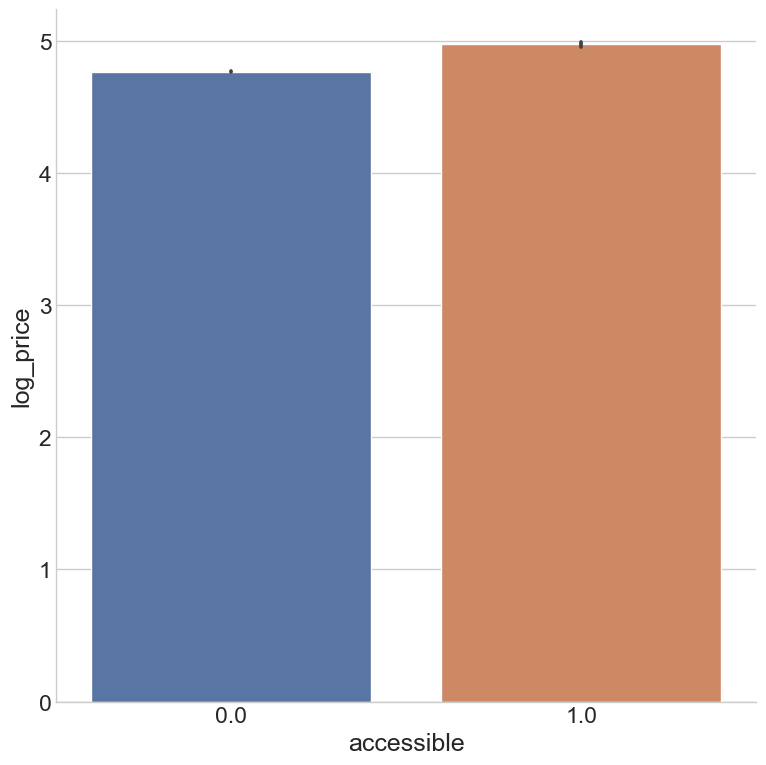

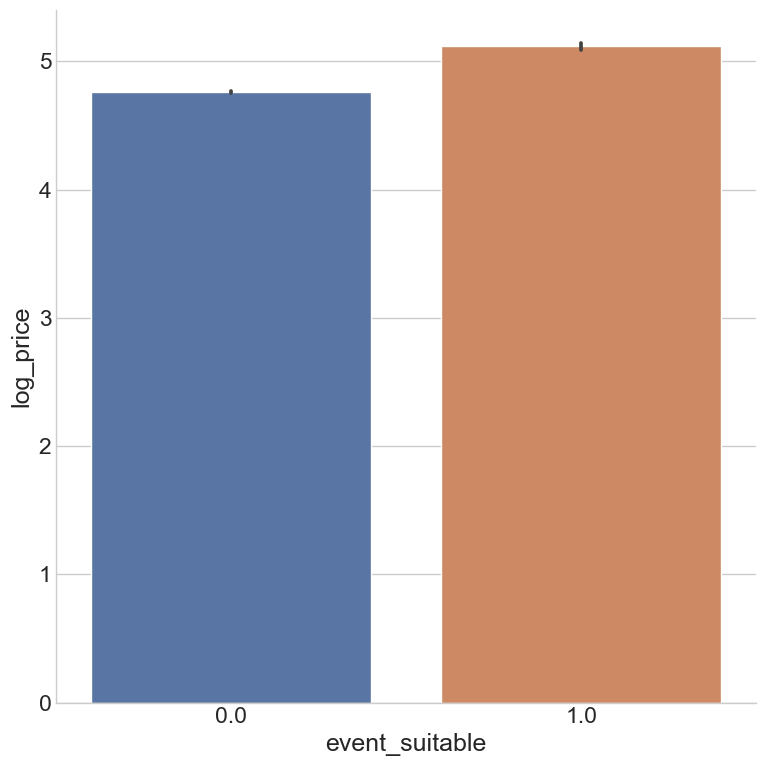

In [436]:
for col in df.iloc[:,29:].columns:
    catplot(col)

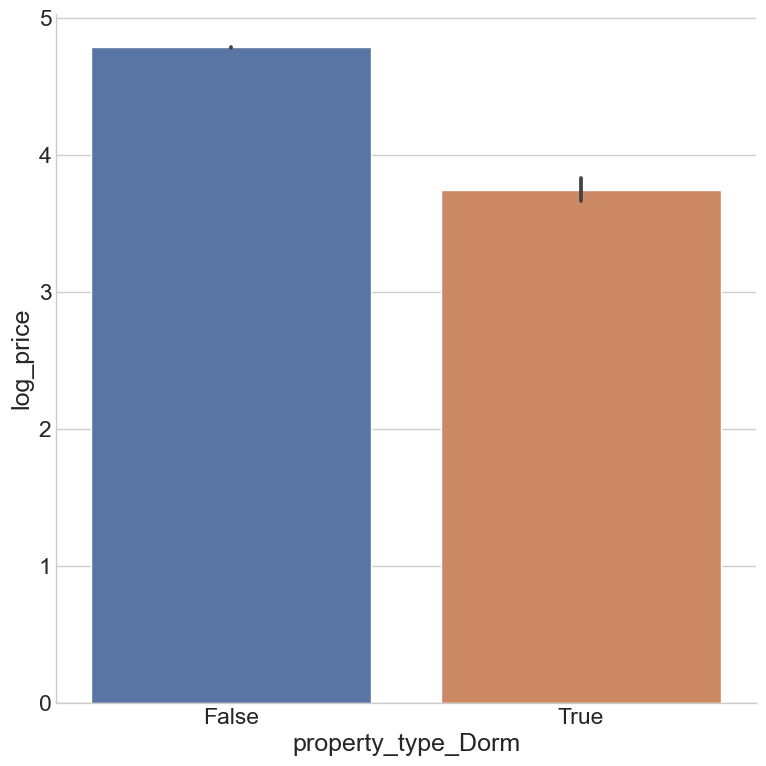

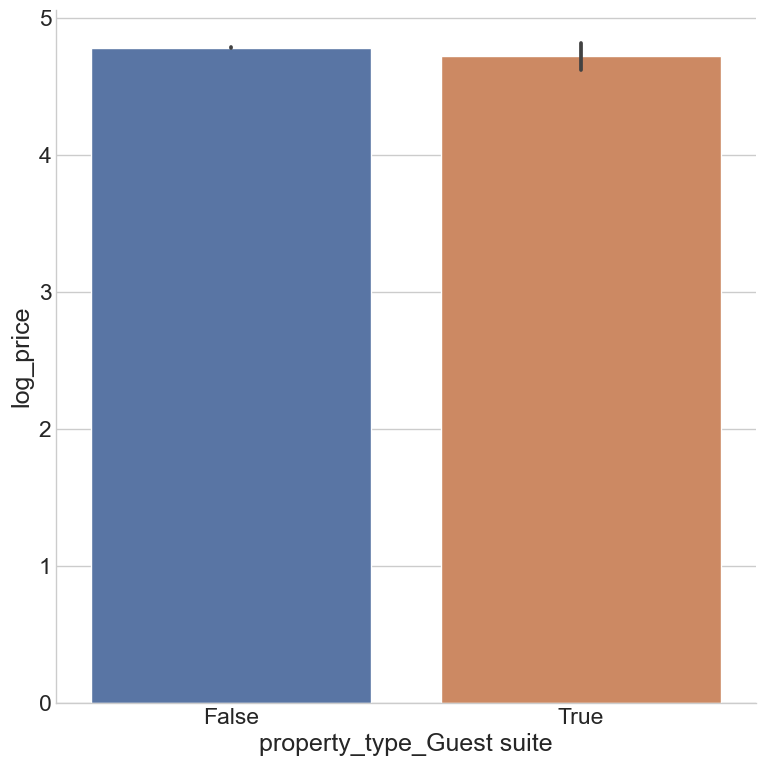

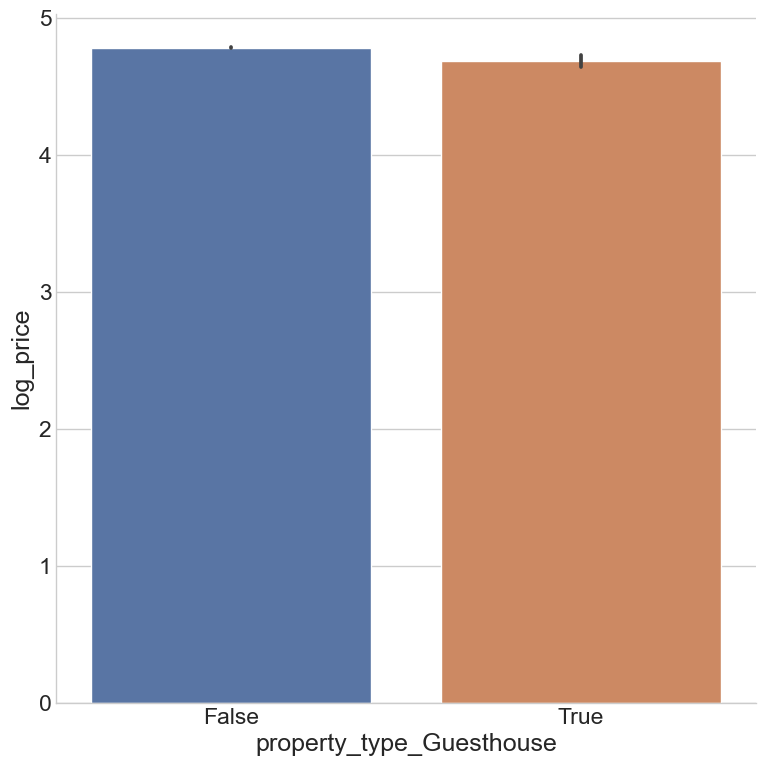

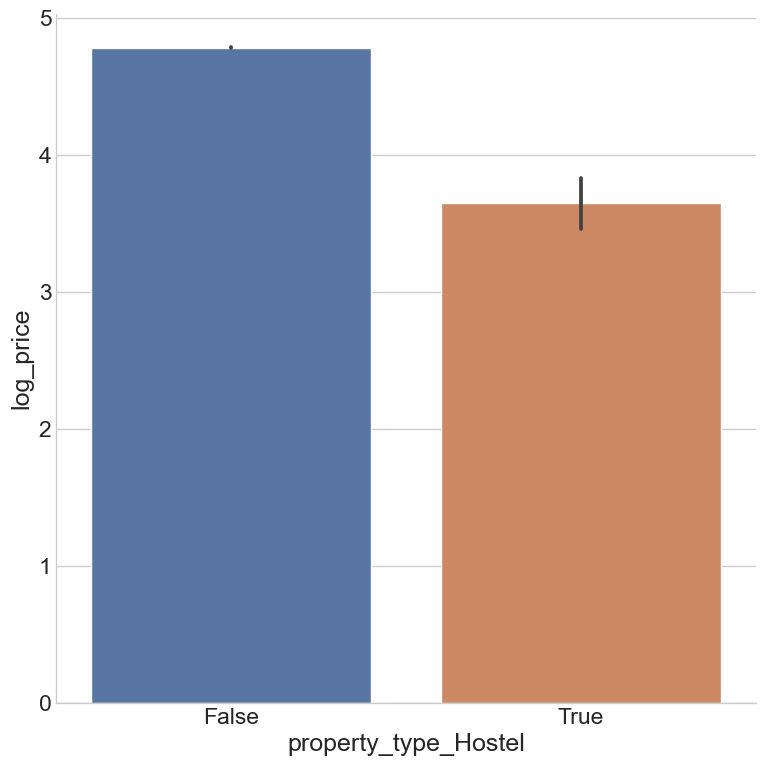

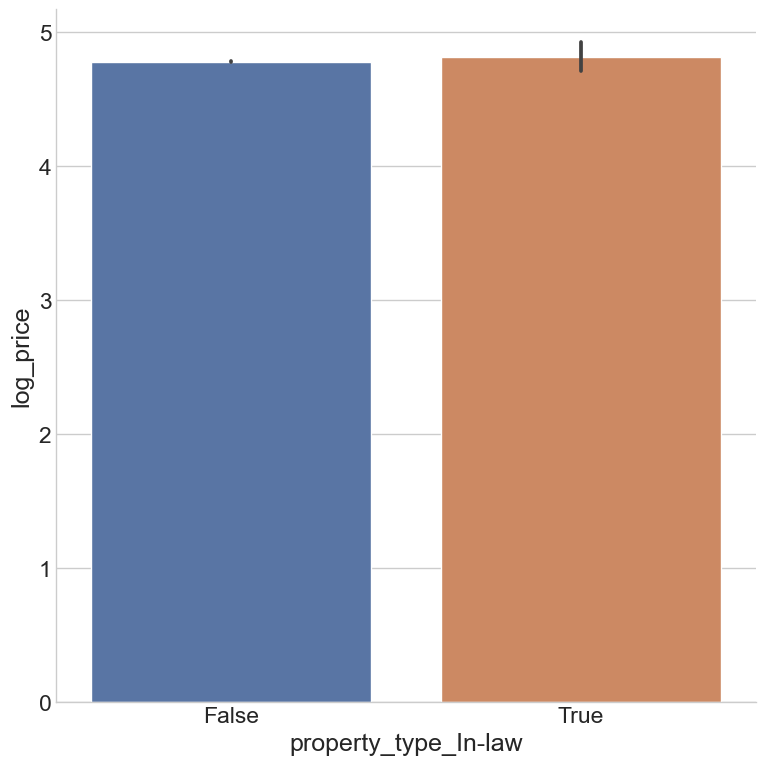

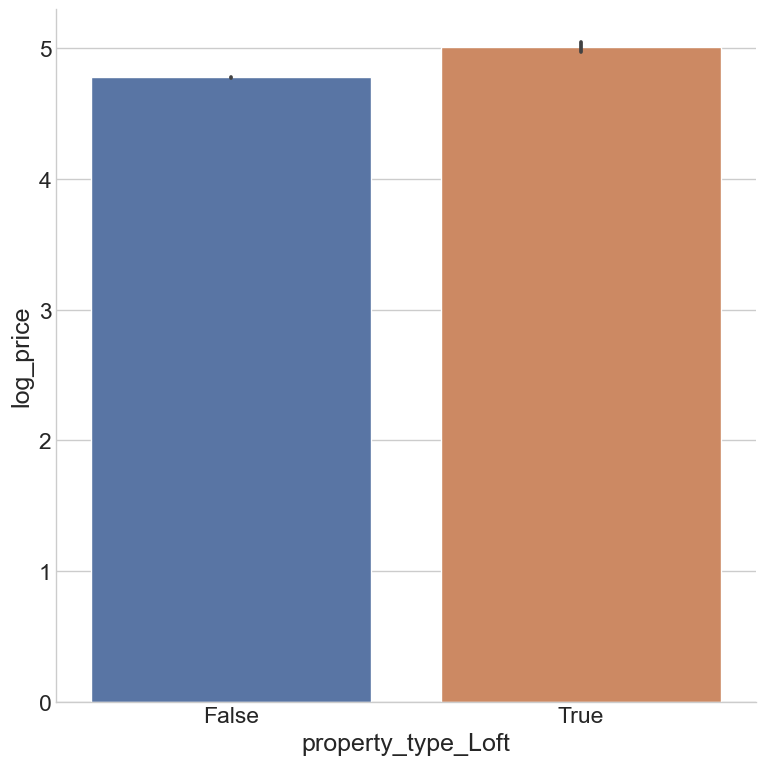

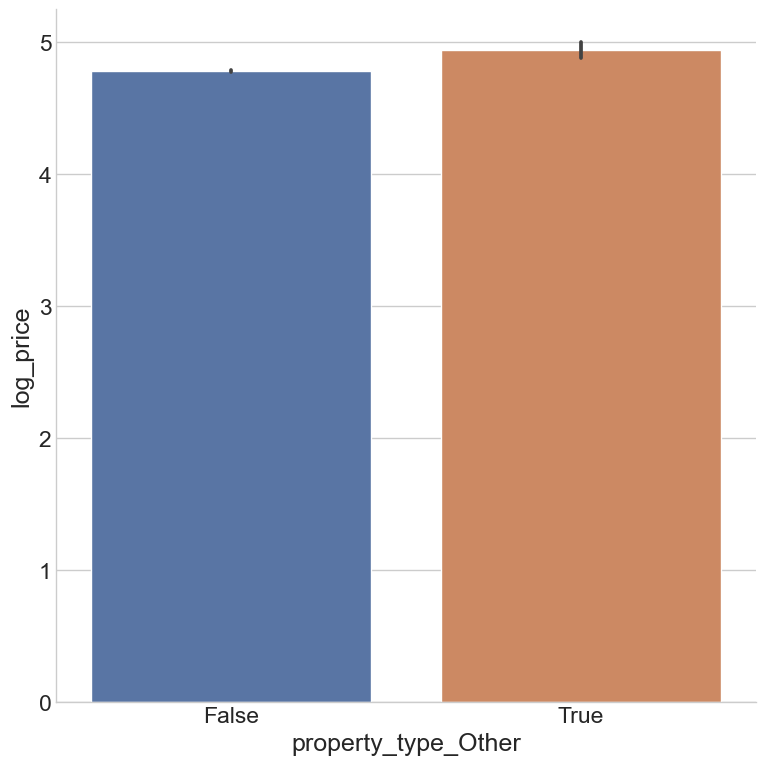

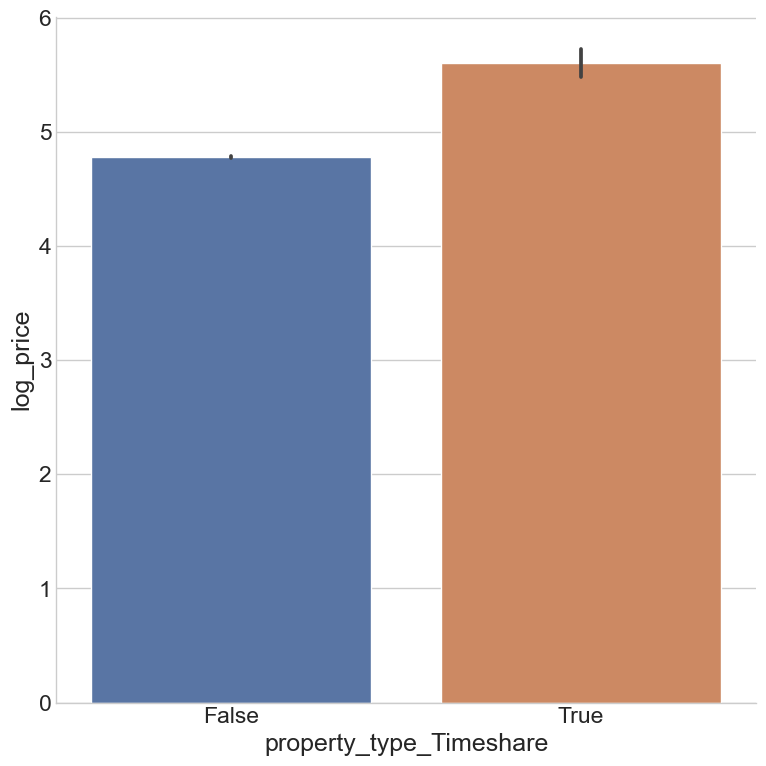

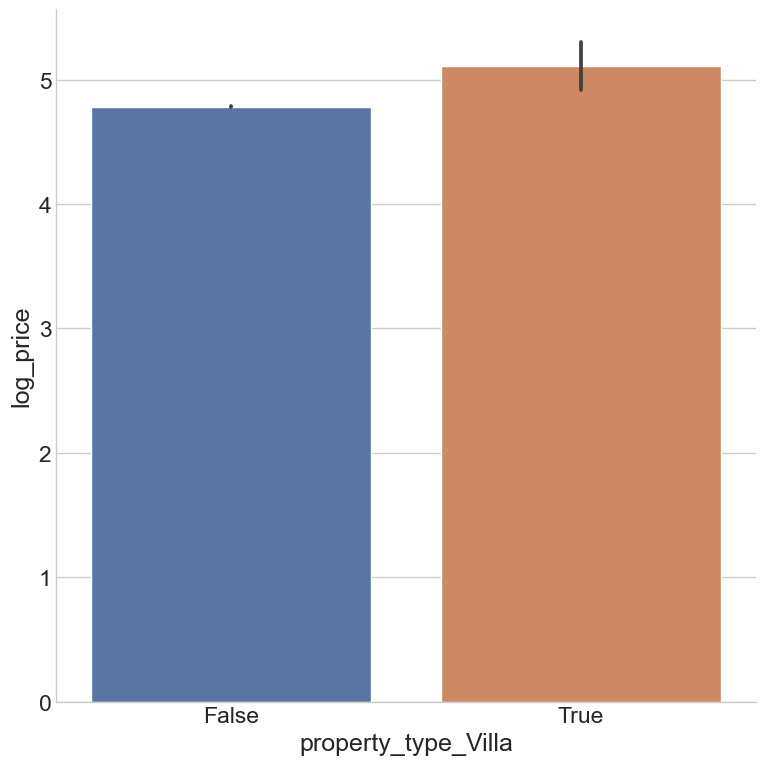

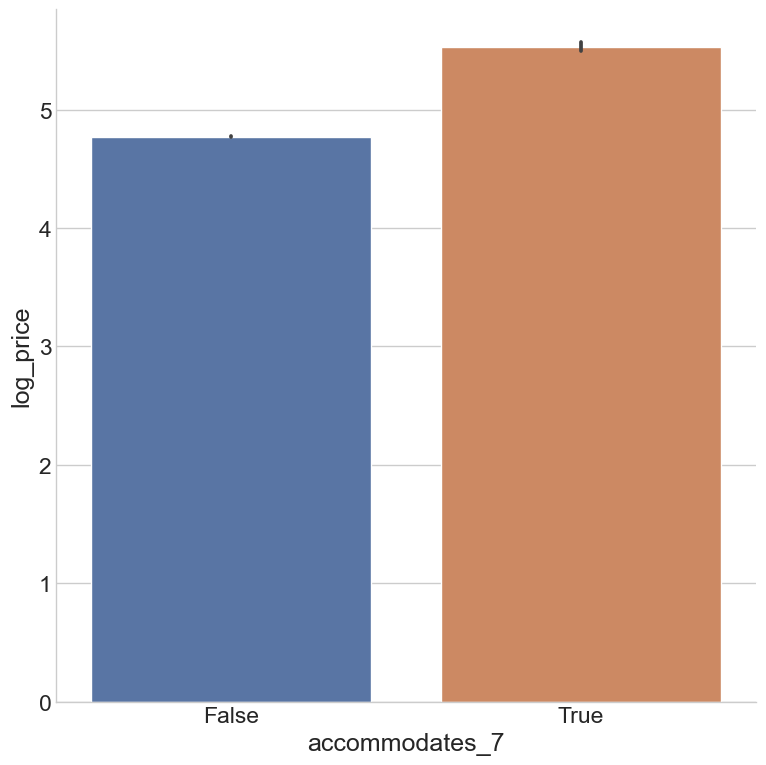

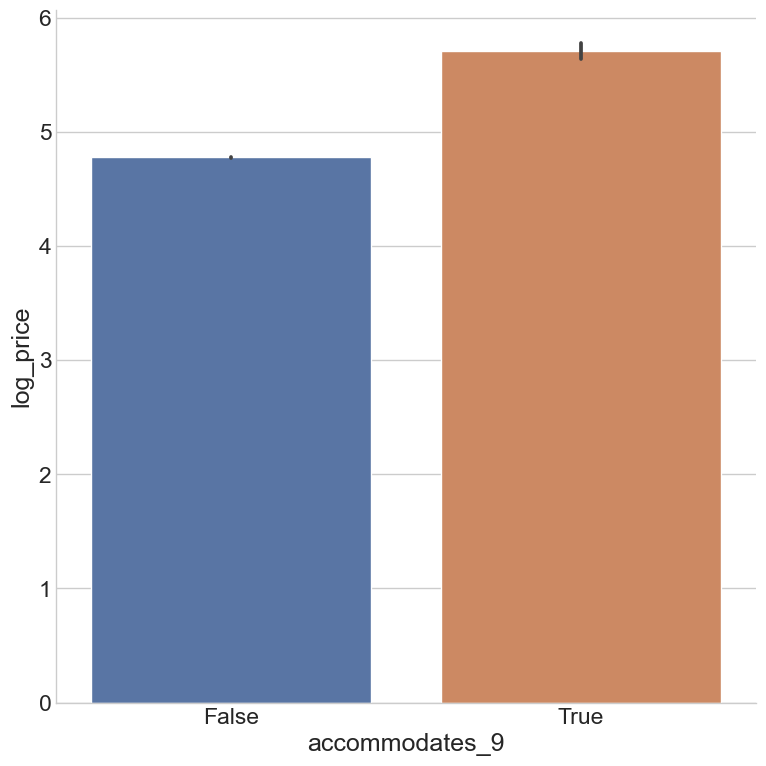

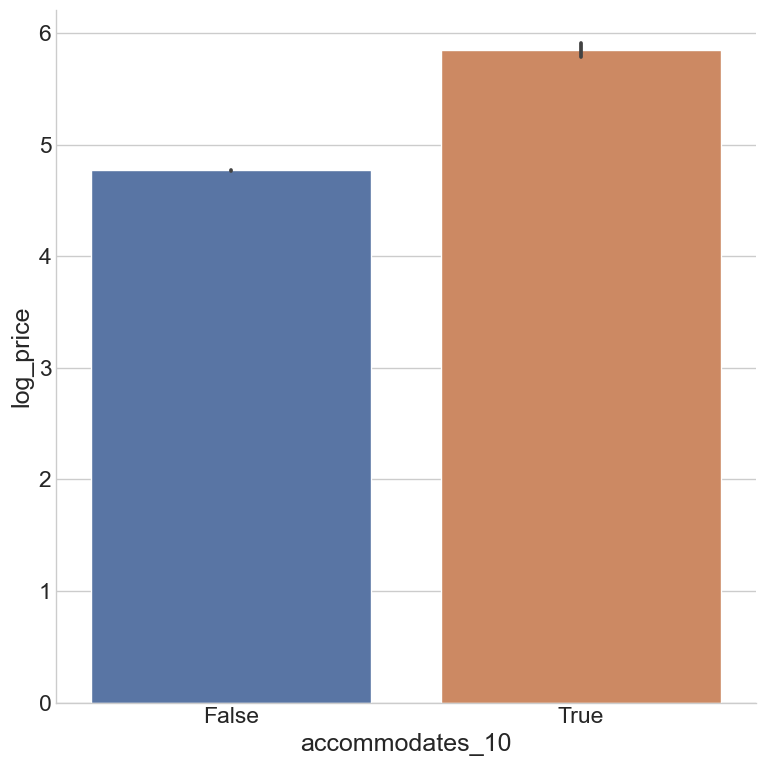

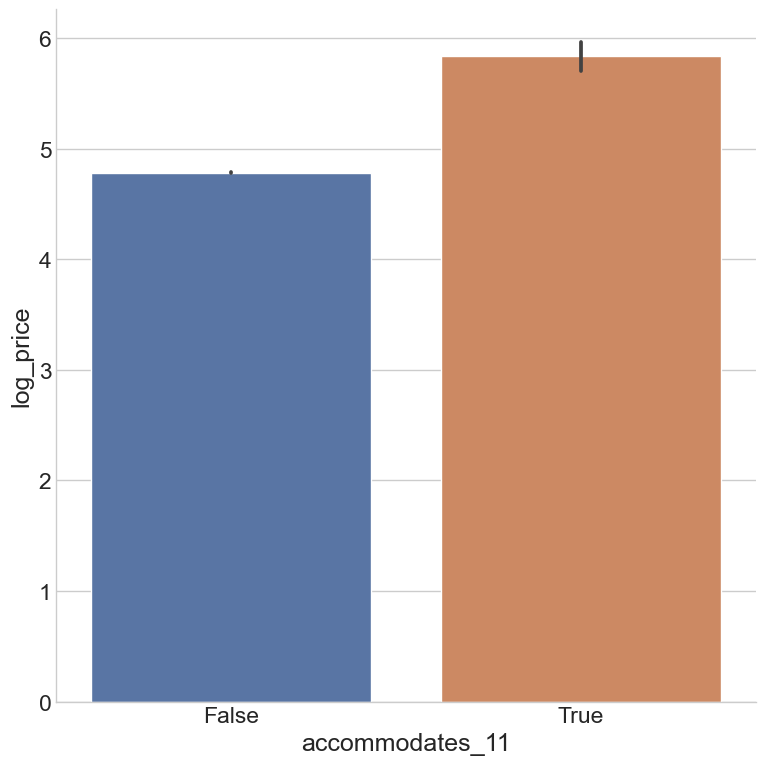

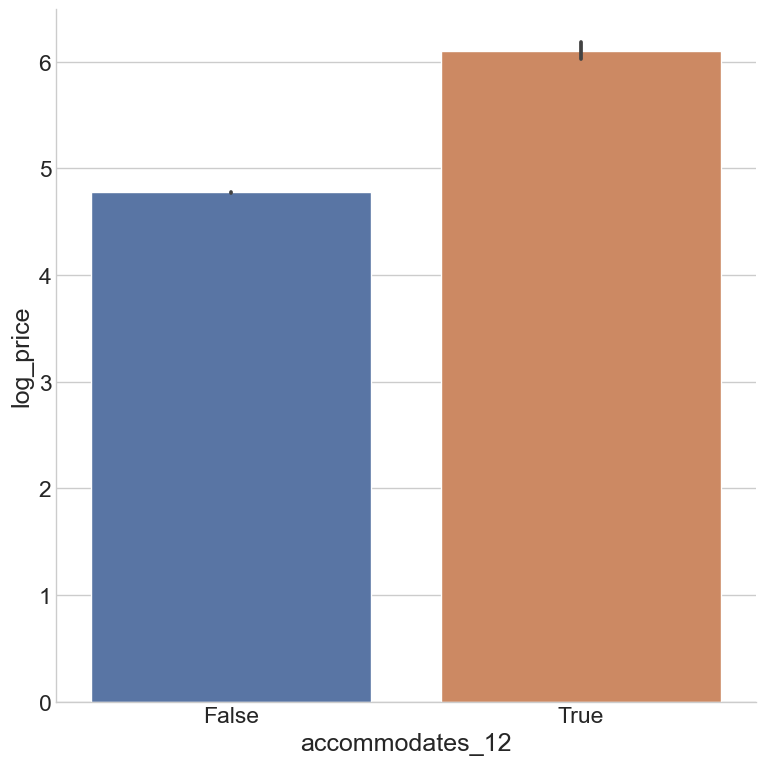

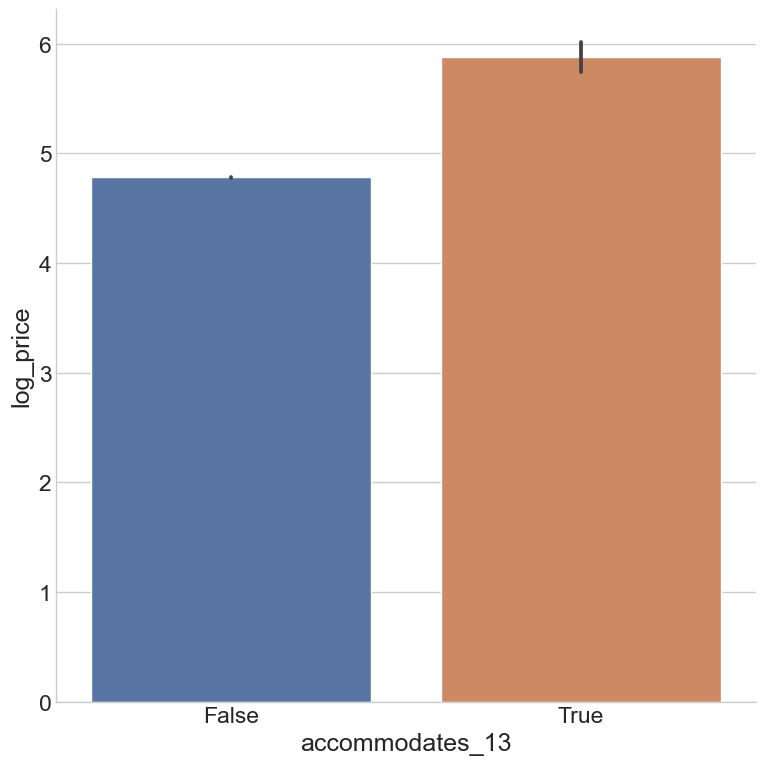

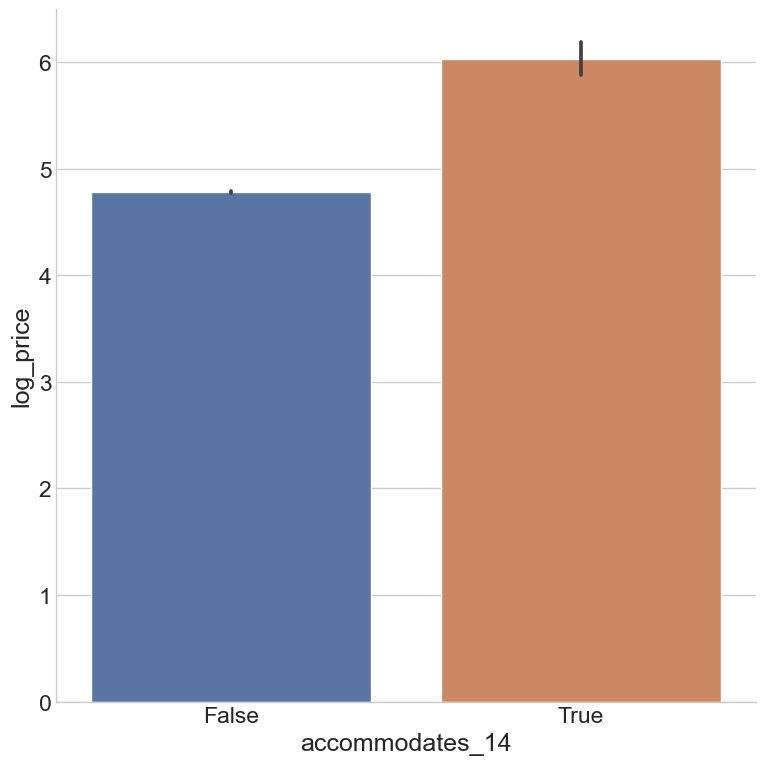

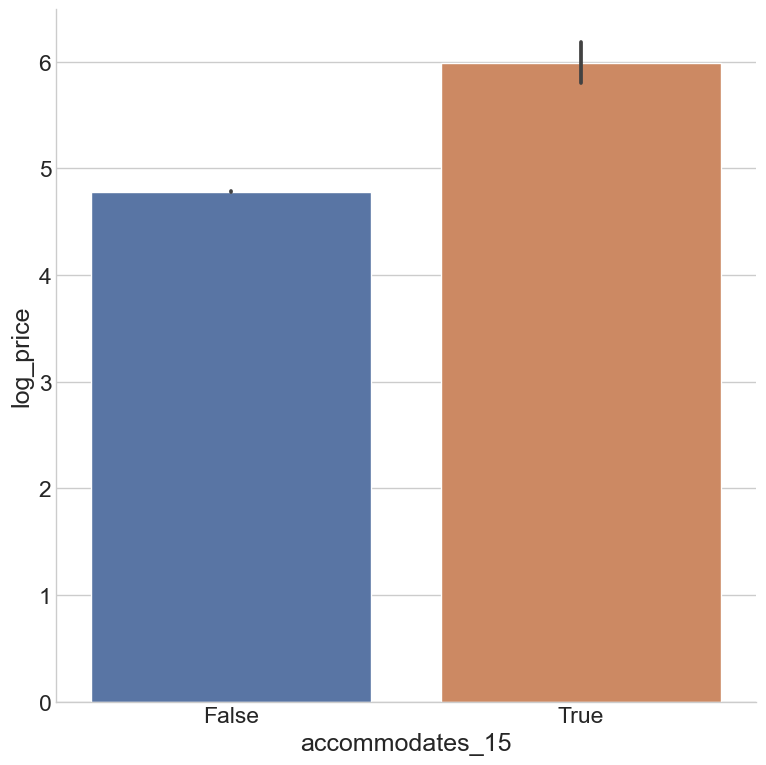

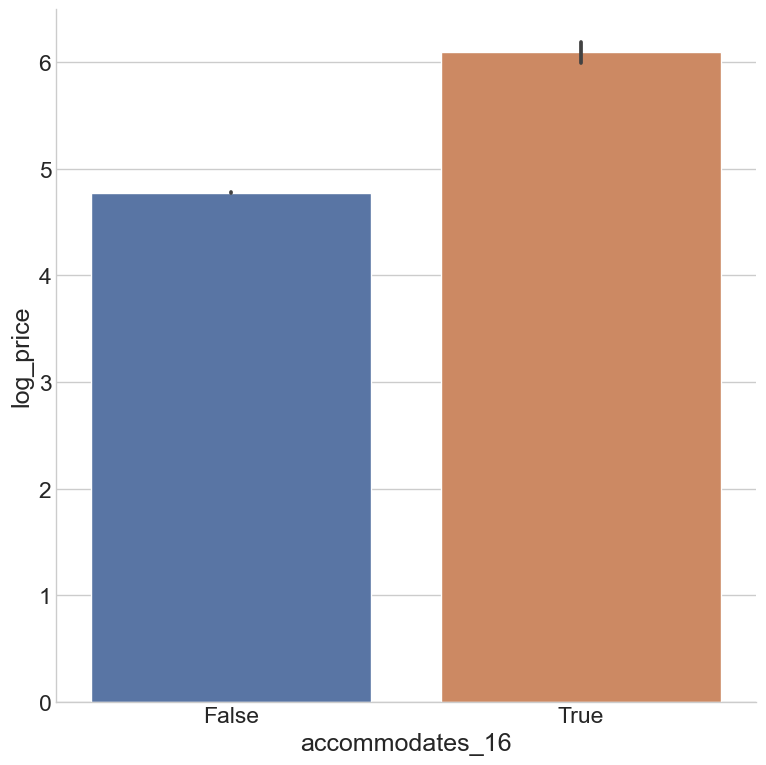

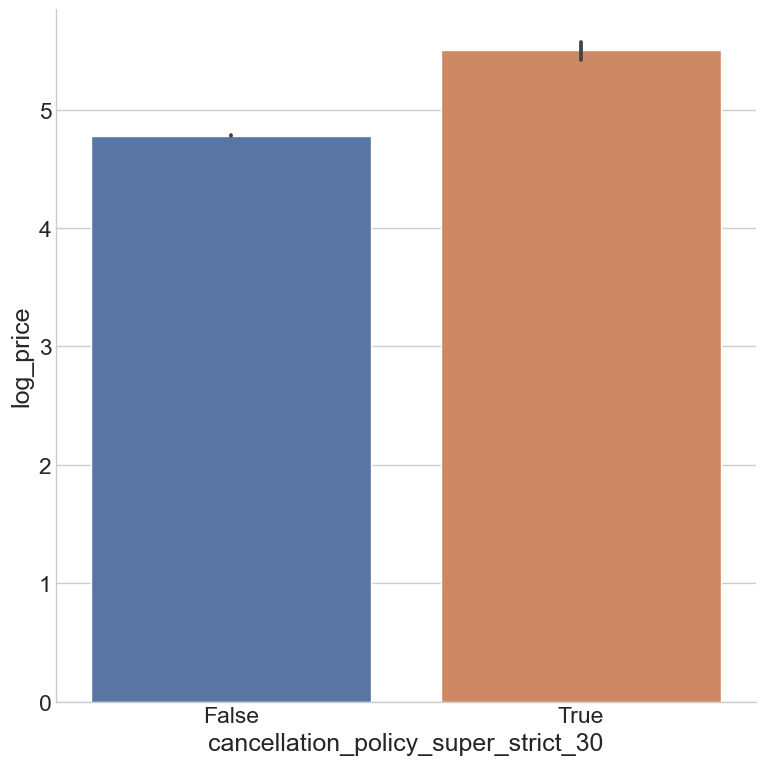

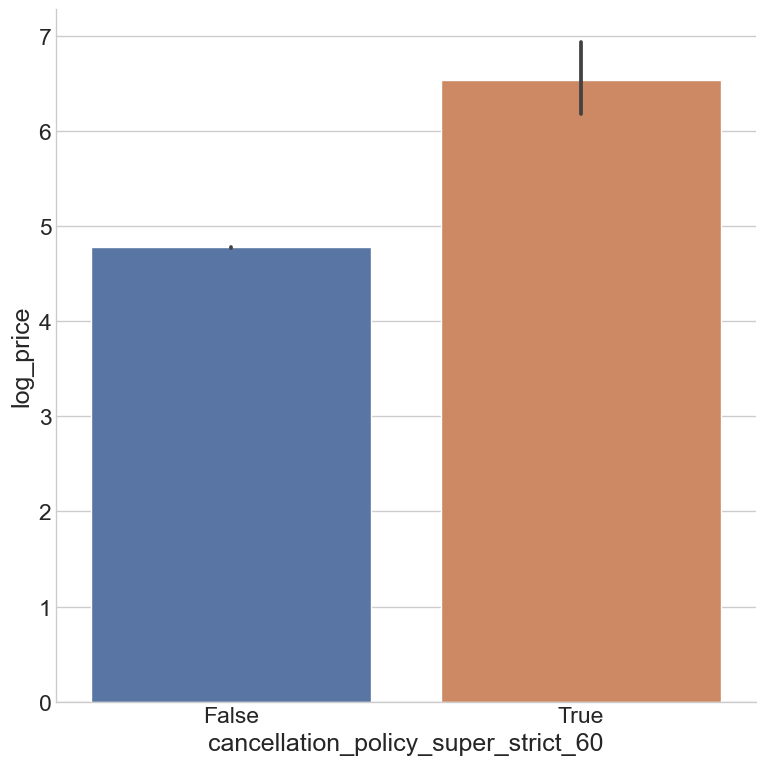

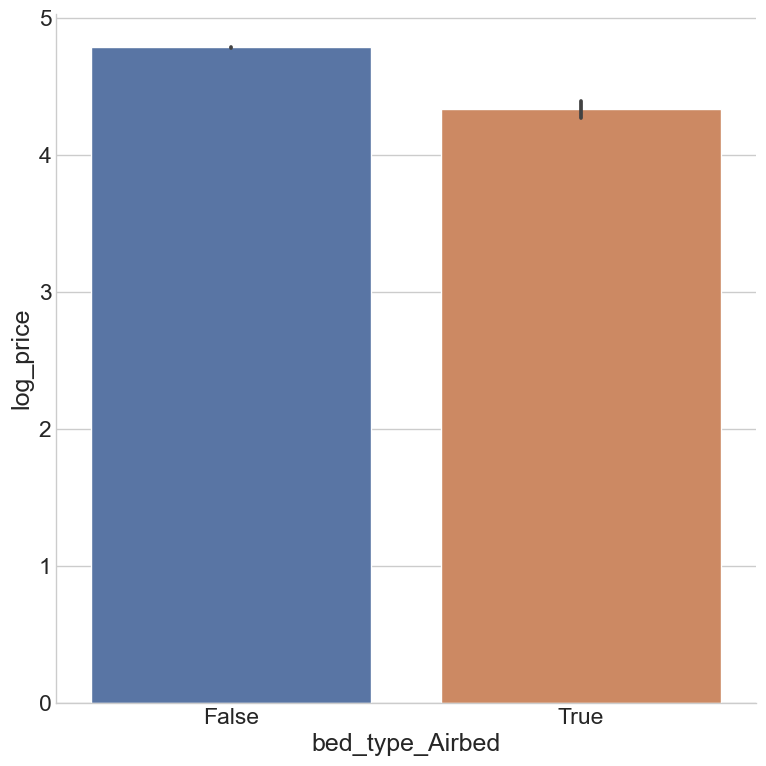

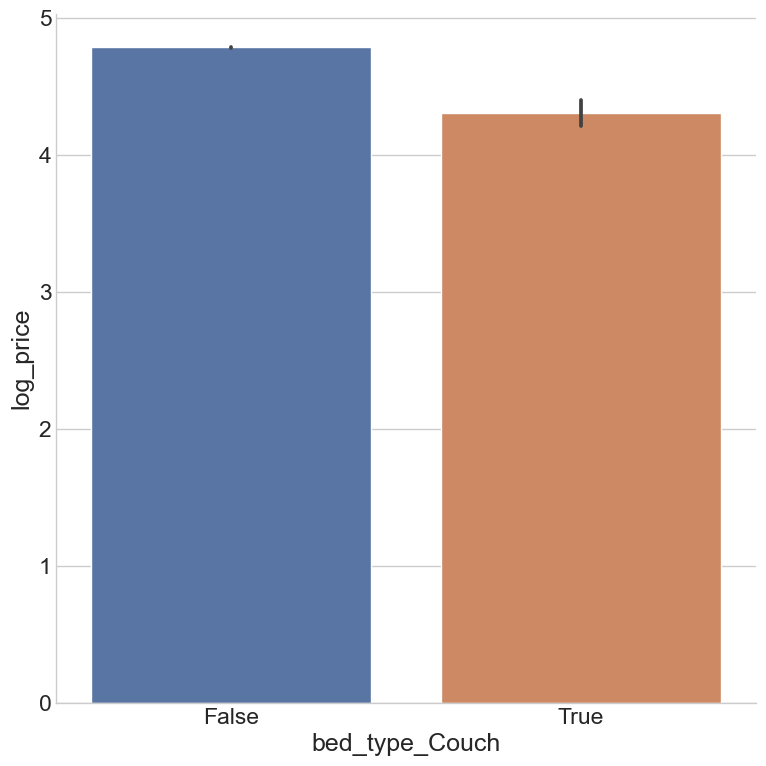

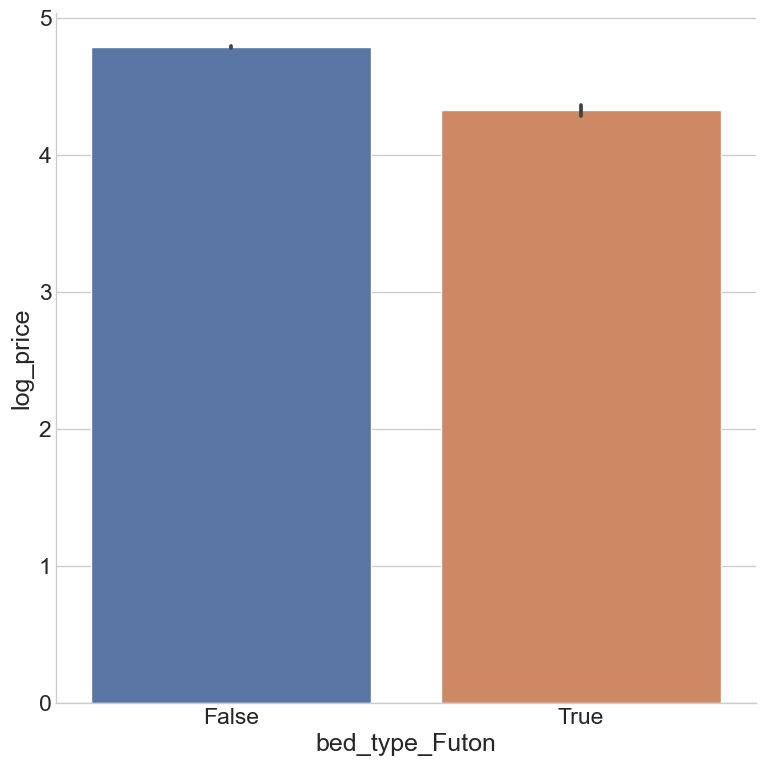

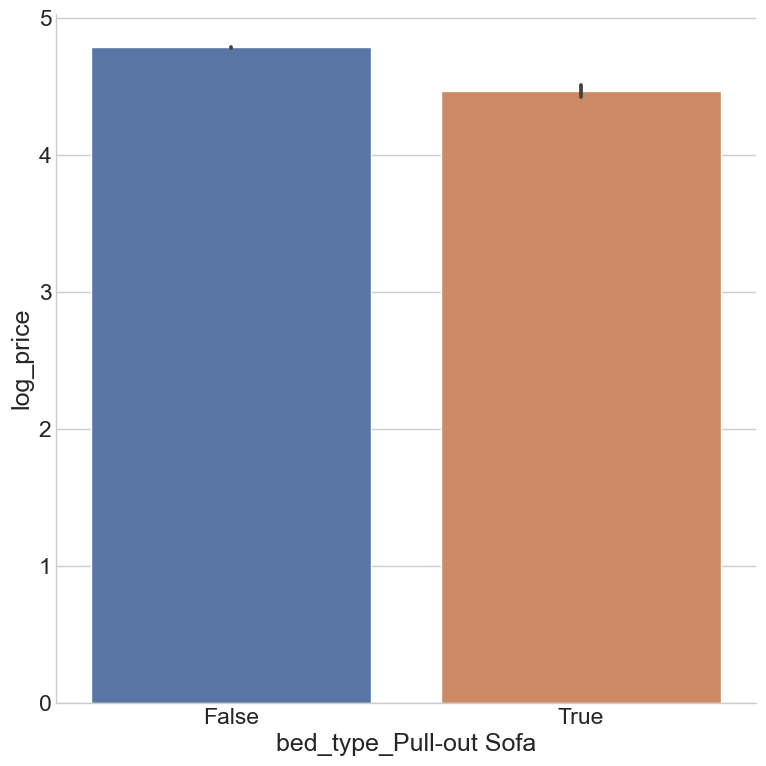

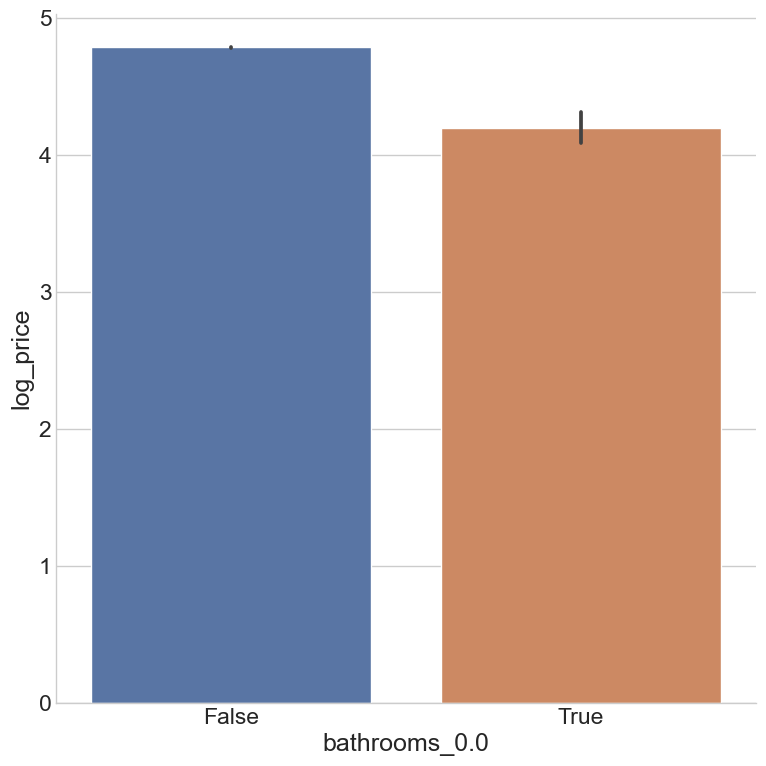

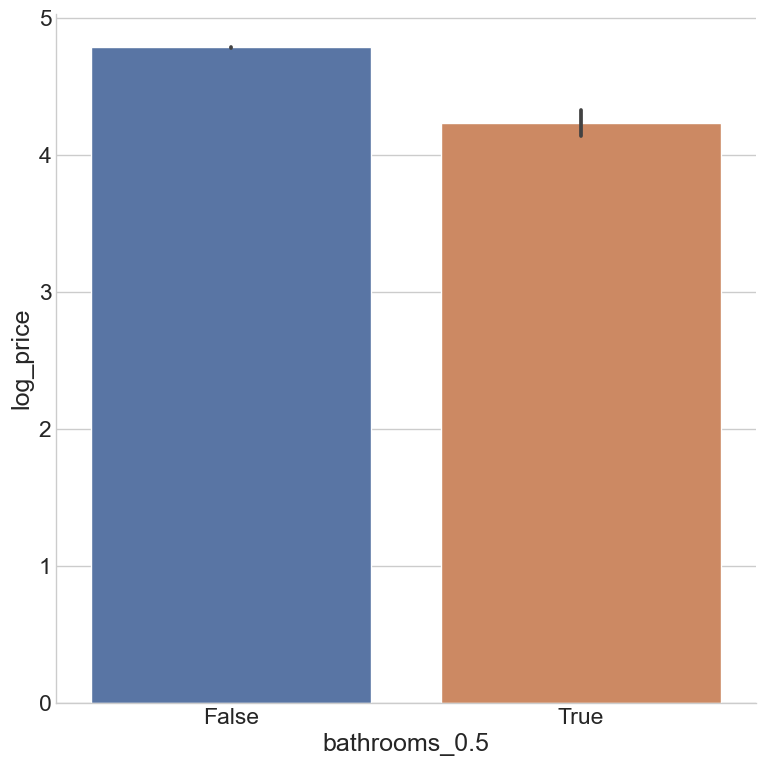

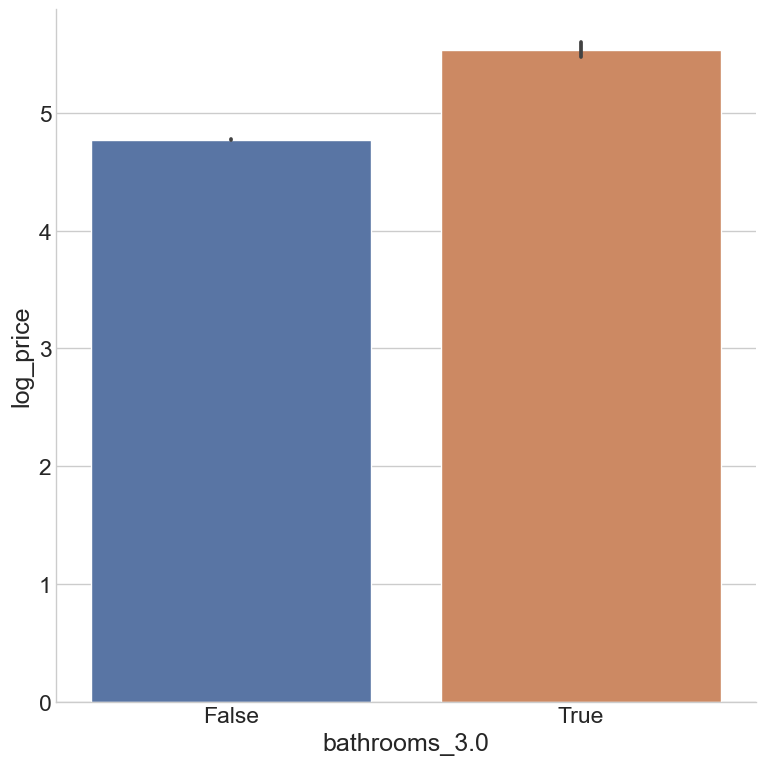

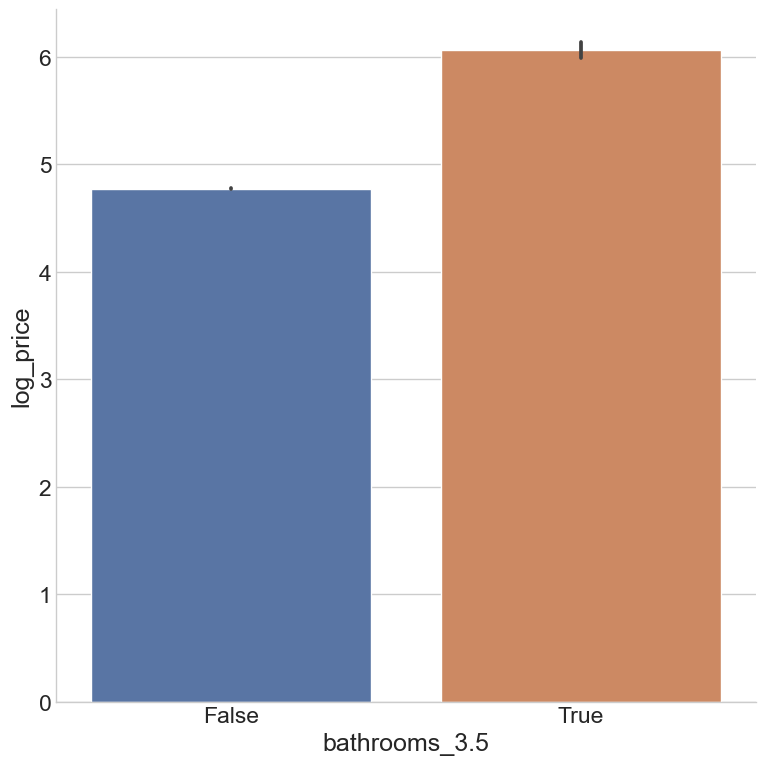

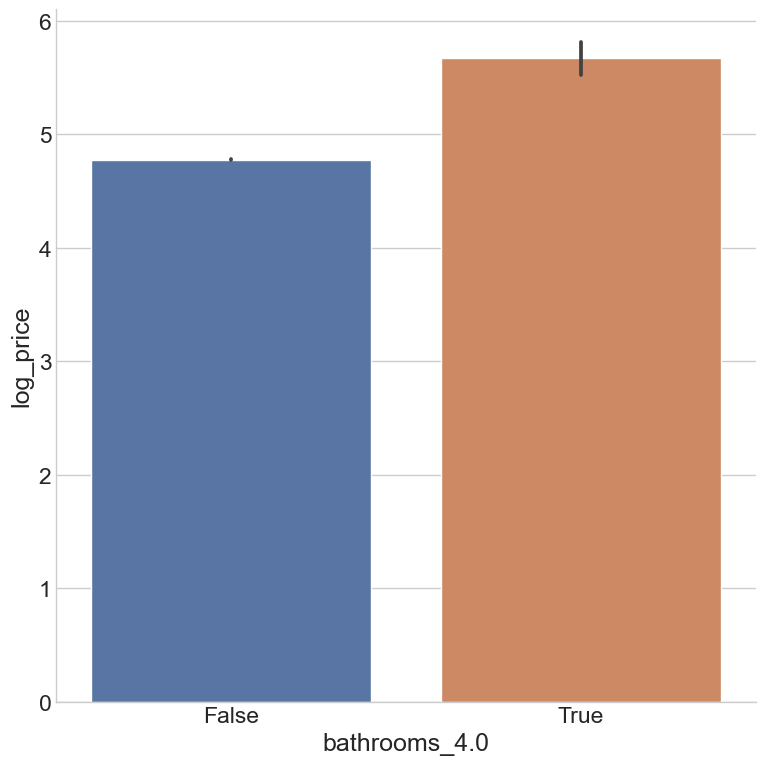

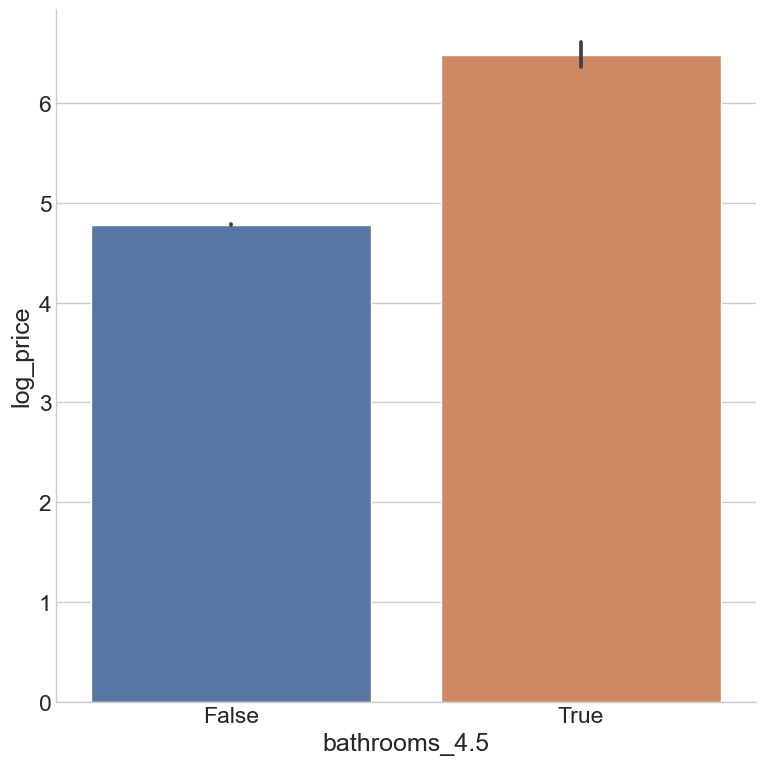

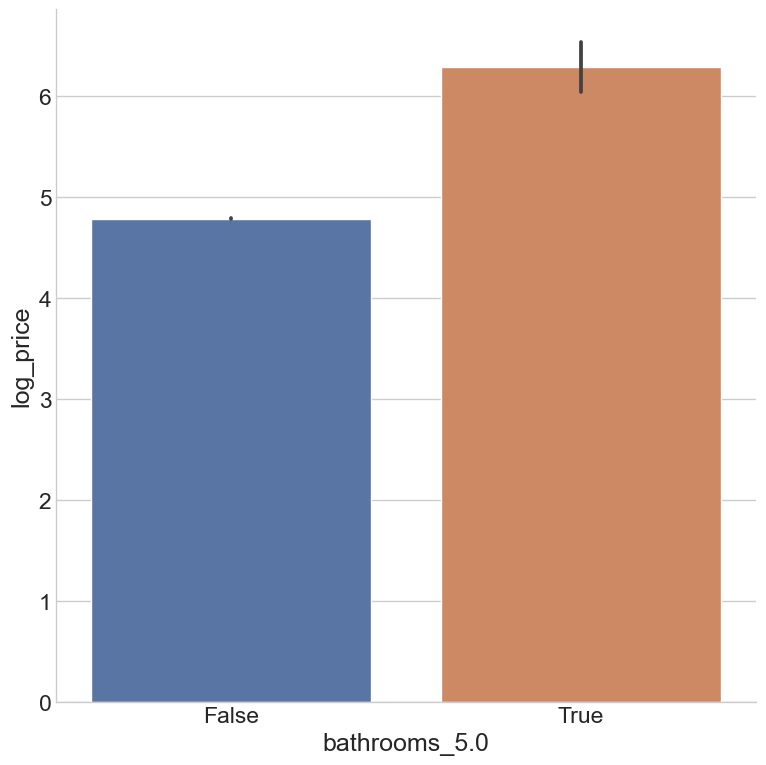

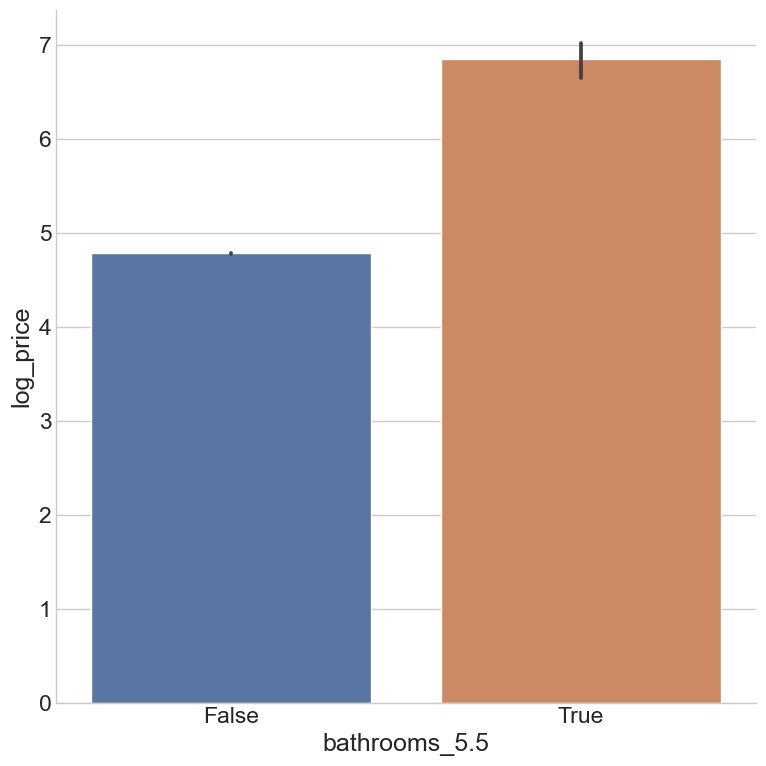

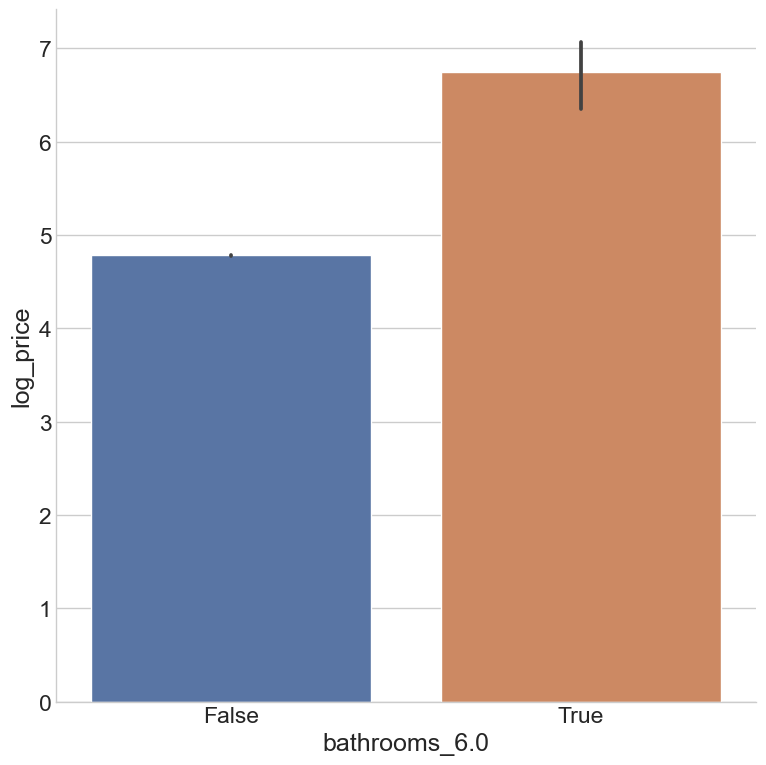

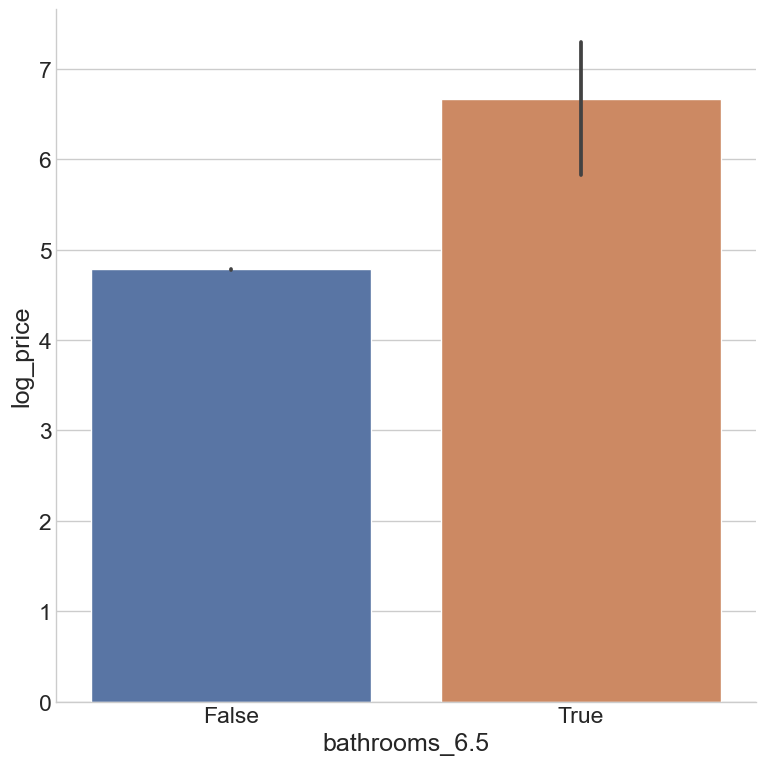

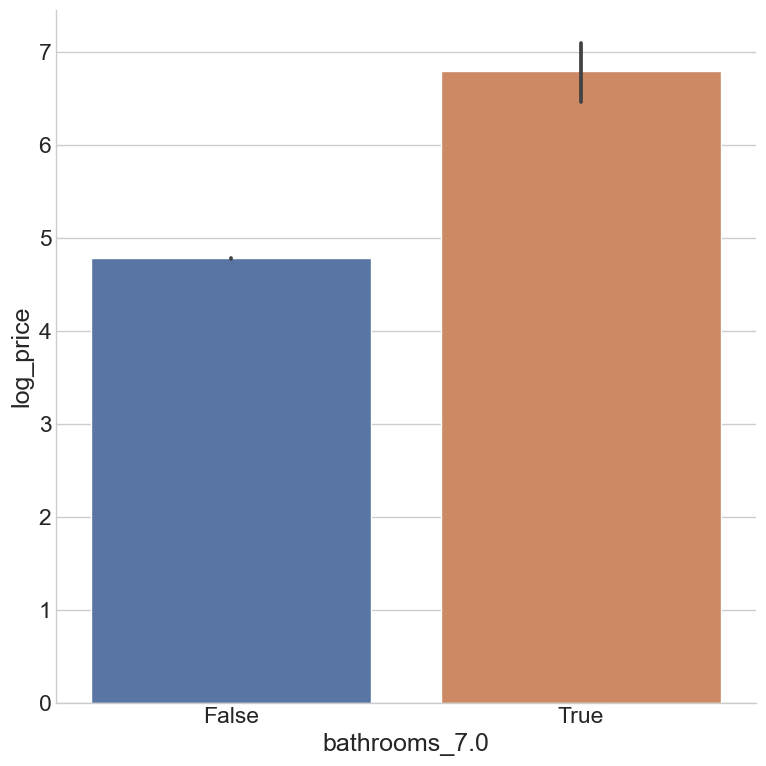

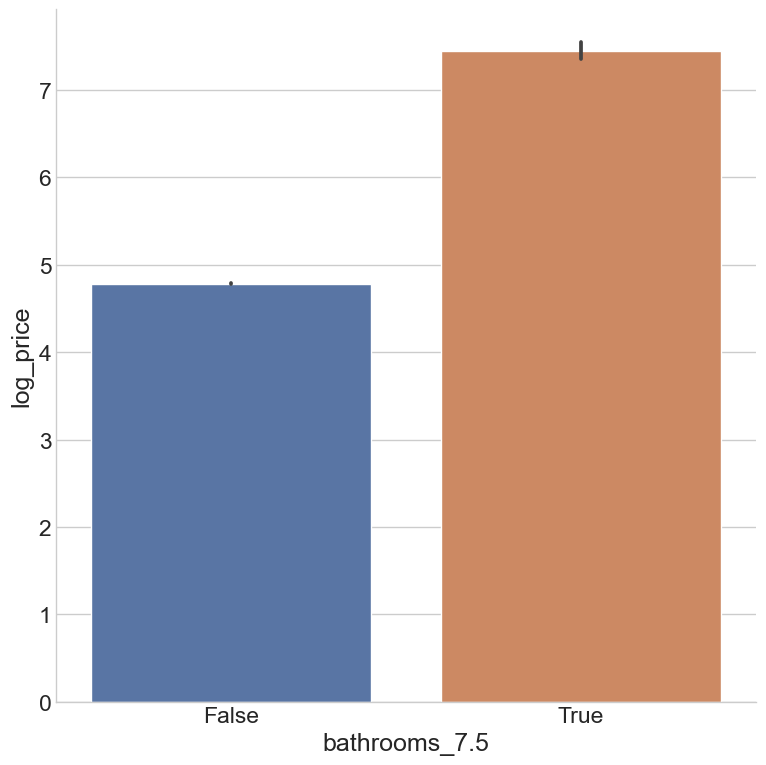

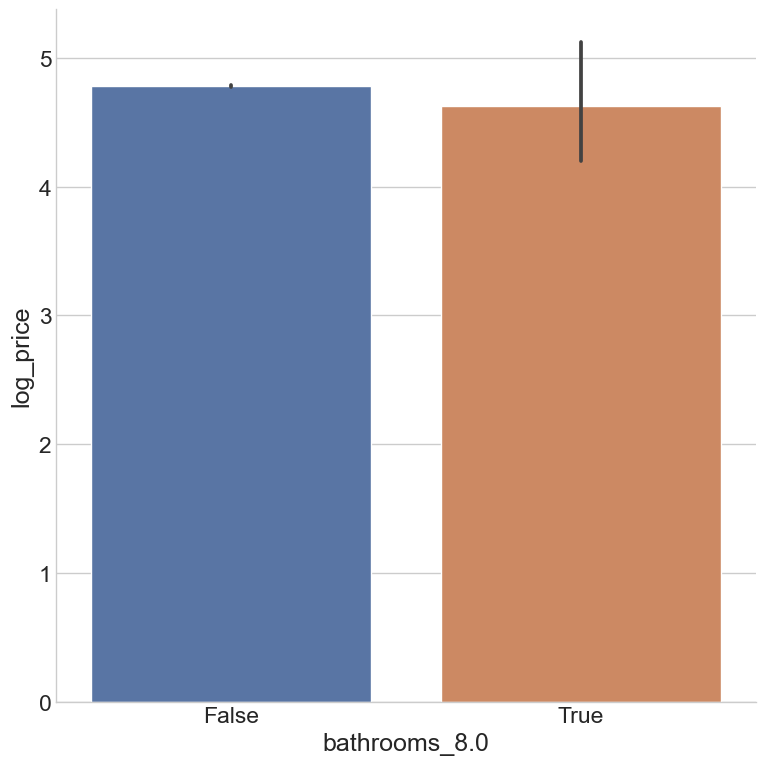

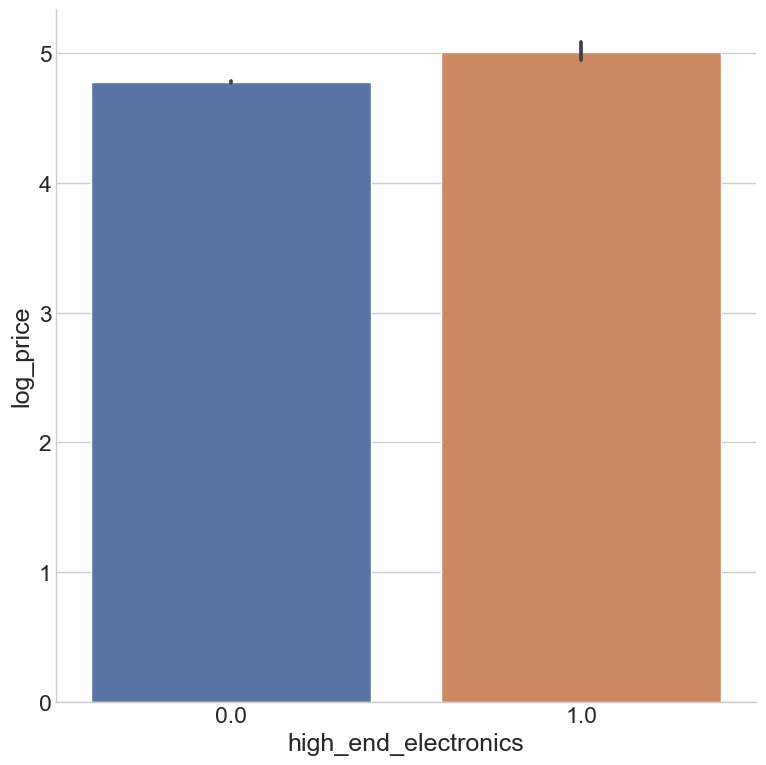

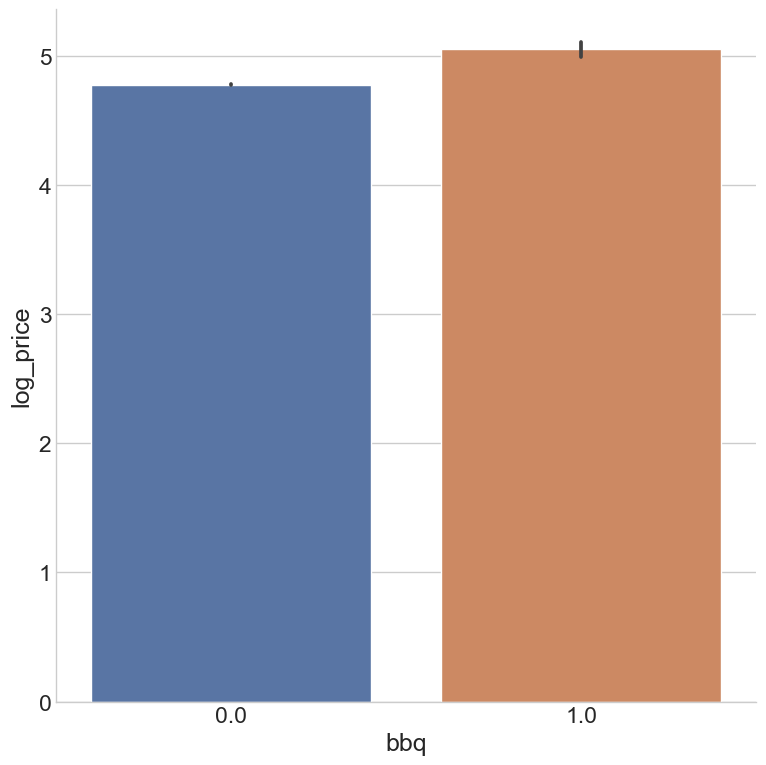

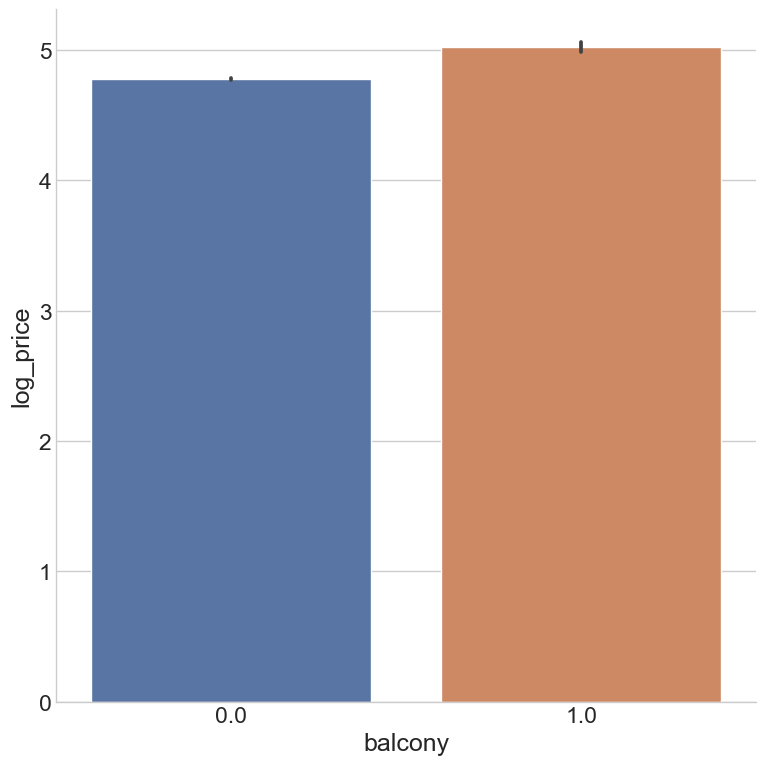

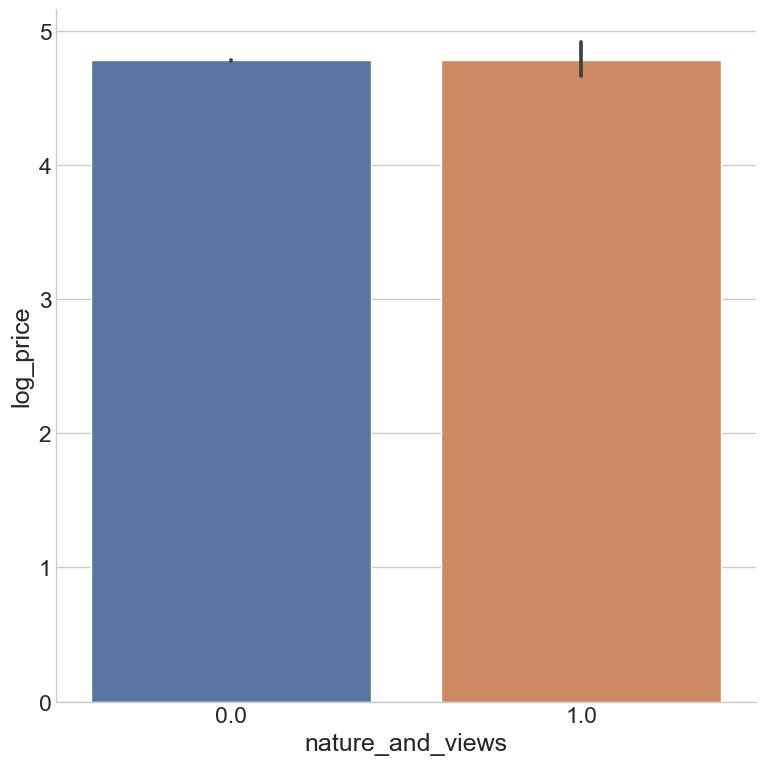

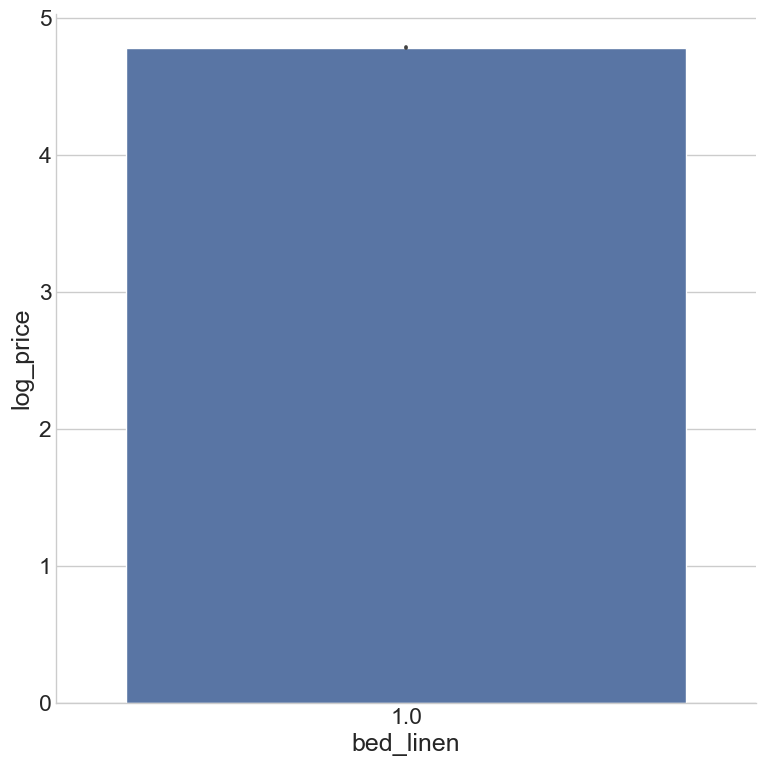

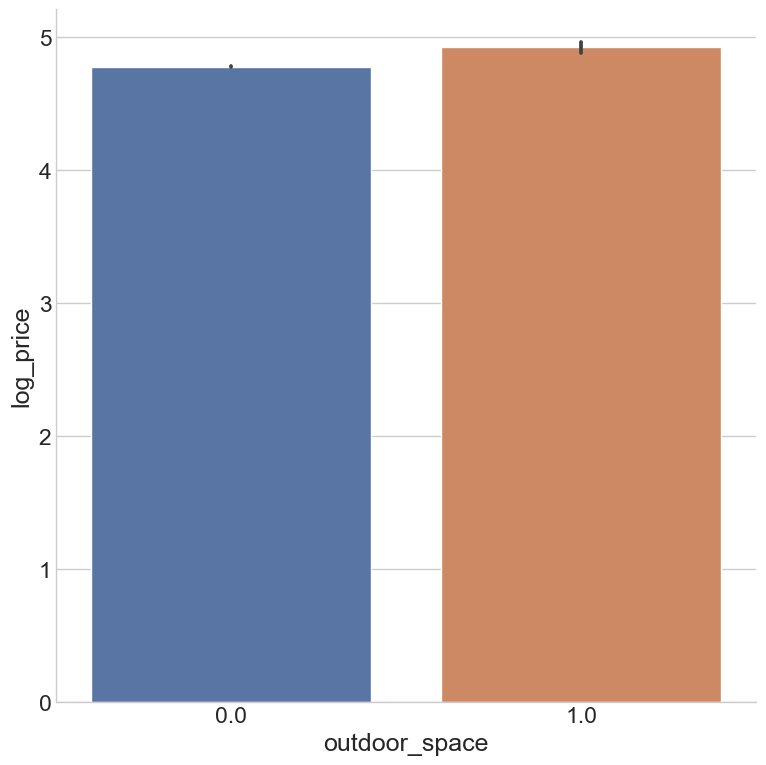

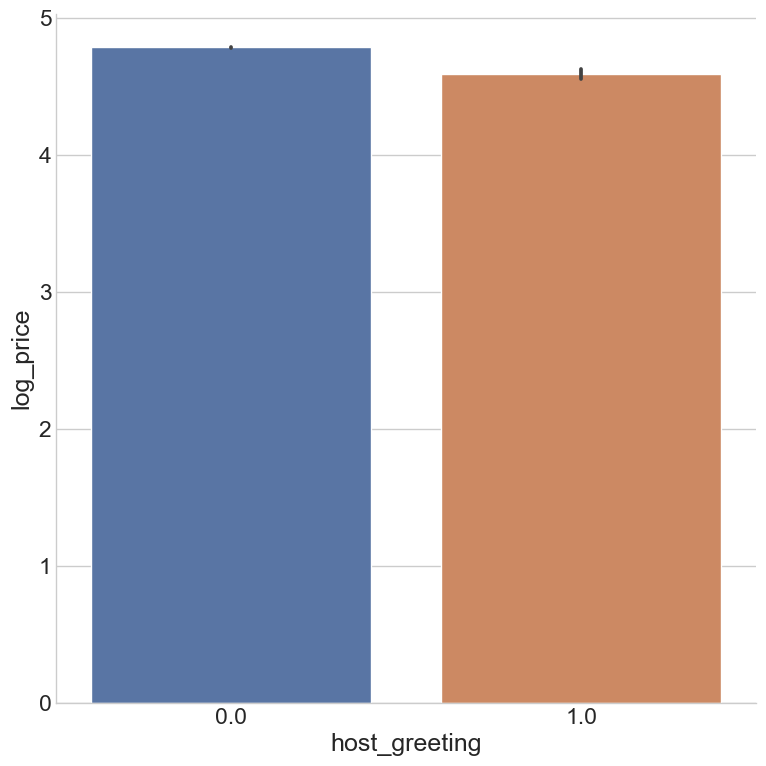

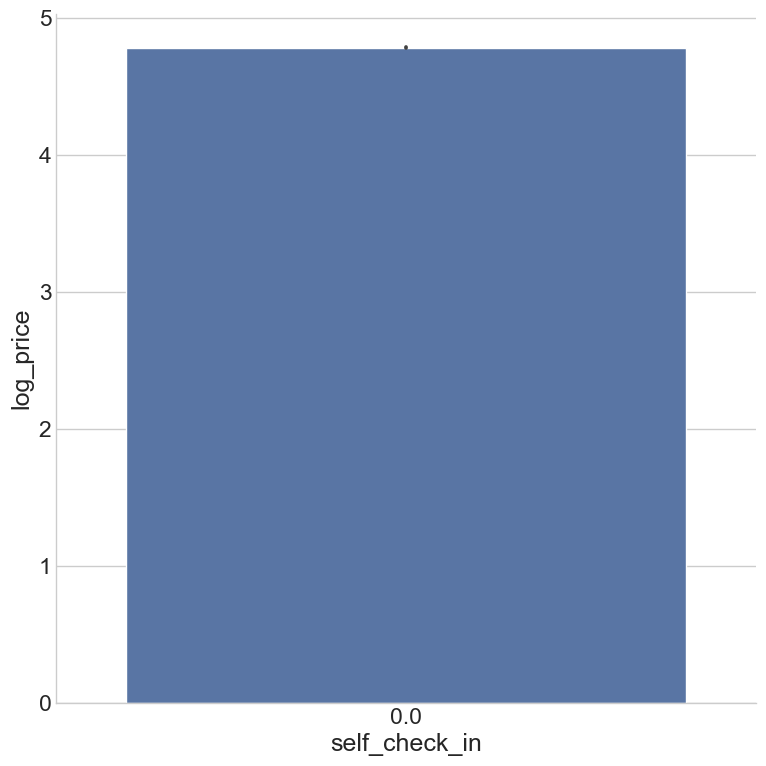

In [437]:
import seaborn as sns
for col in df[infrequent_amenities]:
    catplot(col)
    ### assgida log price ile cikarmayi dusundugumuz sutunlarin iliskisi incelendi  kesin cikaracagimiz 3 sutun:bed_linens self_check_in ve nature and viewsdigerleri yoruma acik sorulmali!!!!!

In [438]:
del df['amenities']
del df['self_check_in']
del df['bed_linen']
del df['nature_and_views']
#eger infruence_amenities icindeki hepsi silincekse infruencei de sil

In [439]:
#df.sum().sort_values(ascending = False).plot(kind='bar', figsize = (30,5))
##calismasi cok uzun surdugu icin yoruma aldik

## city

In [440]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [441]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
df.head()


log_price  cleaning_fee city   
0  5.010635   1             NYC  \
1  5.129899   1             NYC   
2  4.976734   1             NYC   
3  6.620073   1             SF    
4  4.744932   1             DC    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description   
0  Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \
1  Enjoy travelling during your stay in Manhattan. My place is centrally located near Times Square and Central Park with easy access to main subways as well as walking distance to many popular restaurants and bus tours. My place is close to the subway, Totto Ramen, Hell's Kitchen, Ippudo Westside, Empanada Mama, Intrepid Sea, Air & Space Museum. My place has three true bedrooms and one bathroom. The kitchen is stocked with stainless steel appliances like the Keurig machine. The living room is spacious and can accommodate another person thanks to the pull out bed. My place is centrally located to some of the top attractions in the city. Feel free to explore the entire apartment and do not worry about sharing the space with any strangers. This is all yours during your stay. I am available via text/email/phone for anything you might need. - Times Square - Rockefeller Plaza - Central Park  - 5th Avenue Shopping  -Broadway Theater District  - Empire State Building  - Hudson River Express Subwa   
2  The Oasis comes complete with a full backyard with outdoor furniture to make the most of this summer vacation!!  The unit has high ceilings, a completed renovation throughout, beautiful flood lighting and exposed brick! Best part, total seclusion. You share with no one! The entire unit is yours during your stay.  It's a fully furnished apartment that can hold up to 5 people. The only items you need are a toothbrush and your luggage!!! The unit has high ceilings, a completed renovation throughout, beautiful flood lighting and exposed brick! Not to mention the large backyard complete with ourdoor furniture.  Best part, total seclusion. You share with no one! The entire unit is yours during your stay. The entire unit and backyard Garden area My assistant is ava

## last review

In [442]:
# Converting to datetime
df.first_review = pd.to_datetime(df.first_review) 

In [443]:
# we create a new column named 'time_since_last_review'
import datetime
df['time_since_last_review'] = (datetime.datetime.today() - pd.to_datetime(df['last_review'])).dt.days
df['time_since_last_review']

0        2556.0
1        2124.0
2        2133.0
3       NaN    
4        2368.0
          ...  
74106   NaN    
74107    2285.0
74108    2137.0
74109   NaN    
74110    2270.0
Name: time_since_last_review, Length: 74111, dtype: float64

In [444]:
#we check corelation between log_price
correlation = df['time_since_last_review'].corr(df['log_price'])
correlation

0.021549961341656185

## host since

In [445]:
df.host_since = pd.to_datetime(df.host_since) # Converting to datetime

In [446]:
# we create a new column named 'host_since_day'
import datetime
df['host_since_day'] = (datetime.datetime.today() - pd.to_datetime(df['host_since'])).dt.days
df['host_since_day']

0        4131
1        2220
2        2457
3        3012
4        3061
         ... 
74106    3768
74107    2632
74108    4212
74109    2130
74110    3886
Name: host_since_day, Length: 74111, dtype: int32

In [447]:
#we check corelation between log_price
correlation = df['host_since_day'].corr(df['log_price'])
correlation

0.0782745322673194

## host_response_rate

In [448]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

host_response_rate
100%       43254
unknown    18299
50-89%     7291 
90-99%     3192 
0-49%      2075 
Name: count, dtype: int64

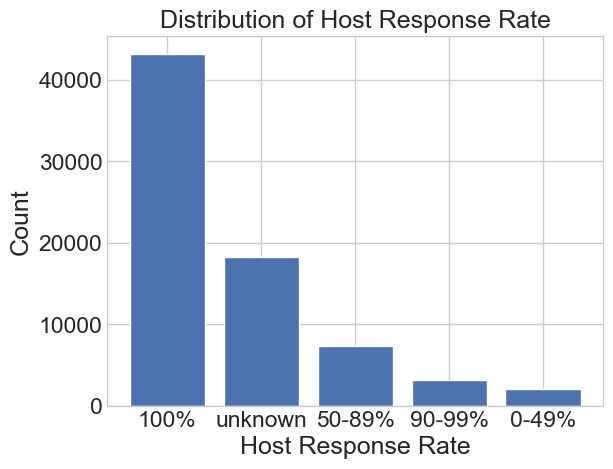

In [449]:
import matplotlib.pyplot as plt

plt.bar(df.host_response_rate.value_counts().index, df.host_response_rate.value_counts().values)
plt.xlabel('Host Response Rate')
plt.ylabel('Count')
plt.title('Distribution of Host Response Rate')
plt.show()


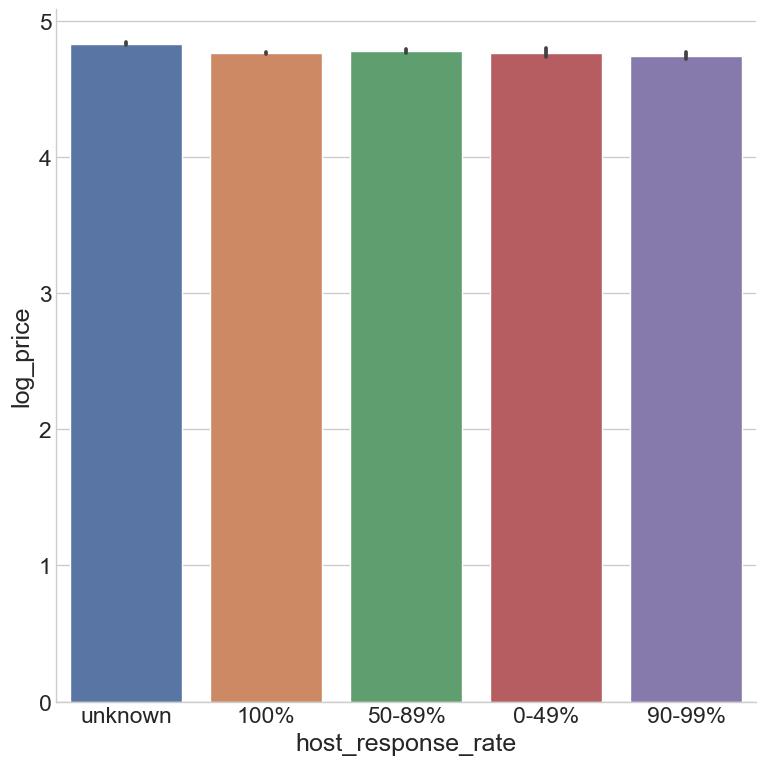

In [450]:
catplot('host_response_rate')

## review_scores_rating

In [451]:
df['review_scores_rating']

0        100.000000
1        93.000000 
2        92.000000 
3        94.067365 
4        40.000000 
           ...     
74106    94.067365 
74107    93.000000 
74108    94.000000 
74109    94.067365 
74110    96.000000 
Name: review_scores_rating, Length: 74111, dtype: float64

In [452]:
# Bin into four categories
df.review_scores_rating = pd.cut(df.review_scores_rating, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.review_scores_rating = df.review_scores_rating.astype('str')

# Replace nulls with 'unknown'
df.review_scores_rating.replace('nan', 'unknown', inplace=True)

# Category counts
df.review_scores_rating.value_counts()

review_scores_rating
90-99%    45552
100%      16215
50-89%    12114
0-49%     230  
Name: count, dtype: int64

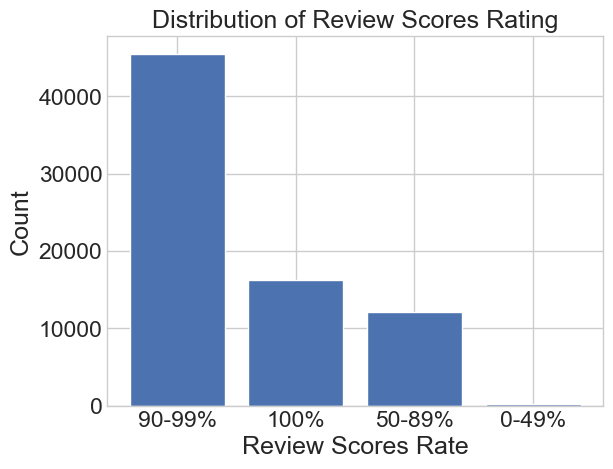

In [453]:
import matplotlib.pyplot as plt

plt.bar(df.review_scores_rating.value_counts().index, df.review_scores_rating.value_counts().values)
plt.xlabel('Review Scores Rate')
plt.ylabel('Count')
plt.title('Distribution of Review Scores Rating')
plt.show()


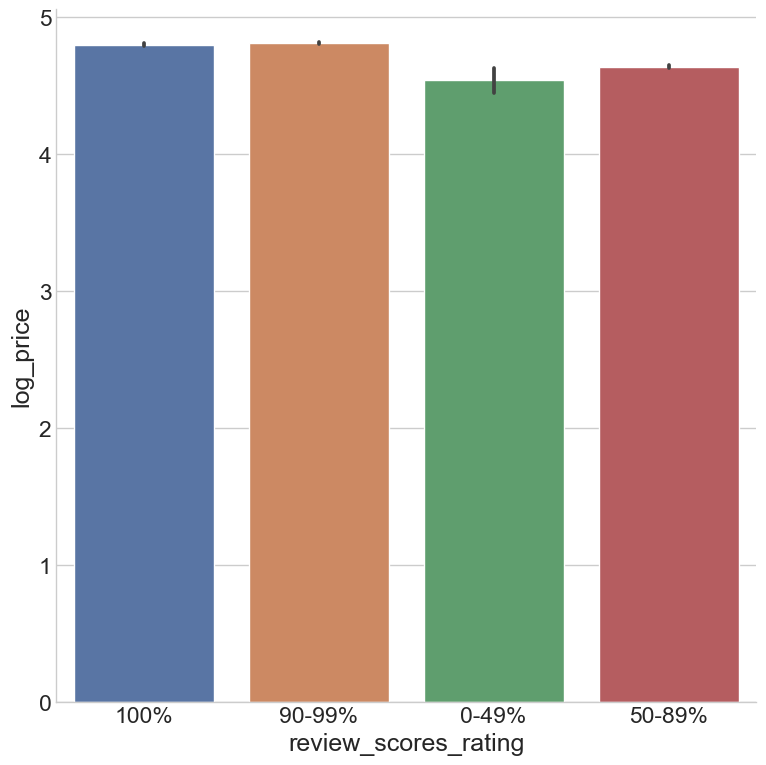

In [454]:
catplot('review_scores_rating')

## host_has_profile_pic

In [455]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
df.loc[df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0

## host_identity_verified

In [456]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_identity_verified == 't', 'host_identity_verified'] = 1
df.loc[df.host_identity_verified == 'f', 'host_identity_verified'] = 0

## instant_bookable

In [457]:
#We changed the true ones 1 the false ones 0 
df.loc[df.instant_bookable == 't', 'instant_bookable'] = 1
df.loc[df.instant_bookable == 'f', 'instant_bookable'] = 0

## super_host

In [458]:
df['host_since_day'].mean()

3283.7451930212787

In [459]:
df['host_since_day'].min()

2113

In [460]:
df_iqr['number_of_reviews'].describe()

count    64765.000000
mean     10.486605   
std      13.818450   
min      0.000000    
25%      1.000000    
50%      4.000000    
75%      15.000000   
max      58.000000   
Name: number_of_reviews, dtype: float64

In [461]:
df['super_host'] = ((df['host_since_day'] > df['host_since_day'].mean()) &
                    (df['host_identity_verified'] == 1) &
                    (df['host_has_profile_pic'] == 1) &
                    ((df['host_response_rate'] == '90-99%') | (df['host_response_rate'] == '100%')) &
                    ((df['review_scores_rating'] == '90-99%') | (df['review_scores_rating'] == '100%'))
)

df['super_host']

0        False
1        False
2        False
3        False
4        False
         ...  
74106    False
74107    False
74108    True 
74109    False
74110    True 
Name: super_host, Length: 74111, dtype: bool

In [462]:
df['super_host'].astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
74106    0
74107    0
74108    1
74109    0
74110    1
Name: super_host, Length: 74111, dtype: int32

In [463]:
df['super_host'].value_counts()

super_host
False    58762
True     15349
Name: count, dtype: int64

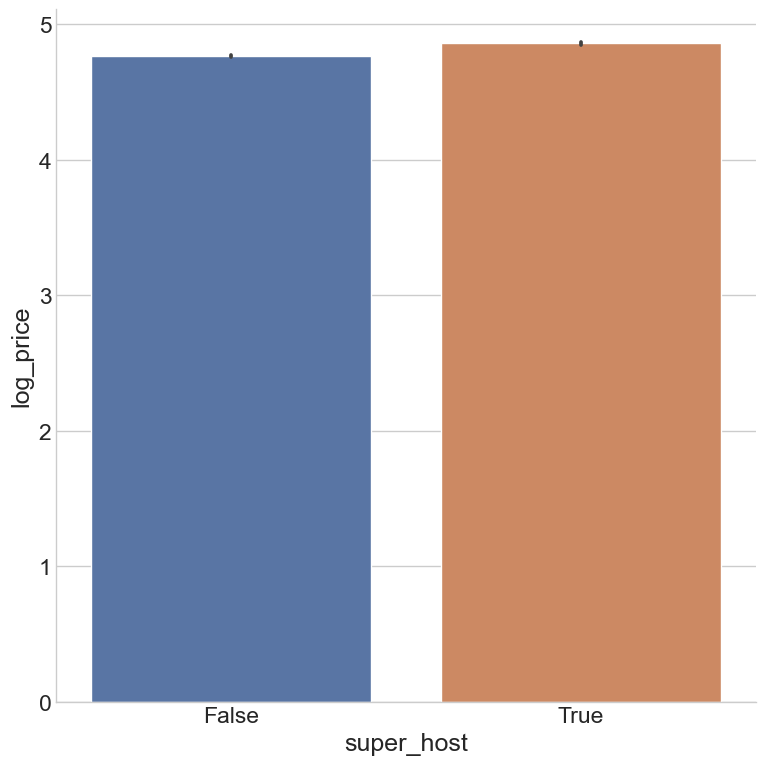

In [464]:
import seaborn as sns 
catplot('super_host')

## superhost icinde kullandigimiz sutunlari silinecek

### 30-median_home_value(Feature engineering)


In [465]:
# Creates a new column that gives us median house value of given zipcode

# def get_median_home_value(zipcode):
#     search = SearchEngine()
#     zipcode_data = search.by_zipcode(zipcode)
#     median_home_value = None
#     if zipcode_data is not None:
#         median_home_value = zipcode_data.median_home_value
#     search.close()
#     return median_home_value

# # Iterate over the df rows
# for index, row in df.iterrows():
#     median_home_value = get_median_home_value(row['zipcode'])
#     df.loc[index, 'median_home_value'] = median_home_value

In [520]:
df['median_home_value'] = pd.read_csv('median_zipcode.csv')['median_home_value'] #TO save time

In [521]:
# Checking if there is missing values
df['median_home_value'].isnull().sum()

0

In [467]:
# Lets handle missing values
df['median_home_value'] = df['median_home_value'].fillna(df['median_home_value'].mean())

## distance_to_center

In [468]:
# Defining center coordinates of each city

for index, row in df.iterrows():
    if df.loc[index, 'city'] == 'NYC':
        df.loc[index, 'lat_center'] = 40.72
        df.loc[index, 'long_center'] = -74.0060
    elif df.loc[index, 'city'] == 'LA':
        df.loc[index, 'lat_center'] = 34.0522
        df.loc[index, 'long_center'] = -118.2437
    elif df.loc[index, 'city'] == 'SF':
        df.loc[index, 'lat_center'] = 37.7749
        df.loc[index, 'long_center'] = -122.4194
    elif df.loc[index, 'city'] == 'DC':
        df.loc[index, 'lat_center'] = 38.9072
        df.loc[index, 'long_center'] = -77.0369
    elif df.loc[index, 'city'] == 'Chicago':
        df.loc[index, 'lat_center'] = 41.8781
        df.loc[index, 'long_center'] = -87.6298
    elif df.loc[index, 'city'] == 'Boston':
        df.loc[index, 'lat_center'] = 42.3601
        df.loc[index, 'long_center'] = -71.0589
        

In [469]:
# Creates the new column
df['distance_to_center']=np.sqrt((df['lat_center']-df['latitude'])**2+(df['long_center']-df['longitude'])**2)

In [470]:
def corr_columns(df,c1):
    print (np.corrcoef(df[c1], df['log_price']))
    sns.regplot(x=df[c1],y=df['log_price'],fit_reg=True,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.show()

[[ 1.         -0.13246795]
 [-0.13246795  1.        ]]


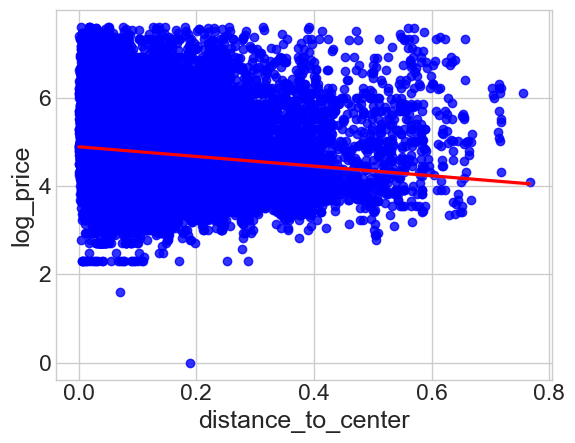

In [471]:
# lets see how our new column effect log_price
corr_columns(df,'distance_to_center')

[[1.         0.29971989]
 [0.29971989 1.        ]]


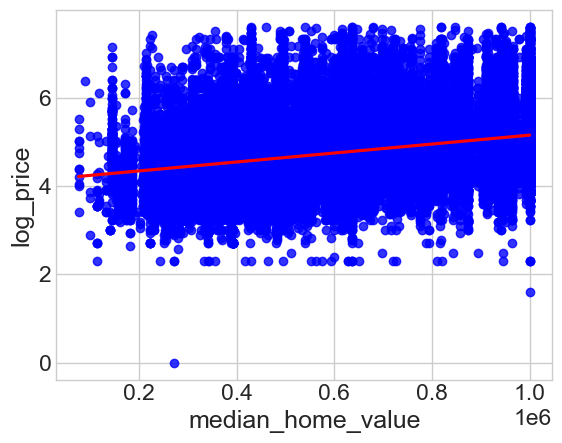

In [472]:
corr_columns(df,'median_home_value')

In [473]:
del df['description'] # String values
del df['first_review'] #  Used to create 'super_host'
del df['host_since'] # # Used to create 'super_host'
del df['last_review'] #  Used to create 'super_host'
del df['name'] # String values
del df['neighbourhood'] # String values
del df['city'] # get dummies is implemented
del df['latitude'] # Coordinates
del df['longitude'] # Coordinates
del df['host_response_rate'] # Used to create 'super_host'
del df['review_scores_rating'] # Used to create 'super_host'
del df['bedrooms'] # High correlation with accomadation
del df['beds'] # High correlation with accomadation


In [474]:
# df = pd.get_dummies(df, columns=["host_response_rate"])

In [475]:
# df = pd.get_dummies(df, columns=["review_scores_rating"])

In [476]:
# df = pd.get_dummies(df, columns=["bedrooms"])

# bunu allalim mi 

In [477]:
# df = pd.get_dummies(df, columns=["beds"])

In [478]:
for column in df.columns:
    if df[column].isnull().sum() != 0 :
        print(column)

time_since_last_review


In [479]:
df['time_since_last_review'].isnull().sum()

15827

In [480]:
df['time_since_last_review'] = df['time_since_last_review'].fillna(0)

In [482]:
df

log_price  cleaning_fee host_has_profile_pic host_identity_verified   
0      5.010635   1             1                    1                      \
1      5.129899   1             1                    0                       
2      4.976734   1             1                    1                       
3      6.620073   1             1                    1                       
4      4.744932   1             1                    1                       
...         ...  ..            ..                   ..                       
74106  4.605170   0             1                    1                       
74107  5.043425   1             1                    0                       
74108  5.220356   1             1                    1                       
74109  5.273000   1             1                    0                       
74110  4.852030   0             1                    1                       

      instant_bookable  number_of_reviews  thumbnail_url zipcode   
0      0                2                  1              11201   \
1      1                6                  1              10019    
2      1                10                 1              10027    
3      0                0                  1              94117    
4      1                4                  0              20009    
...   ..               ..                 ..                ...    
74106  0                0                  1              11206    
74107  0                16                 1              90254    
74108  1                43                 1              11206    
74109  1                0                  1              10011    
74110  0                205                1              90802    

       property_type_Apartment  property_type_Bed & Breakfast  ...     LA   
0      True                     False                          ...  False  \
1      True                     False                          ...  False   
2      True                     False                          ...  False   
3      False                    False                          ...  False   
4      True                     False                          ...  False   
...     ...                       ...                          ...    ...   
74106  True                     False                          ...  False   
74107  True                     False                          ...  True    
74108  True                     False                          ...  False   
74109  True                     False                          ...  False   
74110  False                    False                          ...  True    

         NYC     SF  time_since_last_review  host_since_day  super_host   
0      True   False  2556.0                  4131            False       \
1      True   False  2124.0                  2220            False        
2      True   False  2133.0                  2457            False        
3      False  True   0.0                     3012            False        
4      False  False  2368.0                  3061            False        
...      ...    ...     ...                   ...              ...        
74106  True   False  0.0                     3768            False        
74107  False  False  2285.0                  2632            False        
74108  True   False  2137.0                  4212            True         
74109  True   False  0.0                     2130            False        
74110  False  False  2270.0                  3886            True         

       median_home_value  lat_center  long_center  distance_to_center  
0      669000.0           40.7200    -74.0060      0.027532            
1      808600.0           40.7200    -74.0060      0.049135            
2      716100.0           40.7200    -74.0060      0.107878            
3      911500.0           37.7749    -122.4194     0.012557            
4      539400.0           38.9072    -77.0369      0.018570        

In [485]:
boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [487]:
df_final = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [488]:
df_final = remove_outliers(df_final,'number_of_reviews',0.01,0.9997)

max value is :  388
min value is :  0
23  rows removed


In [489]:
target_correlation = df_final.corr()['log_price'].abs().sort_values(ascending=False)


In [490]:
target_correlation[:50] # if the correlation is greater than 0.05 ,they are chosen as important_columns

log_price                       1.000000
room_type_Entire home/apt       0.606173
room_type_Private room          0.535544
accommodates_1                  0.321770
median_home_value               0.301147
child_friendly                  0.291688
bathrooms_1.0                   0.286417
accommodates_2                  0.278572
tv                              0.273767
accommodates_6                  0.251924
room_type_Shared room           0.222141
accommodates_8                  0.206206
bathrooms_2.0                   0.203208
accommodates_4                  0.175805
SF                              0.169283
white_goods                     0.166968
bathrooms_2.5                   0.149201
accommodates_5                  0.147697
accommodates_10                 0.143459
distance_to_center              0.138038
bathrooms_3.5                   0.133529
cancellation_policy_strict      0.129309
bathrooms_3.0                   0.127767
thumbnail_url                   0.123959
accommodates_7  

# Normalization check

In [491]:
# numeric columns
numerical_col = ['log_price','number_of_reviews','distance_to_center','median_home_value']

In [492]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Perform normality tests for each numeric column
for column in numerical_col:
    data = df_final[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

Column: log_price
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: number_of_reviews
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: distance_to_center
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: median_home_value
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False



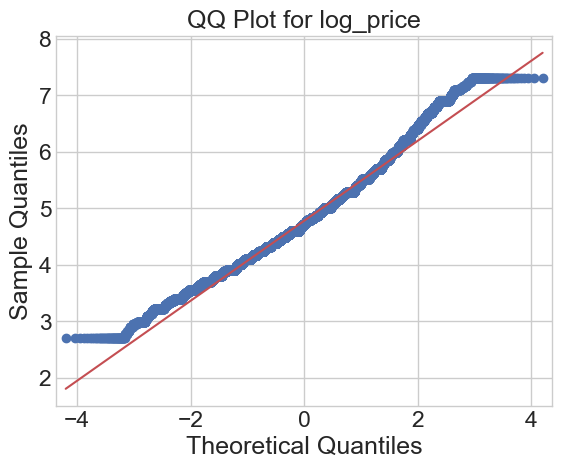

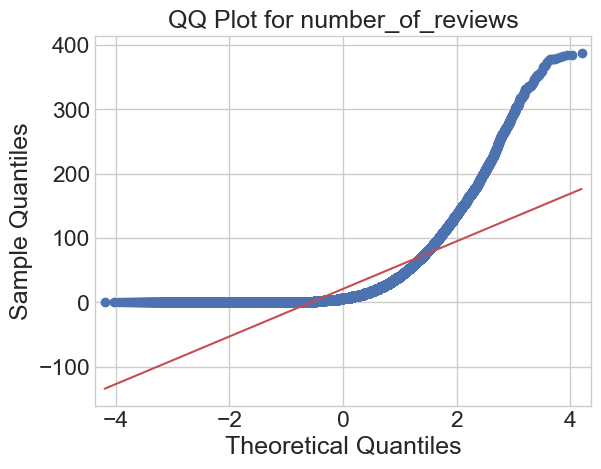

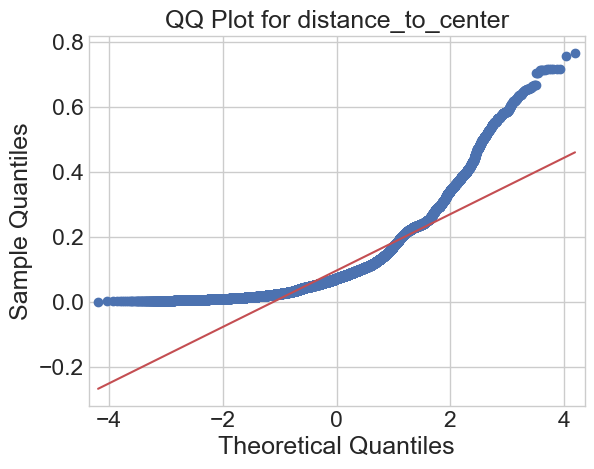

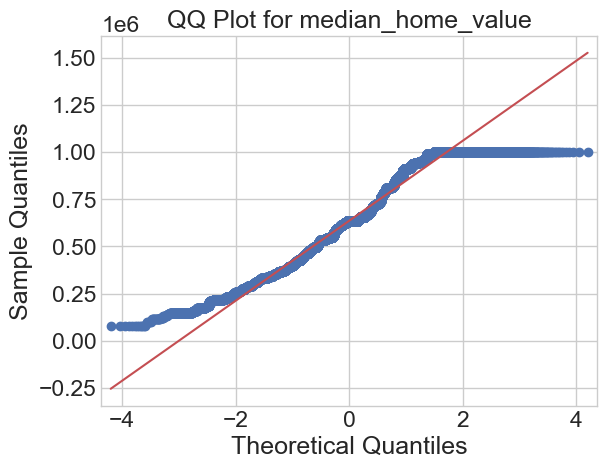

In [493]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numerical_col:
    # Create QQ plot
    sm.qqplot(df_final[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()



In [494]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = df_final[numerical_col]
    # Perform  transformations on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed datas for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()

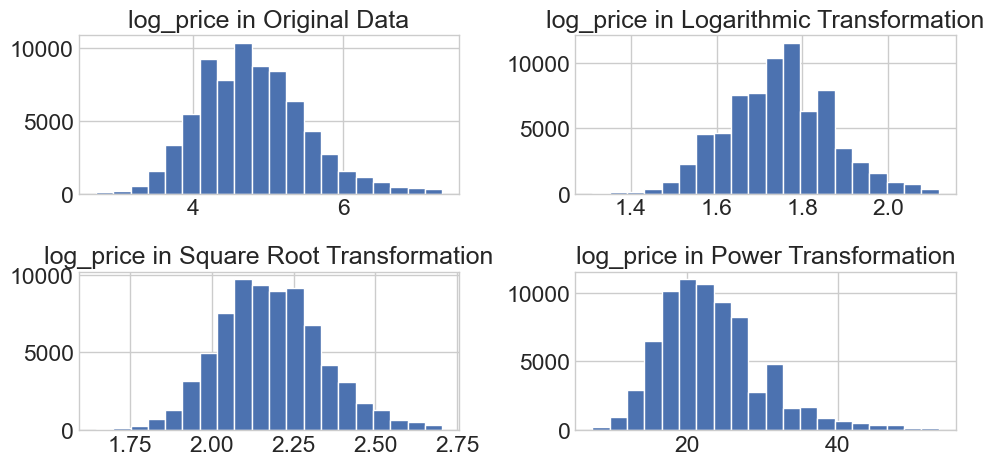

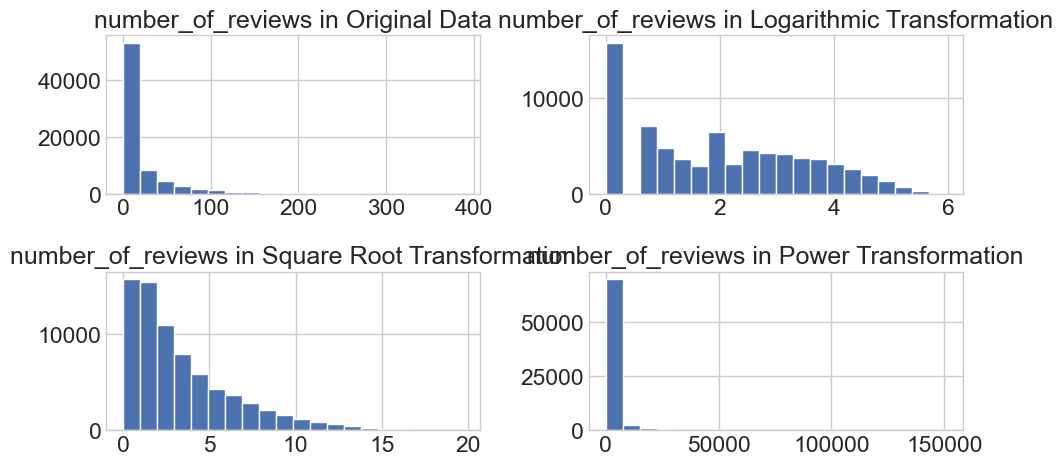

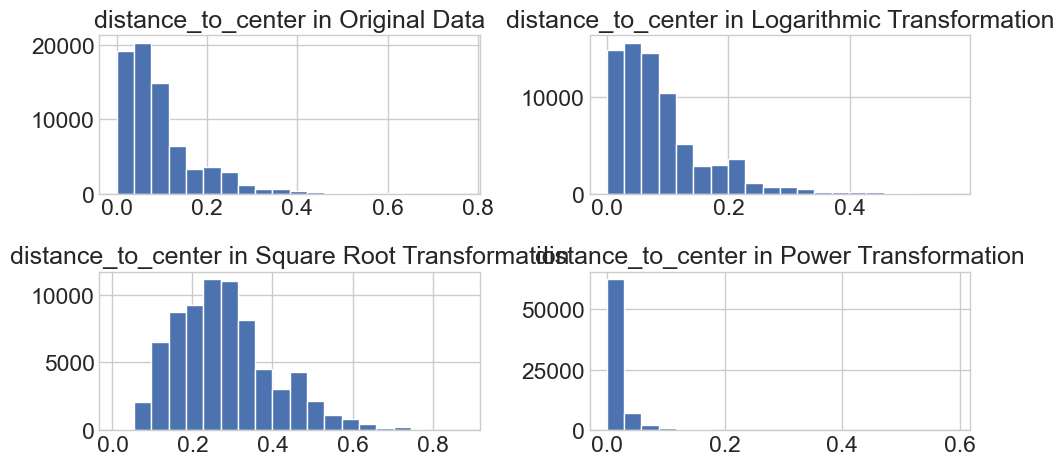

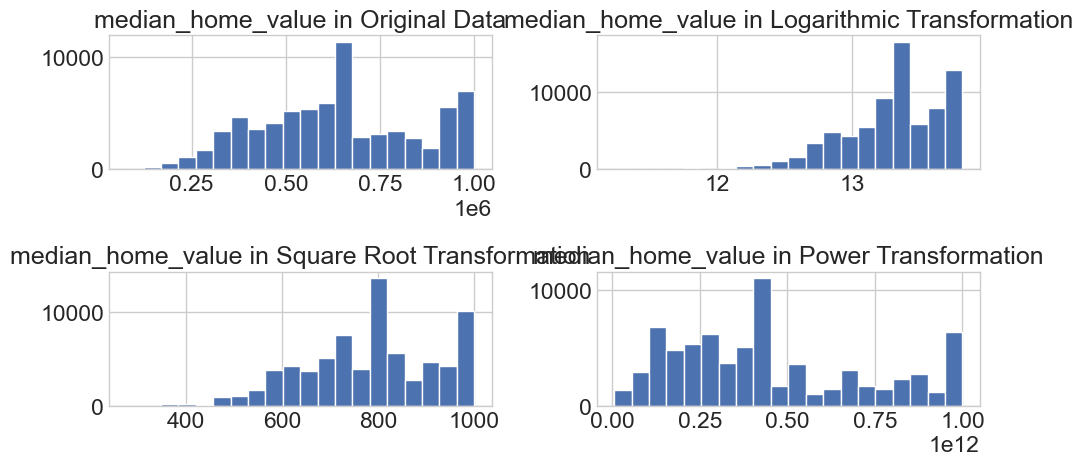

In [495]:
# applying the method to our data
for i in numerical_col :
    transformation_numerical(i)

# Transformation

In [496]:
import statsmodels.api as sm
def normality_b_a_transformed(col):
    column = col

    numeric_data = df_final[numerical_col]

    log_transformed_cleaned_df = np.log1p(numeric_data)
    sqrt_transformed_cleaned_df = np.sqrt(numeric_data)
    power_transformed_cleaned_df = np.power(numeric_data, 2)

    sm.qqplot(numeric_data[column],line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

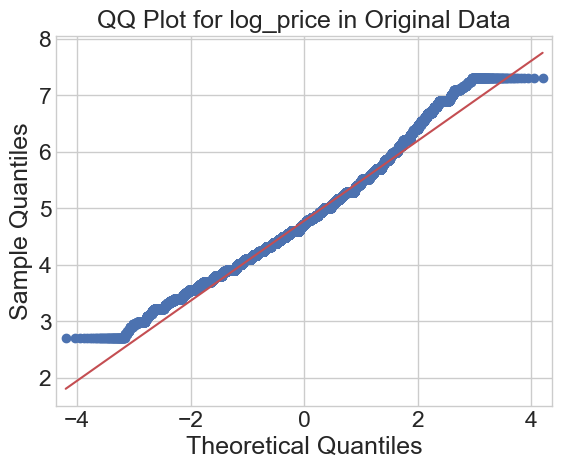

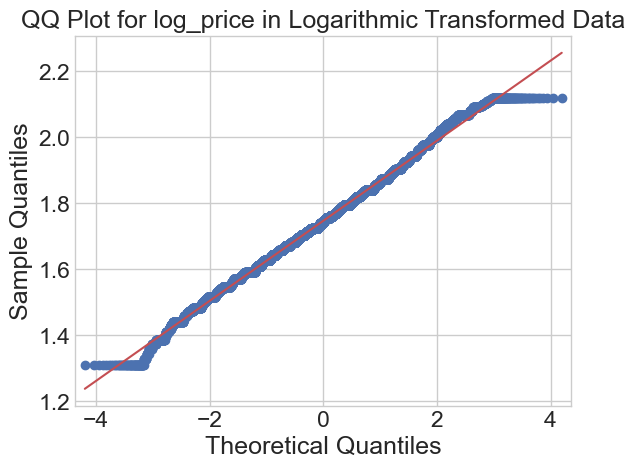

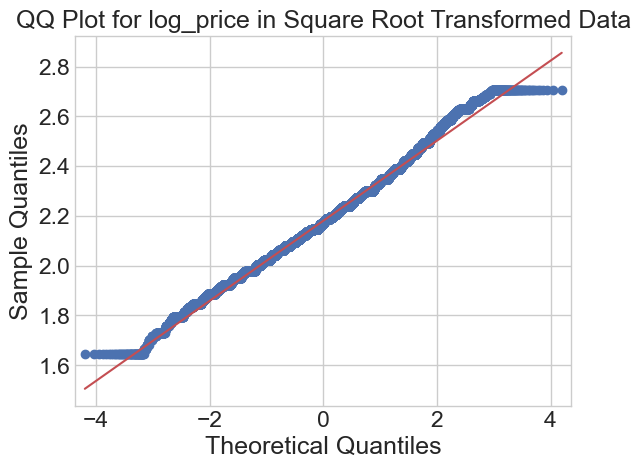

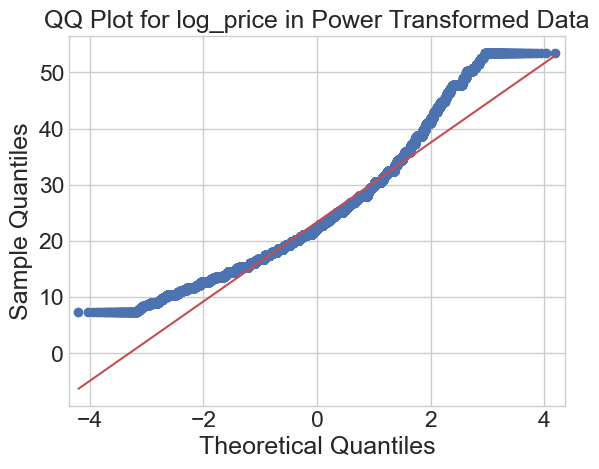

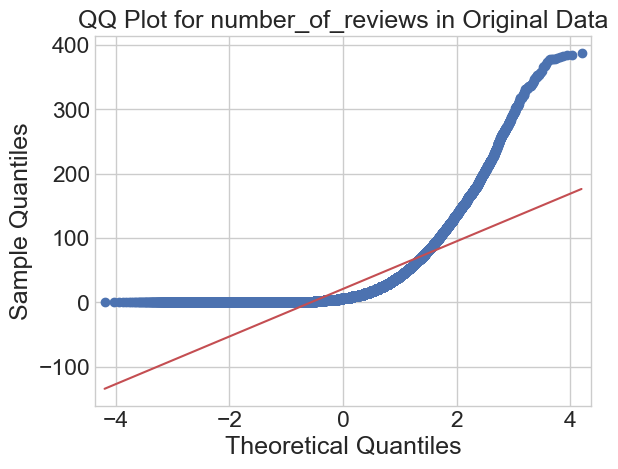

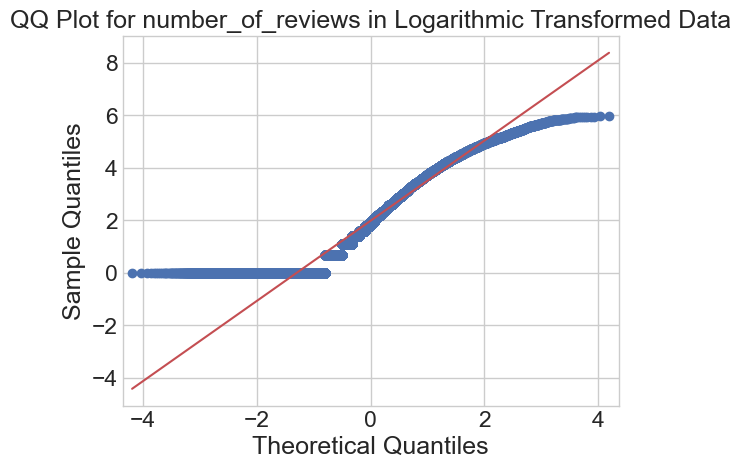

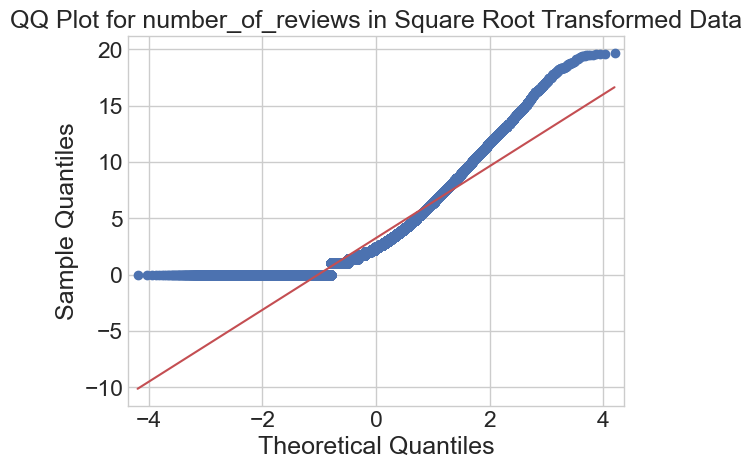

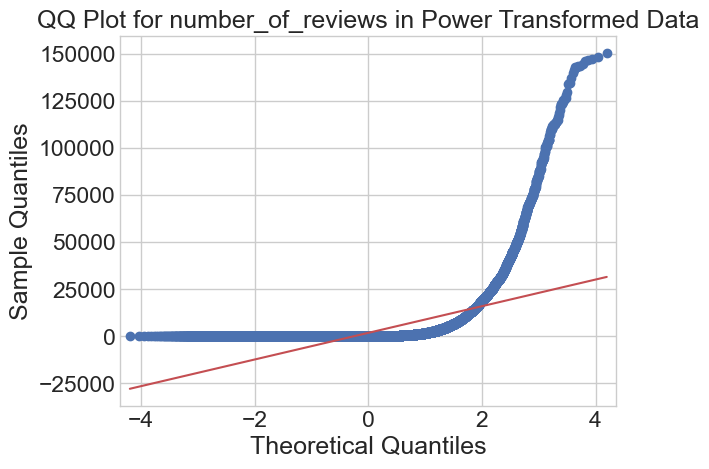

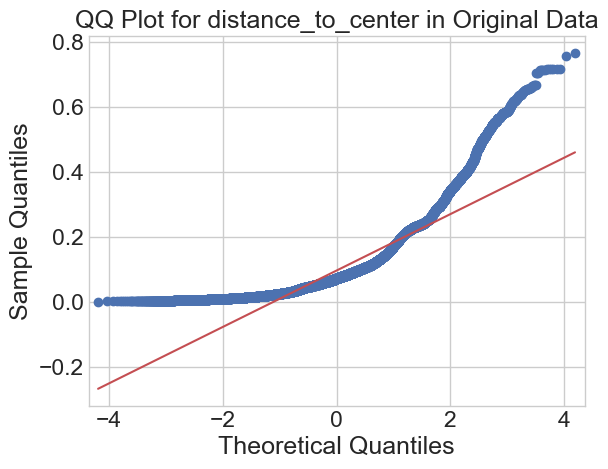

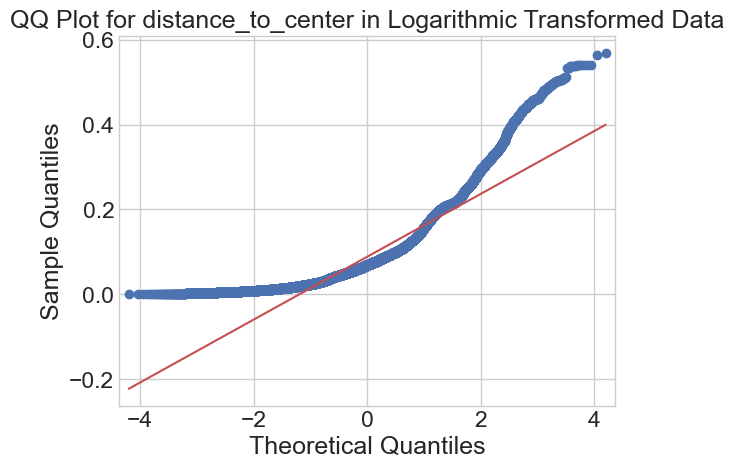

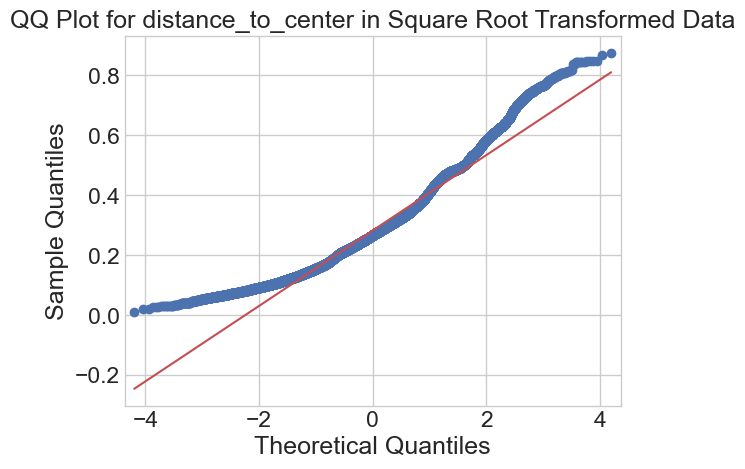

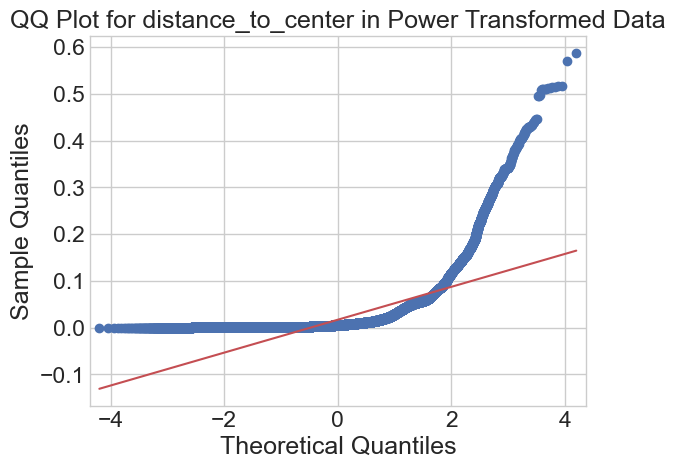

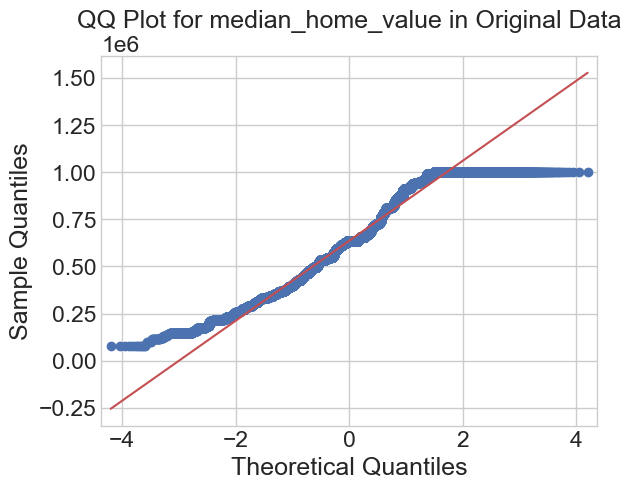

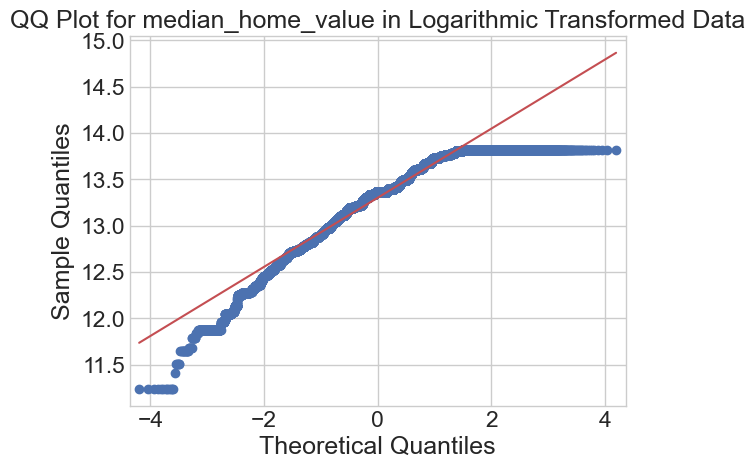

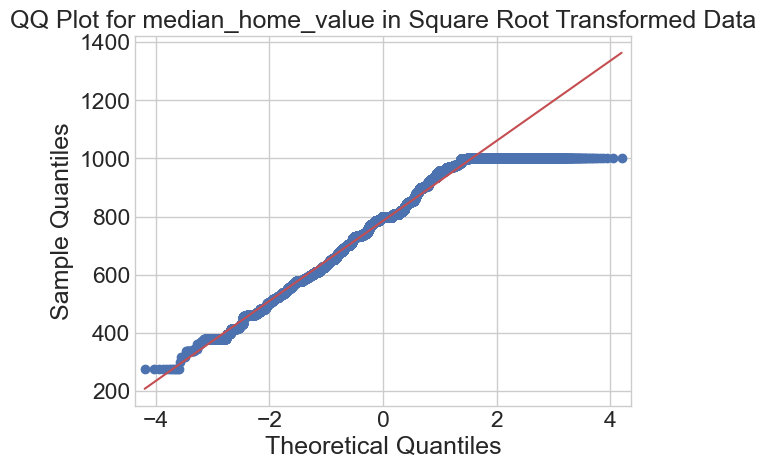

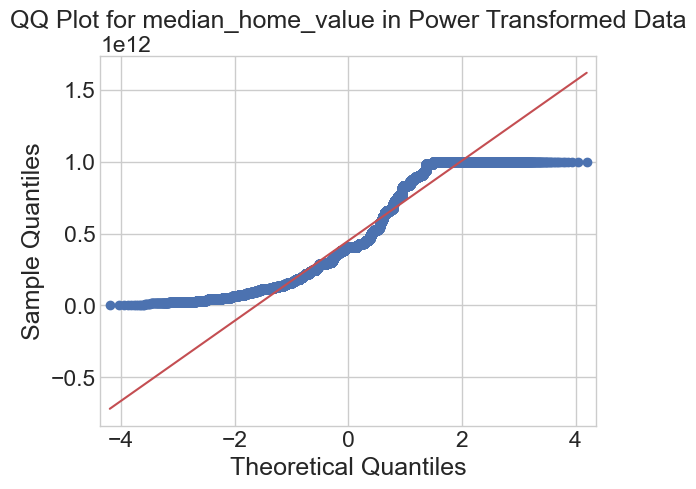

In [497]:
for i in numerical_col:
    normality_b_a_transformed(i)

In [498]:
df_final['median_home_value'] = np.sqrt(df_final['median_home_value'])
df_final['distance_to_center'] = np.sqrt(df_final['distance_to_center'])
df_final['number_of_reviews'] = np.log1p(df_final['number_of_reviews'])

In [499]:
final_df = df_final.copy()

In [500]:
target_correlation = final_df.corr()['log_price'].abs().sort_values(ascending=False)


In [501]:
high_correlation_columns = target_correlation[target_correlation > 0.05].index



In [502]:
high_correlation_columns

Index(['log_price', 'room_type_Entire home/apt', 'room_type_Private room',
       'accommodates_1', 'median_home_value', 'child_friendly',
       'bathrooms_1.0', 'accommodates_2', 'tv', 'accommodates_6',
       'room_type_Shared room', 'accommodates_8', 'bathrooms_2.0',
       'distance_to_center', 'accommodates_4', 'SF', 'white_goods',
       'bathrooms_2.5', 'accommodates_5', 'accommodates_10', 'bathrooms_3.5',
       'cancellation_policy_strict', 'bathrooms_3.0', 'thumbnail_url',
       'accommodates_7', 'private_entrance', 'gym', 'elevator', 'cleaning_fee',
       'event_suitable', 'check_in_24h', 'accommodates_16', 'accommodates_12',
       'bed_type_Real Bed', 'cancellation_policy_flexible', 'bathrooms_4.5',
       'time_since_last_review', 'DC', 'host_since_day', 'accommodates_9',
       'accessible', 'NYC', 'bathrooms_4.0', 'smoking_allowed',
       'property_type_Condominium', 'hot_tub_sauna_or_pool', 'bed_type_Futon',
       'property_type_Dorm', 'accommodates_14', 'bathroom

In [503]:
model_cols = high_correlation_columns
final_df[model_cols]

log_price  room_type_Entire home/apt  room_type_Private room   
0      5.010635   1                          0                       \
1      5.129899   1                          0                        
2      4.976734   1                          0                        
3      6.620073   1                          0                        
4      4.744932   1                          0                        
...         ...  ..                         ..                        
74106  4.605170   0                          1                        
74107  5.043425   1                          0                        
74108  5.220356   1                          0                        
74109  5.273000   1                          0                        
74110  4.852030   1                          0                        

       accommodates_1  median_home_value  child_friendly  bathrooms_1.0   
0      0               817.924202         1.0             1              \
1      0               899.221886         1.0             1               
2      0               846.226920         1.0             1               
3      0               954.725091         0.0             1               
4      0               734.438561         0.0             1               
...   ..                      ...         ...            ..               
74106  1               730.342385         0.0             1               
74107  0               1000.000500        1.0             0               
74108  0               730.342385         1.0             1               
74109  0               956.294934         0.0             1               
74110  0               523.736575         1.0             1               

       accommodates_2   tv  accommodates_6  ...  accommodates_14   
0      0               0.0  0               ...  0                \
1      0               0.0  0               ...  0                 
2      0               1.0  0               ...  0                 
3      0               1.0  0               ...  0                 
4      1               1.0  0               ...  0                 
...   ..               ... ..               ... ..                 
74106  0               0.0  0               ...  0                 
74107  0               1.0  0               ...  0                 
74108  0               1.0  0               ...  0                 
74109  1               1.0  0               ...  0                 
74110  0               1.0  0               ...  0                 

       bathrooms_5.5  LA  bathrooms_5.0  number_of_reviews  super_host   
0      0              0   0              1.098612           0           \
1      0              0   0              1.945910           0            
2      0              0   0              2.397895           0            
3      0              0   0              0.000000           0            
4      0              0   0              1.609438           0            
...   ..             ..  ..                   ...          ..            
74106  0              0   0              0.000000           0            
74107  0              1   0              2.833213           0            
74108  0              0   0              3.784190           1            
74109  0              0   0              0.000000           0            
74110  0              1   0              5.327876           1            

       air_conditioning  bed_type_Airbed  Chicago  coffee_machine  
0      1.0               0                0        0.0             
1      1.0               0                0        0.0             
2      1.0               0                0        0.0             
3      0.0               0                0        0.0             
4      1.0               0                0        0.0             
...    ...              ..               ..        ...             
74106  0.0               0                0        0.0             
741

### Data scaled

In [504]:
from sklearn.preprocessing import MinMaxScaler

# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df[model_cols])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=model_cols)
data_scaled.head()

log_price  room_type_Entire home/apt  room_type_Private room   
0  0.500000   1.0                        0.0                     \
1  0.525898   1.0                        0.0                      
2  0.492638   1.0                        0.0                      
3  0.849485   1.0                        0.0                      
4  0.442303   1.0                        0.0                      

   accommodates_1  median_home_value  child_friendly  bathrooms_1.0   
0  0.0             0.748624           1.0             1.0            \
1  0.0             0.860864           1.0             1.0             
2  0.0             0.787699           1.0             1.0             
3  0.0             0.937492           0.0             1.0             
4  0.0             0.633364           0.0             1.0             

   accommodates_2   tv  accommodates_6  ...  accommodates_14  bathrooms_5.5   
0  0.0             0.0  0.0             ...  0.0              0.0            \
1  0.0             0.0  0.0             ...  0.0              0.0             
2  0.0             1.0  0.0             ...  0.0              0.0             
3  0.0             1.0  0.0             ...  0.0              0.0             
4  1.0             1.0  0.0             ...  0.0              0.0             

    LA  bathrooms_5.0  number_of_reviews  super_host  air_conditioning   
0  0.0  0.0            0.184220           0.0         1.0               \
1  0.0  0.0            0.326299           0.0         1.0                
2  0.0  0.0            0.402090           0.0         1.0                
3  0.0  0.0            0.000000           0.0         0.0                
4  0.0  0.0            0.269878           0.0         1.0                

   bed_type_Airbed  Chicago  coffee_machine  
0  0.0              0.0      0.0             
1  0.0              0.0      0.0             
2  0.0              0.0      0.0             
3  0.0              0.0      0.0             
4  0.0              0.0      0.0             

[5 rows x 58 columns]

In [505]:

X = data_scaled.drop(['log_price'], axis =1)
y = final_df.log_price

In [506]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 73951, dtype: float64

In [507]:
X

room_type_Entire home/apt  room_type_Private room  accommodates_1   
0      1.0                        0.0                     0.0             \
1      1.0                        0.0                     0.0              
2      1.0                        0.0                     0.0              
3      1.0                        0.0                     0.0              
4      1.0                        0.0                     0.0              
...    ...                        ...                     ...              
73946  0.0                        1.0                     1.0              
73947  1.0                        0.0                     0.0              
73948  1.0                        0.0                     0.0              
73949  1.0                        0.0                     0.0              
73950  1.0                        0.0                     0.0              

       median_home_value  child_friendly  bathrooms_1.0  accommodates_2   tv   
0      0.748624           1.0             1.0            0.0             0.0  \
1      0.860864           1.0             1.0            0.0             0.0   
2      0.787699           1.0             1.0            0.0             1.0   
3      0.937492           0.0             1.0            0.0             1.0   
4      0.633364           0.0             1.0            1.0             1.0   
...         ...           ...             ...            ...             ...   
73946  0.627708           0.0             1.0            0.0             0.0   
73947  1.000000           1.0             0.0            0.0             1.0   
73948  0.627708           1.0             1.0            0.0             1.0   
73949  0.939660           0.0             1.0            1.0             1.0   
73950  0.342467           1.0             1.0            0.0             1.0   

       accommodates_6  room_type_Shared room  ...  accommodates_14   
0      0.0             0.0                    ...  0.0              \
1      0.0             0.0                    ...  0.0               
2      0.0             0.0                    ...  0.0               
3      0.0             0.0                    ...  0.0               
4      0.0             0.0                    ...  0.0               
...    ...             ...                    ...  ...               
73946  0.0             0.0                    ...  0.0               
73947  0.0             0.0                    ...  0.0               
73948  0.0             0.0                    ...  0.0               
73949  0.0             0.0                    ...  0.0               
73950  0.0             0.0                    ...  0.0               

       bathrooms_5.5   LA  bathrooms_5.0  number_of_reviews  super_host   
0      0.0            0.0  0.0            0.184220           0.0         \
1      0.0            0.0  0.0            0.326299           0.0          
2      0.0            0.0  0.0            0.402090           0.0          
3      0.0            0.0  0.0            0.000000           0.0          
4      0.0            0.0  0.0            0.269878           0.0          
...    ...            ...  ...                 ...           ...          
73946  0.0            0.0  0.0            0.000000           0.0          
73947  0.0            1.0  0.0            0.475086           0.0          
73948  0.0            0.0  0.0            0.634550           1.0          
73949  0.0            0.0  0.0            0.000000           0.0          
73950  0.0            1.0  0.0            0.893402           1.0          

       air_conditioning  bed_type_Airbed  Chicago  coffee_machine  
0      1.0               0.0              0.0      0.0             
1      1.0               0.0              0.0      0.0             
2      1.0               0.0              0.0      0.0             
3      0.0               0.0              0.0      0.0             
4      1.0               0.0              0.0      

In [508]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [523]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.28612808486790214

Mean Squarred Error of XGBoost Regressor     :  0.15075098860306185

Root Mean Squarred Error of XGBoost Regressor:  0.388266646266534

R2 Score of XGBoost Regressor                :  0.700838868846838


In [522]:

k_t = pd.DataFrame({"gercek_y": np.exp(y[0:20]),
                    "tahmin_y": np.exp(xgb.predict(X)[0:20])})

k_t

gercek_y    tahmin_y
0   150.0     156.632248
1   169.0     229.389938
2   145.0     150.634201
3   750.0     319.248627
4   115.0     110.174026
5   85.0      103.107353
6   83.0      122.185806
7   120.0     155.389175
8   120.0     102.691772
9   36.0      37.352726 
10  100.0     96.234520 
11  150.0     296.813995
12  70.0      96.733383 
13  200.0     273.798615
14  142.0     85.774857 
15  60.0      63.994080 
16  75.0      70.945801 
17  99.0      92.729607 
18  132.0     156.162796
19  99.0      152.086700

# Tuning


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-0.19884401094124401